In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

In [ ]:
#1 Tai data tu form ve
#2 EDA
#3 Phan chia ra thanh 5 file nho theo tung topic
#4 Voi moi file nho, prepare = shuffle data
#5 Preprocessing: Fill null data with mode value, convert object data to int data, rename column.
#6 Feature Selection
#7 Split data
#8 Model chon tu 10 thang -> 5 thang co performance tot nhat (co dung cross validation voi kfold = 10)
#9 Tuning model dung GridSearchCV - cross validation voi kfold = 0
#10 Fitting vao train - validation
#11 Danh gia ket qua dua vao f1 - recall - precision - confusion matrix
#12 Apply vao test data
#13 Ket luan
1 - .... 5 -... 11 - 5 ..............12

# Data Preparation


## Data Shuffling


### Work


In [ ]:
work = pd.read_excel("/content/V2.xlsx", "Work")
work.head()

STT Hiện tại bạn là? Giới tính sinh học của bạn là:  \
0    1  Sinh viên năm 1                            Nam   
1    2  Sinh viên năm 1                            Nam   
2    6   Đã tốt nghiệp.                            Nam   
3    9  Sinh viên năm 3                             Nữ   
4   10  Sinh viên năm 2                            Nam   

  Bạn có thuộc cộng đồng LGBT không?   1. Bạn là người có xu hướng:  \
0                                 Có  Vừa hướng nội vừa hướng ngoại   
1                              Không                    Hướng ngoại   
2                                 Có                      Hướng nội   
3                              Không  Vừa hướng nội vừa hướng ngoại   
4                              Không                    Hướng ngoại   

  2. Bạn có cảm thấy bản thân mình thừa thãi không?  \
0                                          Một chút   
1                                          Một chút   
2                                          Một chút   
3                                             Không   
4                                             Không   

  3. Bạn có cảm thấy lạc lõng, không hòa nhập được với mọi người không?  \
0                                           Một chút                      
1                                           Một chút                      
2                                              Không                      
3                                           Một chút                      
4                                              Không                      

  4. Bạn đang tự ti? 5. Bạn có hay vận động thể dục, thể thao không?  \
0                 Có                                              Có   
1           Một chút                                              Có   
2                 Có                                              Có   
3              Không                                           Không   
4              Không                                              Có   

  6. Bạn có được cha mẹ cho tất cả những điều mình muốn từ bé không?  ...  \
0                                                 Có                  ...   
1                                              Không                  ...   
2                                              Không                  ...   
3                                                 Có                  ...   
4                                                 Có                  ...   

  2. Bạn luôn thấy mệt mỏi, thiếu năng lượng làm mọi việc?  \
0                                                  2         
1                                                  1         
2                                                  2         
3                                                  1         
4                                                  1         

  4. Bạn hoạt động chậm chạp, đi lại hay nói chuyện đều chậm khiến mọi người chú ý. Hoặc bồn chồn không thể ở yên một chỗ?  \
0                                                  1                                                                         
1                                                  0                                                                         
2                                                  2                                                                         
3                                                  0                                                                         
4                                                  0                                                                         

   3. Bạn cảm thấy khó ngủ, ngủ không lâu hoặc ngược lại ngủ quá nhiều?  \
0                                                  2                      
1                                                  0                      
2                                                  2                      
3                                                  1                      
4                                           

In [ ]:
work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 38 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   STT                                                                                                                        478 non-null    int64  
 1   Hiện tại bạn là?                                                                                                           478 non-null    object 
 2   Giới tính sinh học của bạn là:                                                                                             478 non-null    object 
 3   Bạn có thuộc cộng đồng LGBT không?                                                                                         478 non

In [ ]:
from sklearn.utils import shuffle

work = shuffle(work)
work.head()

STT            Hiện tại bạn là? Giới tính sinh học của bạn là:  \
120   410              Học sinh cấp 3                            Nam   
410  1206             Sinh viên năm 3                             Nữ   
350  1057  Sinh viên từ năm 4 trở lên                            Nam   
453  1343             Sinh viên năm 2                             Nữ   
198   618         Sinh viên trung cấp                            Nam   

    Bạn có thuộc cộng đồng LGBT không?   1. Bạn là người có xu hướng:  \
120                              Không  Vừa hướng nội vừa hướng ngoại   
410                              Không                      Hướng nội   
350                      Chưa xác định                      Hướng nội   
453                              Không                      Hướng nội   
198                              Không                      Hướng nội   

    2. Bạn có cảm thấy bản thân mình thừa thãi không?  \
120                                             Không   
410                                          Một chút   
350                                                Có   
453                                          Một chút   
198                                          Một chút   

    3. Bạn có cảm thấy lạc lõng, không hòa nhập được với mọi người không?  \
120                                              Không                      
410                                                 Có                      
350                                                 Có                      
453                                              Không                      
198                                           Một chút                      

    4. Bạn đang tự ti? 5. Bạn có hay vận động thể dục, thể thao không?  \
120              Không                                              Có   
410           Một chút                                        Một chút   
350                 Có                                        Một chút   
453                 Có                                        Một chút   
198           Một chút                                           Không   

    6. Bạn có được cha mẹ cho tất cả những điều mình muốn từ bé không?  ...  \
120                                           Một chút                  ...   
410                                                 Có                  ...   
350                                              Không                  ...   
453                                              Không                  ...   
198                                           Một chút                  ...   

    2. Bạn luôn thấy mệt mỏi, thiếu năng lượng làm mọi việc?  \
120                                                  2         
410                                                  2         
350                                                  2         
453                                                  1         
198                                                  0         

    4. Bạn hoạt động chậm chạp, đi lại hay nói chuyện đều chậm khiến mọi người chú ý. Hoặc bồn chồn không thể ở yên một chỗ?  \
120                                                  0                                                                         
410                                                  1                                                                         
350                                                  1                                                                         
453                                                  0                                                                         
198                                                  3                                                                         

     3. Bạn cảm thấy khó ngủ, ngủ không lâu hoặc ngược lại ngủ quá nhiều?  \
120                                                  1                      
410                                                  2                      
350                    

In [ ]:
# storing into the excel file
work.to_excel("work.xlsx")

In [ ]:
478 * 0.9

430.2

### Study


In [ ]:
study = pd.read_excel("/content/V2.xlsx", "Study")
study.head()

STT Hiện tại bạn là? Giới tính sinh học của bạn là:  \
0    4  Sinh viên năm 1                            Nam   
1    7  Sinh viên năm 2                            Nam   
2    8  Sinh viên năm 1                             Nữ   
3   12  Sinh viên năm 1                             Nữ   
4   17  Sinh viên năm 1                            Nam   

  Bạn có thuộc cộng đồng LGBT không?   1. Bạn là người có xu hướng:  \
0                                 Có  Vừa hướng nội vừa hướng ngoại   
1                              Không             Chưa xác định được   
2                              Không  Vừa hướng nội vừa hướng ngoại   
3                              Không                    Hướng ngoại   
4                              Không  Vừa hướng nội vừa hướng ngoại   

  2. Bạn có cảm thấy bản thân mình thừa thãi không?  \
0                                          Một chút   
1                                             Không   
2                                             Không   
3                                          Một chút   
4                                          Một chút   

  3. Bạn có cảm thấy lạc lõng, không hòa nhập được với mọi người không?  \
0                                           Một chút                      
1                                              Không                      
2                                              Không                      
3                                              Không                      
4                                           Một chút                      

  4. Bạn đang tự ti? 5. Bạn có hay vận động thể dục, thể thao không?  \
0                 Có                                           Không   
1           Một chút                                              Có   
2                 Có                                        Một chút   
3           Một chút                                        Một chút   
4           Một chút                                           Không   

  6. Bạn có được cha mẹ cho tất cả những điều mình muốn từ bé không?  ...  \
0                                              Không                  ...   
1                                                 Có                  ...   
2                                           Một chút                  ...   
3                                                 Có                  ...   
4                                           Một chút                  ...   

  2. Bạn luôn thấy mệt mỏi, thiếu năng lượng làm mọi việc?  \
0                                                  1         
1                                                  2         
2                                                  3         
3                                                  1         
4                                                  0         

  4. Bạn hoạt động chậm chạp, đi lại hay nói chuyện đều chậm khiến mọi người chú ý. Hoặc bồn chồn không thể ở yên một chỗ?  \
0                                                  0                                                                         
1                                                  1                                                                         
2                                                  3                                                                         
3                                                  3                                                                         
4                                                  0                                                                         

   3. Bạn cảm thấy khó ngủ, ngủ không lâu hoặc ngược lại ngủ quá nhiều?  \
0                                                  3                      
1                                                  2                      
2                                                  1                      
3                                                  1                      
4                                           

In [ ]:
study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 38 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                    --------------  -----  
 0   STT                                                                                                                       393 non-null    int64  
 1   Hiện tại bạn là?                                                                                                          393 non-null    object 
 2   Giới tính sinh học của bạn là:                                                                                            393 non-null    object 
 3   Bạn có thuộc cộng đồng LGBT không?                                                                                        393 non-null 

In [ ]:
from sklearn.utils import shuffle

study = shuffle(study)
study.head()

STT Hiện tại bạn là? Giới tính sinh học của bạn là:  \
381  1373  Sinh viên năm 4                            Nam   
7      24  Sinh viên năm 2                            Nam   
115   380  Sinh viên năm 2                            Nam   
97    315  Sinh viên năm 1                            Nam   
237   799  Sinh viên năm 2                             Nữ   

    Bạn có thuộc cộng đồng LGBT không?   1. Bạn là người có xu hướng:  \
381                                 Có                      Hướng nội   
7                                Không  Vừa hướng nội vừa hướng ngoại   
115                                 Có  Vừa hướng nội vừa hướng ngoại   
97                               Không  Vừa hướng nội vừa hướng ngoại   
237                              Không  Vừa hướng nội vừa hướng ngoại   

    2. Bạn có cảm thấy bản thân mình thừa thãi không?  \
381                                                Có   
7                                               Không   
115                                             Không   
97                                           Một chút   
237                                          Một chút   

    3. Bạn có cảm thấy lạc lõng, không hòa nhập được với mọi người không?  \
381                                                 Có                      
7                                             Một chút                      
115                                                 Có                      
97                                               Không                      
237                                           Một chút                      

    4. Bạn đang tự ti? 5. Bạn có hay vận động thể dục, thể thao không?  \
381                 Có                                        Một chút   
7                Không                                              Có   
115           Một chút                                           Không   
97            Một chút                                              Có   
237              Không                                           Không   

    6. Bạn có được cha mẹ cho tất cả những điều mình muốn từ bé không?  ...  \
381                                              Không                  ...   
7                                             Một chút                  ...   
115                                              Không                  ...   
97                                                  Có                  ...   
237                                           Một chút                  ...   

    2. Bạn luôn thấy mệt mỏi, thiếu năng lượng làm mọi việc?  \
381                                                  2         
7                                                    1         
115                                                  2         
97                                                   2         
237                                                  2         

    4. Bạn hoạt động chậm chạp, đi lại hay nói chuyện đều chậm khiến mọi người chú ý. Hoặc bồn chồn không thể ở yên một chỗ?  \
381                                                  2                                                                         
7                                                    1                                                                         
115                                                  1                                                                         
97                                                   0                                                                         
237                                                  1                                                                         

     3. Bạn cảm thấy khó ngủ, ngủ không lâu hoặc ngược lại ngủ quá nhiều?  \
381                                                  2                      
7                                                    2                      
115                                                  3                      
97          

In [ ]:
# storing into the excel file
study.to_excel("study.xlsx")

In [ ]:
393 * 0.9

353.7

### Self


In [ ]:
self = pd.read_excel("/content/V2.xlsx", "Self")
self.head()

STT Hiện tại bạn là? Giới tính sinh học của bạn là:  \
0    3  Sinh viên năm 1                            Nam   
1    5   Học sinh cấp 3                             Nữ   
2   11   Học sinh cấp 3                            Nam   
3   14  Sinh viên năm 3                             Nữ   
4   19  Sinh viên năm 1                             Nữ   

  Bạn có thuộc cộng đồng LGBT không?   1. Bạn là người có xu hướng:  \
0                              Không                      Hướng nội   
1                              Không  Vừa hướng nội vừa hướng ngoại   
2                              Không  Vừa hướng nội vừa hướng ngoại   
3                              Không  Vừa hướng nội vừa hướng ngoại   
4                              Không  Vừa hướng nội vừa hướng ngoại   

  2. Bạn có cảm thấy bản thân mình thừa thãi không?  \
0                                                Có   
1                                          Một chút   
2                                                Có   
3                                                Có   
4                                          Một chút   

  3. Bạn có cảm thấy lạc lõng, không hòa nhập được với mọi người không?  \
0                                           Một chút                      
1                                                 Có                      
2                                                 Có                      
3                                           Một chút                      
4                                           Một chút                      

  4. Bạn đang tự ti? 5. Bạn có hay vận động thể dục, thể thao không?  \
0           Một chút                                        Một chút   
1           Một chút                                              Có   
2                 Có                                        Một chút   
3           Một chút                                              Có   
4           Một chút                                           Không   

  6. Bạn có được cha mẹ cho tất cả những điều mình muốn từ bé không?  ...  \
0                                           Một chút                  ...   
1                                           Một chút                  ...   
2                                              Không                  ...   
3                                           Một chút                  ...   
4                                                 Có                  ...   

  2. Bạn luôn thấy mệt mỏi, thiếu năng lượng làm mọi việc?  \
0                                                  2         
1                                                  3         
2                                                  3         
3                                                  2         
4                                                  2         

  4. Bạn hoạt động chậm chạp, đi lại hay nói chuyện đều chậm khiến mọi người chú ý. Hoặc bồn chồn không thể ở yên một chỗ?  \
0                                                  2                                                                         
1                                                  1                                                                         
2                                                  2                                                                         
3                                                  1                                                                         
4                                                  1                                                                         

   3. Bạn cảm thấy khó ngủ, ngủ không lâu hoặc ngược lại ngủ quá nhiều?  \
0                                                  3                      
1                                                  2                      
2                                                  3                      
3                                                  2                      
4                                           

In [ ]:
self.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 38 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                    --------------  ----- 
 0   STT                                                                                                                       321 non-null    int64 
 1   Hiện tại bạn là?                                                                                                          321 non-null    object
 2   Giới tính sinh học của bạn là:                                                                                            321 non-null    object
 3   Bạn có thuộc cộng đồng LGBT không?                                                                                        321 non-null    ob

In [ ]:
from sklearn.utils import shuffle

self = shuffle(self)
self.head()

STT Hiện tại bạn là? Giới tính sinh học của bạn là:  \
295  1319   Học sinh cấp 3                            Nam   
158   722  Sinh viên năm 1                            Nam   
198   882  Sinh viên năm 1                            Nam   
231  1023  Sinh viên năm 2                             Nữ   
272  1221   Học sinh cấp 3                             Nữ   

    Bạn có thuộc cộng đồng LGBT không?   1. Bạn là người có xu hướng:  \
295                              Không             Chưa xác định được   
158                              Không  Vừa hướng nội vừa hướng ngoại   
198                              Không             Chưa xác định được   
231                              Không  Vừa hướng nội vừa hướng ngoại   
272                              Không  Vừa hướng nội vừa hướng ngoại   

    2. Bạn có cảm thấy bản thân mình thừa thãi không?  \
295                                          Một chút   
158                                          Một chút   
198                                             Không   
231                                             Không   
272                                             Không   

    3. Bạn có cảm thấy lạc lõng, không hòa nhập được với mọi người không?  \
295                                           Một chút                      
158                                                 Có                      
198                                              Không                      
231                                           Một chút                      
272                                              Không                      

    4. Bạn đang tự ti? 5. Bạn có hay vận động thể dục, thể thao không?  \
295           Một chút                                              Có   
158                 Có                                        Một chút   
198              Không                                              Có   
231           Một chút                                              Có   
272              Không                                           Không   

    6. Bạn có được cha mẹ cho tất cả những điều mình muốn từ bé không?  ...  \
295                                           Một chút                  ...   
158                                              Không                  ...   
198                                              Không                  ...   
231                                              Không                  ...   
272                                              Không                  ...   

    2. Bạn luôn thấy mệt mỏi, thiếu năng lượng làm mọi việc?  \
295                                                  1         
158                                                  1         
198                                                  0         
231                                                  2         
272                                                  0         

    4. Bạn hoạt động chậm chạp, đi lại hay nói chuyện đều chậm khiến mọi người chú ý. Hoặc bồn chồn không thể ở yên một chỗ?  \
295                                                  1                                                                         
158                                                  1                                                                         
198                                                  0                                                                         
231                                                  0                                                                         
272                                                  0                                                                         

     3. Bạn cảm thấy khó ngủ, ngủ không lâu hoặc ngược lại ngủ quá nhiều?  \
295                                                  0                      
158                                                  1                      
198                                                  0                      
231         

In [ ]:
# storing into the excel file
self.to_excel("self.xlsx")

In [ ]:
321 * 0.9

288.90000000000003

### Family


In [ ]:
family = pd.read_excel("/content/V2.xlsx", "Family")
family.head()

STT Hiện tại bạn là? Giới tính sinh học của bạn là:  \
0   13   Học sinh cấp 3                             Nữ   
1   21  Sinh viên năm 3                             Nữ   
2   36  Sinh viên năm 1                             Nữ   
3   56  Sinh viên năm 3                             Nữ   
4   57  Sinh viên năm 2                            Nam   

  Bạn có thuộc cộng đồng LGBT không?   1. Bạn là người có xu hướng:  \
0                              Không  Vừa hướng nội vừa hướng ngoại   
1                              Không  Vừa hướng nội vừa hướng ngoại   
2                              Không  Vừa hướng nội vừa hướng ngoại   
3                              Không                    Hướng ngoại   
4                              Không                    Hướng ngoại   

  2. Bạn có cảm thấy bản thân mình thừa thãi không?  \
0                                          Một chút   
1                                             Không   
2                                          Một chút   
3                                             Không   
4                                          Một chút   

  3. Bạn có cảm thấy lạc lõng, không hòa nhập được với mọi người không?  \
0                                           Một chút                      
1                                              Không                      
2                                           Một chút                      
3                                              Không                      
4                                           Một chút                      

  4. Bạn đang tự ti? 5. Bạn có hay vận động thể dục, thể thao không?  \
0                 Có                                        Một chút   
1           Một chút                                           Không   
2                 Có                                        Một chút   
3           Một chút                                              Có   
4                 Có                                              Có   

  6. Bạn có được cha mẹ cho tất cả những điều mình muốn từ bé không?  ...  \
0                                           Một chút                  ...   
1                                           Một chút                  ...   
2                                           Một chút                  ...   
3                                           Một chút                  ...   
4                                           Một chút                  ...   

  2. Bạn luôn thấy mệt mỏi, thiếu năng lượng làm mọi việc?  \
0                                                  1         
1                                                  1         
2                                                  3         
3                                                  3         
4                                                  2         

  4. Bạn hoạt động chậm chạp, đi lại hay nói chuyện đều chậm khiến mọi người chú ý. Hoặc bồn chồn không thể ở yên một chỗ?  \
0                                                  1                                                                         
1                                                  0                                                                         
2                                                  3                                                                         
3                                                  0                                                                         
4                                                  2                                                                         

  3. Bạn cảm thấy khó ngủ, ngủ không lâu hoặc ngược lại ngủ quá nhiều?  \
0                                                  1                     
1                                                  1                     
2                                                  3                     
3                                                  3                     
4                                                

In [ ]:
family.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 38 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                --------------  ----- 
 0   STT                                                                                                                                                   131 non-null    int64 
 1   Hiện tại bạn là?                                                                                                                                      131 non-null    object
 2   Giới tính sinh học của bạn là:                                                                                                                        131 non-null    object
 3   

In [ ]:
from sklearn.utils import shuffle

family = shuffle(family)
family.head()

STT Hiện tại bạn là? Giới tính sinh học của bạn là:  \
87   1010  Sinh viên năm 2                            Nam   
75    948  Sinh viên năm 3                             Nữ   
18    228   Học sinh cấp 3                             Nữ   
104  1118  Sinh viên năm 1                            Nam   
1      21  Sinh viên năm 3                             Nữ   

    Bạn có thuộc cộng đồng LGBT không?   1. Bạn là người có xu hướng:  \
87                               Không  Vừa hướng nội vừa hướng ngoại   
75                               Không  Vừa hướng nội vừa hướng ngoại   
18                               Không                      Hướng nội   
104                              Không             Chưa xác định được   
1                                Không  Vừa hướng nội vừa hướng ngoại   

    2. Bạn có cảm thấy bản thân mình thừa thãi không?  \
87                                                 Có   
75                                           Một chút   
18                                                 Có   
104                                          Một chút   
1                                               Không   

    3. Bạn có cảm thấy lạc lõng, không hòa nhập được với mọi người không?  \
87                                                  Có                      
75                                            Một chút                      
18                                                  Có                      
104                                              Không                      
1                                                Không                      

    4. Bạn đang tự ti? 5. Bạn có hay vận động thể dục, thể thao không?  \
87                  Có                                              Có   
75                  Có                                              Có   
18                  Có                                           Không   
104                 Có                                           Không   
1             Một chút                                           Không   

    6. Bạn có được cha mẹ cho tất cả những điều mình muốn từ bé không?  ...  \
87                                            Một chút                  ...   
75                                            Một chút                  ...   
18                                            Một chút                  ...   
104                                              Không                  ...   
1                                             Một chút                  ...   

    2. Bạn luôn thấy mệt mỏi, thiếu năng lượng làm mọi việc?  \
87                                                   2         
75                                                   1         
18                                                   3         
104                                                  1         
1                                                    1         

    4. Bạn hoạt động chậm chạp, đi lại hay nói chuyện đều chậm khiến mọi người chú ý. Hoặc bồn chồn không thể ở yên một chỗ?  \
87                                                   2                                                                         
75                                                   1                                                                         
18                                                   3                                                                         
104                                                  0                                                                         
1                                                    0                                                                         

    3. Bạn cảm thấy khó ngủ, ngủ không lâu hoặc ngược lại ngủ quá nhiều?  \
87                                                   2                     
75                                                   3                     
18                                                   3                     
104             

In [ ]:
# storing into the excel file
family.to_excel("family.xlsx")

In [ ]:
131 * 0.9

117.9

### Love


In [ ]:
love = pd.read_excel("/content/V2.xlsx", "Love")
love.head()

STT Hiện tại bạn là? Giới tính sinh học của bạn là:  \
0   16  Sinh viên năm 1                             Nữ   
1   39  Sinh viên năm 2                            Nam   
2   49  Sinh viên năm 2                            Nam   
3   50  Sinh viên năm 2                            Nam   
4   51  Sinh viên năm 1                             Nữ   

  Bạn có thuộc cộng đồng LGBT không?   1. Bạn là người có xu hướng:  \
0                              Không  Vừa hướng nội vừa hướng ngoại   
1                              Không                      Hướng nội   
2                              Không  Vừa hướng nội vừa hướng ngoại   
3                              Không  Vừa hướng nội vừa hướng ngoại   
4                              Không             Chưa xác định được   

  2. Bạn có cảm thấy bản thân mình thừa thãi không?  \
0                                             Không   
1                                             Không   
2                                          Một chút   
3                                          Một chút   
4                                             Không   

  3. Bạn có cảm thấy lạc lõng, không hòa nhập được với mọi người không?  \
0                                           Một chút                      
1                                           Một chút                      
2                                           Một chút                      
3                                                 Có                      
4                                           Một chút                      

  4. Bạn đang tự ti? 5. Bạn có hay vận động thể dục, thể thao không?  \
0           Một chút                                           Không   
1                 Có                                              Có   
2              Không                                        Một chút   
3                 Có                                           Không   
4           Một chút                                        Một chút   

  6. Bạn có được cha mẹ cho tất cả những điều mình muốn từ bé không?  ...  \
0                                           Một chút                  ...   
1                                           Một chút                  ...   
2                                                 Có                  ...   
3                                           Một chút                  ...   
4                                                 Có                  ...   

  2. Bạn luôn thấy mệt mỏi, thiếu năng lượng làm mọi việc?  \
0                                                  2         
1                                                  3         
2                                                  1         
3                                                  2         
4                                                  2         

  4. Bạn hoạt động chậm chạp, đi lại hay nói chuyện đều chậm khiến mọi người chú ý. Hoặc bồn chồn không thể ở yên một chỗ?  \
0                                                  1                                                                         
1                                                  1                                                                         
2                                                  1                                                                         
3                                                  2                                                                         
4                                                  1                                                                         

   3. Bạn cảm thấy khó ngủ, ngủ không lâu hoặc ngược lại ngủ quá nhiều?  \
0                                                  3                      
1                                                  3                      
2                                                  1                      
3                                                  3                      
4                                           

In [ ]:
love.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 38 columns):
 #   Column                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                    --------------  ----- 
 0   STT                                                                                                                       97 non-null     int64 
 1   Hiện tại bạn là?                                                                                                          97 non-null     object
 2   Giới tính sinh học của bạn là:                                                                                            97 non-null     object
 3   Bạn có thuộc cộng đồng LGBT không?                                                                                        97 non-null     obje

In [ ]:
from sklearn.utils import shuffle

love = shuffle(love)
love.head()

STT     Hiện tại bạn là? Giới tính sinh học của bạn là:  \
31   455  Sinh viên trung cấp                            Nam   
91  1292      Sinh viên năm 2                             Nữ   
29   425      Sinh viên năm 2                             Nữ   
34   494       Đã tốt nghiệp.                            Nam   
72  1053      Sinh viên năm 2                             Nữ   

   Bạn có thuộc cộng đồng LGBT không?   1. Bạn là người có xu hướng:  \
31                              Không             Chưa xác định được   
91                              Không                      Hướng nội   
29                              Không  Vừa hướng nội vừa hướng ngoại   
34                              Không                      Hướng nội   
72                      Chưa xác định  Vừa hướng nội vừa hướng ngoại   

   2. Bạn có cảm thấy bản thân mình thừa thãi không?  \
31                                          Một chút   
91                                             Không   
29                                                Có   
34                                                Có   
72                                             Không   

   3. Bạn có cảm thấy lạc lõng, không hòa nhập được với mọi người không?  \
31                                              Không                      
91                                                 Có                      
29                                           Một chút                      
34                                                 Có                      
72                                           Một chút                      

   4. Bạn đang tự ti? 5. Bạn có hay vận động thể dục, thể thao không?  \
31           Một chút                                              Có   
91              Không                                           Không   
29                 Có                                           Không   
34                 Có                                        Một chút   
72                 Có                                        Một chút   

   6. Bạn có được cha mẹ cho tất cả những điều mình muốn từ bé không?  ...  \
31                                                 Có                  ...   
91                                                 Có                  ...   
29                                           Một chút                  ...   
34                                              Không                  ...   
72                                           Một chút                  ...   

   2. Bạn luôn thấy mệt mỏi, thiếu năng lượng làm mọi việc?  \
31                                                  2         
91                                                  3         
29                                                  3         
34                                                  3         
72                                                  2         

   4. Bạn hoạt động chậm chạp, đi lại hay nói chuyện đều chậm khiến mọi người chú ý. Hoặc bồn chồn không thể ở yên một chỗ?  \
31                                                  1                                                                         
91                                                  2                                                                         
29                                                  3                                                                         
34                                                  3                                                                         
72                                                  1                                                                         

    3. Bạn cảm thấy khó ngủ, ngủ không lâu hoặc ngược lại ngủ quá nhiều?  \
31                                                  3                      
91                                                  3                      
29                                                  3                      
34                                     

In [ ]:
# storing into the excel file
love.to_excel("love.xlsx")

In [ ]:
97 * 0.9

87.3

# Data Preprocessing


## Train


In [ ]:
# Family
fa = pd.read_excel("/content/Fa & Lo.xlsx", "fa")
fa = fa.drop(columns=["Tổng"])
fa.columns = [
    "Job",
    "Sex",
    "LGBT",
    "a1",
    "a2",
    "a3",
    "a4",
    "a5",
    "a6",
    "a7",
    "b1",
    "b2",
    "b3",
    "b4",
    "b5",
    "b6",
    "b7",
    "b8",
    "b9",
    "b10",
    "b11",
    "b12",
    "b13",
    "b14",
    "b15",
    "c1",
    "c2",
    "c3",
    "c4",
    "c5",
    "c6",
    "c7",
    "c8",
    "c9",
    "Level",
]
fa = fa.apply(lambda x: x.fillna(x.value_counts().index[0]))

# Love
lo = pd.read_excel("/content/Fa & Lo.xlsx", "lo")
lo = lo.drop(columns=["Tổng"])
lo.columns = [
    "Job",
    "Sex",
    "LGBT",
    "a1",
    "a2",
    "a3",
    "a4",
    "a5",
    "a6",
    "a7",
    "b1",
    "b2",
    "b3",
    "b4",
    "b5",
    "b6",
    "b7",
    "b8",
    "b9",
    "b10",
    "b11",
    "b12",
    "b13",
    "b14",
    "b15",
    "c1",
    "c2",
    "c3",
    "c4",
    "c5",
    "c6",
    "c7",
    "c8",
    "c9",
    "Level",
]
lo = lo.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
lo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Job     41 non-null     int64  
 1   Sex     41 non-null     int64  
 2   LGBT    41 non-null     float64
 3   a1      41 non-null     float64
 4   a2      41 non-null     float64
 5   a3      41 non-null     float64
 6   a4      41 non-null     float64
 7   a5      41 non-null     float64
 8   a6      41 non-null     float64
 9   a7      41 non-null     int64  
 10  b1      41 non-null     float64
 11  b2      41 non-null     int64  
 12  b3      41 non-null     int64  
 13  b4      41 non-null     int64  
 14  b5      41 non-null     int64  
 15  b6      41 non-null     int64  
 16  b7      41 non-null     int64  
 17  b8      41 non-null     int64  
 18  b9      41 non-null     int64  
 19  b10     41 non-null     int64  
 20  b11     41 non-null     int64  
 21  b12     41 non-null     int64  
 22  b13 

In [ ]:
# Change values in job column from Sinh vien trung cap to Trung cap nghe
lo.Job = lo.Job.replace(
    {
        "Học sinh cấp 3": 0,
        "Sinh viên trung cấp": 1,
        "Sinh viên năm 1": 2,
        "Sinh viên năm 2": 3,
        "Sinh viên năm 3": 4,
        "Sinh viên năm 4": 5,
        "Sinh viên từ năm 4 trở lên": 6,
        "Đã tốt nghiệp": 7,
        "Đã tốt nghiệp.": 7,
    }
)
# LGBT
lo.LGBT = lo.LGBT.replace({"Có": 1, "Không": 0, "Chưa xác định": 0.5})

# Sex
lo.Sex = lo.Sex.replace({"Nam": 1, "Nữ": 0})  # One hot encoding

# Per - Intro (A)
lo.a1 = lo.a1.replace(
    {
        "Hướng ngoại": 1,
        "Hướng nội": 2,
        "Chưa xác định được": 0,
        "Vừa hướng nội vừa hướng ngoại": 1.5,
    }
)
lo.a2 = lo.a2.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
lo.a3 = lo.a3.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
lo.a4 = lo.a4.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
lo.a5 = lo.a5.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
lo.a6 = lo.a6.replace({"Có": 1, "Một chút": 0.5, "Không": 0})

a7 = []
for i in lo["a7"]:
    input_string = i
    # Split the string into a list
    result_list = input_string.split(",")
    # Print the resulting list
    a7.append(len(result_list))
lo["a7"] = a7

# Question (B)
lo.b15 = lo.b15.replace(
    {
        "Chưa từng": 0,
        "Một - hai lần": 1,
        "Khoảng năm lần": 2,
        "Khoảng 10 lần": 3,
        "Rất nhiều": 4,
        "Mỗi ngày": 5,
    }
)
# storing into the excel file
lo.to_excel("love_add.xlsx")

In [ ]:
# Work
wo = pd.read_excel("/content/work.xlsx")
wo = wo.drop(columns=["Tổng điểm"])
wo.columns = [
    "Job",
    "Sex",
    "LGBT",
    "a1",
    "a2",
    "a3",
    "a4",
    "a5",
    "a6",
    "a7",
    "a8",
    "b1",
    "b2",
    "b3",
    "b4",
    "b5",
    "b6",
    "b7",
    "b8",
    "b9",
    "b10",
    "b11",
    "b12",
    "b13",
    "b14",
    "b15",
    "c1",
    "c2",
    "c3",
    "c4",
    "c5",
    "c6",
    "c7",
    "c8",
    "c9",
    "Level",
]
wo = wo.drop(columns=["a8"])

# Study
st = pd.read_excel("/content/study.xlsx")
st = st.drop(columns=["Tổng điểm"])
st.columns = [
    "Job",
    "Sex",
    "LGBT",
    "a1",
    "a2",
    "a3",
    "a4",
    "a5",
    "a6",
    "a7",
    "a8",
    "b1",
    "b2",
    "b3",
    "b4",
    "b5",
    "b6",
    "b7",
    "b8",
    "b9",
    "b10",
    "b11",
    "b12",
    "b13",
    "b14",
    "b15",
    "c1",
    "c2",
    "c3",
    "c4",
    "c5",
    "c6",
    "c7",
    "c8",
    "c9",
    "Level",
]
st = st.drop(columns=["a8"])

# Self
se = pd.read_excel("/content/self.xlsx")
se = se.drop(columns=["Tổng điểm"])
se.columns = [
    "Job",
    "Sex",
    "LGBT",
    "a1",
    "a2",
    "a3",
    "a4",
    "a5",
    "a6",
    "a7",
    "a8",
    "b1",
    "b2",
    "b3",
    "b4",
    "b5",
    "b6",
    "b7",
    "b8",
    "b9",
    "b10",
    "b11",
    "b12",
    "b13",
    "b14",
    "b15",
    "c1",
    "c2",
    "c3",
    "c4",
    "c5",
    "c6",
    "c7",
    "c8",
    "c9",
    "Level",
]
se = se.drop(columns=["a8"])

# Family
fa = pd.read_excel("/content/family.xlsx")
fa = fa.drop(columns=["Tổng điểm"])
fa.columns = [
    "Job",
    "Sex",
    "LGBT",
    "a1",
    "a2",
    "a3",
    "a4",
    "a5",
    "a6",
    "a7",
    "a8",
    "b1",
    "b2",
    "b3",
    "b4",
    "b5",
    "b6",
    "b7",
    "b8",
    "b9",
    "b10",
    "b11",
    "b12",
    "b13",
    "b14",
    "b15",
    "c1",
    "c2",
    "c3",
    "c4",
    "c5",
    "c6",
    "c7",
    "c8",
    "c9",
    "Level",
]
fa = fa.drop(columns=["a8"])

# Love
lo = pd.read_excel("/content/love.xlsx")
lo = lo.drop(columns=["Tổng điểm"])
lo.columns = [
    "Job",
    "Sex",
    "LGBT",
    "a1",
    "a2",
    "a3",
    "a4",
    "a5",
    "a6",
    "a7",
    "a8",
    "b1",
    "b2",
    "b3",
    "b4",
    "b5",
    "b6",
    "b7",
    "b8",
    "b9",
    "b10",
    "b11",
    "b12",
    "b13",
    "b14",
    "b15",
    "c1",
    "c2",
    "c3",
    "c4",
    "c5",
    "c6",
    "c7",
    "c8",
    "c9",
    "Level",
]
lo = lo.drop(columns=["a8"])

### Work


In [ ]:
# Change values in job column from Sinh vien trung cap to Trung cap nghe
wo.Job = wo.Job.replace(
    {
        "Học sinh cấp 3": 0,
        "Sinh viên trung cấp": 1,
        "Sinh viên năm 1": 2,
        "Sinh viên năm 2": 3,
        "Sinh viên năm 3": 4,
        "Sinh viên năm 4": 5,
        "Sinh viên từ năm 4 trở lên": 6,
        "Đã tốt nghiệp": 7,
        "Đã tốt nghiệp.": 7,
    }
)
# LGBT
wo.LGBT = wo.LGBT.replace({"Có": 1, "Không": 0, "Chưa xác định": 0.5})

# Sex
wo.Sex = wo.Sex.replace({"Nam": 1, "Nữ": 0})

# Per - Intro (A)
wo.a1 = wo.a1.replace(
    {
        "Hướng ngoại": 1,
        "Hướng nội": 2,
        "Chưa xác định được": 0,
        "Vừa hướng nội vừa hướng ngoại": 1.5,
    }
)
wo.a2 = wo.a2.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
wo.a3 = wo.a3.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
wo.a4 = wo.a4.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
wo.a5 = wo.a5.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
wo.a6 = wo.a6.replace({"Có": 1, "Một chút": 0.5, "Không": 0})

a7 = []
for i in wo["a7"]:
    input_string = i
    # Split the string into a list
    result_list = input_string.split(",")
    # Print the resulting list
    a7.append(len(result_list))
wo["a7"] = a7

# Question (B)
wo.b15 = wo.b15.replace(
    {
        "Chưa từng": 0,
        "Một - hai lần": 1,
        "Khoảng 5 lần": 2,
        "Khoảng 10 lần": 3,
        "Rất nhiều": 4,
        "Mỗi ngày": 5,
    }
)

b4 = []
for i in wo["b4"]:
    input_string = i
    # Split the string into a list
    result_list = input_string.split(",")
    # Print the resulting list
    b4.append(len(result_list))
wo["b4"] = b4

In [ ]:
# storing into the excel file
wo.to_excel("work_train.xlsx")

### Study


In [ ]:
# Change values in job column from Sinh vien trung cap to Trung cap nghe
st.Job = st.Job.replace(
    {
        "Học sinh cấp 3": 0,
        "Sinh viên trung cấp": 1,
        "Sinh viên năm 1": 2,
        "Sinh viên năm 2": 3,
        "Sinh viên năm 3": 4,
        "Sinh viên năm 4": 5,
        "Sinh viên từ năm 4 trở lên": 6,
        "Đã tốt nghiệp": 7,
        "Đã tốt nghiệp.": 7,
    }
)
# LGBT
st.LGBT = st.LGBT.replace({"Có": 1, "Không": 0, "Chưa xác định": 0.5})

# Sex
st.Sex = st.Sex.replace({"Nam": 1, "Nữ": 0})

# Per - Intro (A)
st.a1 = st.a1.replace(
    {
        "Hướng ngoại": 1,
        "Hướng nội": 2,
        "Chưa xác định được": 0,
        "Vừa hướng nội vừa hướng ngoại": 1.5,
    }
)
st.a2 = st.a2.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
st.a3 = st.a3.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
st.a4 = st.a4.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
st.a5 = st.a5.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
st.a6 = st.a6.replace({"Có": 1, "Một chút": 0.5, "Không": 0})

a7 = []
for i in st["a7"]:
    input_string = i
    # Split the string into a list
    result_list = input_string.split(",")
    # Print the resulting list
    a7.append(len(result_list))
st["a7"] = a7

# Question (B)
st.b6 = st.b1.replace(
    {
        "Phần lớn dành cho việc vui chơi": 0,
        "Cân đối giữa học tập và vui chơi": 0.5,
        "Phần lớn dành cho học tập": 1,
    }
)

st.b15 = st.b15.replace(
    {
        "Chưa từng": 0,
        "Một - hai lần": 1,
        "Khoảng năm lần": 2,
        "Khoảng 10 lần": 3,
        "Rất nhiều": 4,
        "Mỗi ngày": 5,
    }
)

In [ ]:
# storing into the excel file
st.to_excel("study_train.xlsx")

### Self


In [ ]:
# Change values in job column from Sinh vien trung cap to Trung cap nghe
se.Job = se.Job.replace(
    {
        "Học sinh cấp 3": 0,
        "Sinh viên trung cấp": 1,
        "Sinh viên năm 1": 2,
        "Sinh viên năm 2": 3,
        "Sinh viên năm 3": 4,
        "Sinh viên năm 4": 5,
        "Sinh viên từ năm 4 trở lên": 6,
        "Đã tốt nghiệp": 7,
        "Đã tốt nghiệp.": 7,
    }
)
# LGBT
se.LGBT = se.LGBT.replace({"Có": 1, "Không": 0, "Chưa xác định": 0.5})

# Sex
se.Sex = se.Sex.replace({"Nam": 1, "Nữ": 0})

# Per - Intro (A)
se.a1 = se.a1.replace(
    {
        "Hướng ngoại": 1,
        "Hướng nội": 2,
        "Chưa xác định được": 0,
        "Vừa hướng nội vừa hướng ngoại": 1.5,
    }
)
se.a2 = se.a2.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
se.a3 = se.a3.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
se.a4 = se.a4.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
se.a5 = se.a5.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
se.a6 = se.a6.replace({"Có": 1, "Một chút": 0.5, "Không": 0})

a7 = []
for i in se["a7"]:
    input_string = i
    # Split the string into a list
    result_list = input_string.split(",")
    # Print the resulting list
    a7.append(len(result_list))
se["a7"] = a7

# Question (B)
se.b15 = se.b15.replace(
    {
        "Chưa từng": 0,
        "Một - hai lần": 1,
        "Khoảng năm lần": 2,
        "Khoảng 10 lần": 3,
        "Rất nhiều": 4,
        "Mỗi ngày": 5,
    }
)

In [ ]:
# storing into the excel file
se.to_excel("self_train.xlsx")

### Family


In [ ]:
# Change values in job column from Sinh vien trung cap to Trung cap nghe
fa.Job = fa.Job.replace(
    {
        "Học sinh cấp 3": 0,
        "Sinh viên trung cấp": 1,
        "Sinh viên năm 1": 2,
        "Sinh viên năm 2": 3,
        "Sinh viên năm 3": 4,
        "Sinh viên năm 4": 5,
        "Sinh viên từ năm 4 trở lên": 6,
        "Đã tốt nghiệp": 7,
        "Đã tốt nghiệp.": 7,
    }
)
# LGBT
fa.LGBT = fa.LGBT.replace({"Có": 1, "Không": 0, "Chưa xác định": 0.5})

# Sex
fa.Sex = fa.Sex.replace({"Nam": 1, "Nữ": 0})

# Per - Intro (A)
fa.a1 = fa.a1.replace(
    {
        "Hướng ngoại": 1,
        "Hướng nội": 2,
        "Chưa xác định được": 0,
        "Vừa hướng nội vừa hướng ngoại": 1.5,
    }
)
fa.a2 = fa.a2.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
fa.a3 = fa.a3.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
fa.a4 = fa.a4.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
fa.a5 = fa.a5.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
fa.a6 = fa.a6.replace({"Có": 1, "Một chút": 0.5, "Không": 0})

a7 = []
for i in fa["a7"]:
    input_string = i
    # Split the string into a list
    result_list = input_string.split(",")
    # Print the resulting list
    a7.append(len(result_list))
fa["a7"] = a7

# Question (B)
fa.b15 = fa.b15.replace(
    {
        "Chưa từng": 0,
        "Một - hai lần": 1,
        "Khoảng năm lần": 2,
        "Khoảng 10 lần": 3,
        "Rất nhiều": 4,
        "Mỗi ngày": 5,
    }
)

fa.b1 = fa.b1.replace({"Con cả": 1, "Con thứ": 2, "Con út": 3, "Con một": 0})

fa.b2 = fa.b2.replace(
    {
        "Một ngày": 0,
        "Một tuần": 1,
        "Một tháng": 2,
        "Nửa năm": 3,
        "Một năm": 4,
        "Hai năm": 5,
        "Hơn ba năm": 6,
    }
)

fa.b3 = fa.b3.replace(
    {
        "Không một ai": 0,
        "không ai cả": 0,
        "Không ai ": 0,
        "Anh trai, chị gái, hoặc em trai, em gái": 1,
        "Mẹ": 2,
        "Ba": 3,
        "tất cả": 4,
        "cả ba vàmẹ": 4,
        "Đã từng gần gũi nhất với em gái nhưng có vẻ sau 3 năm cách biệt,mỗi người một nơi, em ở nước ngoài còn mình ở Việt Nam nên dần tam quan khác biệt, gần đây nhất mình đã khóc và nhận ra sự khác biệt khi chia sẻ nỗi lòng, không còn tâm linh tương thông như xưa nữa.": 0,
        "Tôi chưa từng muốn trò chuyện câu chuyện cùa mình cho bấy kì ai biết kể cả đó là ba mẹ tôi.Nếu nói ba mẹ tôi hoàn toàn hiểu tôi tồi tôi xin trả lời,đáp án là không hoàn toàn.Mỗi lẫn tôi trò chuyện với bạn bè hoặc ba mẹ tôi,cứ cảm giác như họ dường như không thích tôi bày tỏ với họ và sẽ tìm cách trốn tránh và còn rất nhiều vấn đề khác nữa mà tôi chưa từng muốn nói ra": 0,
        "Ba và ông bà ": 3,
    }
)
# storing into the excel file
fa.to_excel("family_train.xlsx")

In [ ]:
# storing into the excel file
fa.to_excel("family_train.xlsx")

### Love


In [ ]:
lo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Job     88 non-null     object
 1   Sex     88 non-null     object
 2   LGBT    88 non-null     object
 3   a1      88 non-null     object
 4   a2      88 non-null     object
 5   a3      88 non-null     object
 6   a4      88 non-null     object
 7   a5      88 non-null     object
 8   a6      88 non-null     object
 9   a7      88 non-null     object
 10  b1      88 non-null     int64 
 11  b2      88 non-null     int64 
 12  b3      88 non-null     int64 
 13  b4      88 non-null     int64 
 14  b5      88 non-null     int64 
 15  b6      88 non-null     int64 
 16  b7      88 non-null     int64 
 17  b8      88 non-null     int64 
 18  b9      88 non-null     int64 
 19  b10     88 non-null     int64 
 20  b11     88 non-null     int64 
 21  b12     88 non-null     int64 
 22  b13     88 non-null     int6

In [ ]:
# Change values in job column from Sinh vien trung cap to Trung cap nghe
lo.Job = lo.Job.replace(
    {
        "Học sinh cấp 3": 0,
        "Sinh viên trung cấp": 1,
        "Sinh viên năm 1": 2,
        "Sinh viên năm 2": 3,
        "Sinh viên năm 3": 4,
        "Sinh viên năm 4": 5,
        "Sinh viên từ năm 4 trở lên": 6,
        "Đã tốt nghiệp": 7,
        "Đã tốt nghiệp.": 7,
    }
)
# LGBT
lo.LGBT = lo.LGBT.replace({"Có": 1, "Không": 0, "Chưa xác định": 0.5})

# Sex
lo.Sex = lo.Sex.replace({"Nam": 1, "Nữ": 0})

# Per - Intro (A)
lo.a1 = lo.a1.replace(
    {
        "Hướng ngoại": 1,
        "Hướng nội": 2,
        "Chưa xác định được": 0,
        "Vừa hướng nội vừa hướng ngoại": 1.5,
    }
)
lo.a2 = lo.a2.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
lo.a3 = lo.a3.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
lo.a4 = lo.a4.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
lo.a5 = lo.a5.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
lo.a6 = lo.a6.replace({"Có": 1, "Một chút": 0.5, "Không": 0})

a7 = []
for i in lo["a7"]:
    input_string = i
    # Split the string into a list
    result_list = input_string.split(",")
    # Print the resulting list
    a7.append(len(result_list))
lo["a7"] = a7

# Question (B)
lo.b15 = lo.b15.replace(
    {
        "Chưa từng": 0,
        "Một - hai lần": 1,
        "Khoảng năm lần": 2,
        "Khoảng 10 lần": 3,
        "Rất nhiều": 4,
        "Mỗi ngày": 5,
    }
)

In [ ]:
# storing into the excel file
lo.to_excel("love_train.xlsx")

## Test


In [ ]:
# Work
wo = pd.read_excel("/content/work.xlsx", "Test")
wo = wo.drop(columns=["Tổng điểm"])
wo.columns = [
    "Job",
    "Sex",
    "LGBT",
    "a1",
    "a2",
    "a3",
    "a4",
    "a5",
    "a6",
    "a7",
    "a8",
    "b1",
    "b2",
    "b3",
    "b4",
    "b5",
    "b6",
    "b7",
    "b8",
    "b9",
    "b10",
    "b11",
    "b12",
    "b13",
    "b14",
    "b15",
    "c1",
    "c2",
    "c3",
    "c4",
    "c5",
    "c6",
    "c7",
    "c8",
    "c9",
    "Level",
]
wo = wo.drop(columns=["a8"])

# Study
st = pd.read_excel("/content/study.xlsx", "Test")
st = st.drop(columns=["Tổng điểm"])
st.columns = [
    "Job",
    "Sex",
    "LGBT",
    "a1",
    "a2",
    "a3",
    "a4",
    "a5",
    "a6",
    "a7",
    "a8",
    "b1",
    "b2",
    "b3",
    "b4",
    "b5",
    "b6",
    "b7",
    "b8",
    "b9",
    "b10",
    "b11",
    "b12",
    "b13",
    "b14",
    "b15",
    "c1",
    "c2",
    "c3",
    "c4",
    "c5",
    "c6",
    "c7",
    "c8",
    "c9",
    "Level",
]
st = st.drop(columns=["a8"])

# Self
se = pd.read_excel("/content/self.xlsx", "Test")
se = se.drop(columns=["Tổng điểm"])
se.columns = [
    "Job",
    "Sex",
    "LGBT",
    "a1",
    "a2",
    "a3",
    "a4",
    "a5",
    "a6",
    "a7",
    "a8",
    "b1",
    "b2",
    "b3",
    "b4",
    "b5",
    "b6",
    "b7",
    "b8",
    "b9",
    "b10",
    "b11",
    "b12",
    "b13",
    "b14",
    "b15",
    "c1",
    "c2",
    "c3",
    "c4",
    "c5",
    "c6",
    "c7",
    "c8",
    "c9",
    "Level",
]
se = se.drop(columns=["a8"])

# Family
fa = pd.read_excel("/content/family.xlsx", "Test")
fa = fa.drop(columns=["Tổng điểm"])
fa.columns = [
    "Job",
    "Sex",
    "LGBT",
    "a1",
    "a2",
    "a3",
    "a4",
    "a5",
    "a6",
    "a7",
    "a8",
    "b1",
    "b2",
    "b3",
    "b4",
    "b5",
    "b6",
    "b7",
    "b8",
    "b9",
    "b10",
    "b11",
    "b12",
    "b13",
    "b14",
    "b15",
    "c1",
    "c2",
    "c3",
    "c4",
    "c5",
    "c6",
    "c7",
    "c8",
    "c9",
    "Level",
]
fa = fa.drop(columns=["a8"])

# Love
lo = pd.read_excel("/content/love.xlsx", "Test")
lo = lo.drop(columns=["Tổng điểm"])
lo.columns = [
    "Job",
    "Sex",
    "LGBT",
    "a1",
    "a2",
    "a3",
    "a4",
    "a5",
    "a6",
    "a7",
    "a8",
    "b1",
    "b2",
    "b3",
    "b4",
    "b5",
    "b6",
    "b7",
    "b8",
    "b9",
    "b10",
    "b11",
    "b12",
    "b13",
    "b14",
    "b15",
    "c1",
    "c2",
    "c3",
    "c4",
    "c5",
    "c6",
    "c7",
    "c8",
    "c9",
    "Level",
]
lo = lo.drop(columns=["a8"])

### Work


In [ ]:
# Change values in job column from Sinh vien trung cap to Trung cap nghe
wo.Job = wo.Job.replace(
    {
        "Học sinh cấp 3": 0,
        "Sinh viên trung cấp": 1,
        "Sinh viên năm 1": 2,
        "Sinh viên năm 2": 3,
        "Sinh viên năm 3": 4,
        "Sinh viên năm 4": 5,
        "Sinh viên từ năm 4 trở lên": 6,
        "Đã tốt nghiệp": 7,
        "Đã tốt nghiệp.": 7,
    }
)
# LGBT
wo.LGBT = wo.LGBT.replace({"Có": 1, "Không": 0, "Chưa xác định": 0.5})

# Sex
wo.Sex = wo.Sex.replace({"Nam": 1, "Nữ": 0})

# Per - Intro (A)
wo.a1 = wo.a1.replace(
    {
        "Hướng ngoại": 1,
        "Hướng nội": 2,
        "Chưa xác định được": 0,
        "Vừa hướng nội vừa hướng ngoại": 1.5,
    }
)
wo.a2 = wo.a2.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
wo.a3 = wo.a3.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
wo.a4 = wo.a4.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
wo.a5 = wo.a5.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
wo.a6 = wo.a6.replace({"Có": 1, "Một chút": 0.5, "Không": 0})

a7 = []
for i in wo["a7"]:
    input_string = i
    # Split the string into a list
    result_list = input_string.split(",")
    # Print the resulting list
    a7.append(len(result_list))
wo["a7"] = a7

# Question (B)
wo.b15 = wo.b15.replace(
    {
        "Chưa từng": 0,
        "Một - hai lần": 1,
        "Khoảng 5 lần": 2,
        "Khoảng 10 lần": 3,
        "Rất nhiều": 4,
        "Mỗi ngày": 5,
    }
)

b4 = []
for i in wo["b4"]:
    input_string = i
    # Split the string into a list
    result_list = input_string.split(",")
    # Print the resulting list
    b4.append(len(result_list))
wo["b4"] = b4

In [ ]:
# storing into the excel file
wo.to_excel("work_test.xlsx")

### Study


In [ ]:
# Change values in job column from Sinh vien trung cap to Trung cap nghe
st.Job = st.Job.replace(
    {
        "Học sinh cấp 3": 0,
        "Sinh viên trung cấp": 1,
        "Sinh viên năm 1": 2,
        "Sinh viên năm 2": 3,
        "Sinh viên năm 3": 4,
        "Sinh viên năm 4": 5,
        "Sinh viên từ năm 4 trở lên": 6,
        "Đã tốt nghiệp": 7,
        "Đã tốt nghiệp.": 7,
    }
)
# LGBT
st.LGBT = st.LGBT.replace({"Có": 1, "Không": 0, "Chưa xác định": 0.5})

# Sex
st.Sex = st.Sex.replace({"Nam": 1, "Nữ": 0})

# Per - Intro (A)
st.a1 = st.a1.replace(
    {
        "Hướng ngoại": 1,
        "Hướng nội": 2,
        "Chưa xác định được": 0,
        "Vừa hướng nội vừa hướng ngoại": 1.5,
    }
)
st.a2 = st.a2.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
st.a3 = st.a3.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
st.a4 = st.a4.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
st.a5 = st.a5.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
st.a6 = st.a6.replace({"Có": 1, "Một chút": 0.5, "Không": 0})

a7 = []
for i in st["a7"]:
    input_string = i
    # Split the string into a list
    result_list = input_string.split(",")
    # Print the resulting list
    a7.append(len(result_list))
st["a7"] = a7

# Question (B)
st.b6 = st.b1.replace(
    {
        "Phần lớn dành cho việc vui chơi": 0,
        "Cân đối giữa học tập và vui chơi": 0.5,
        "Phần lớn dành cho học tập": 1,
    }
)

st.b15 = st.b15.replace(
    {
        "Chưa từng": 0,
        "Một - hai lần": 1,
        "Khoảng năm lần": 2,
        "Khoảng 10 lần": 3,
        "Rất nhiều": 4,
        "Mỗi ngày": 5,
    }
)

In [ ]:
# storing into the excel file
st.to_excel("study_test.xlsx")

### Self


In [ ]:
# Change values in job column from Sinh vien trung cap to Trung cap nghe
se.Job = se.Job.replace(
    {
        "Học sinh cấp 3": 0,
        "Sinh viên trung cấp": 1,
        "Sinh viên năm 1": 2,
        "Sinh viên năm 2": 3,
        "Sinh viên năm 3": 4,
        "Sinh viên năm 4": 5,
        "Sinh viên từ năm 4 trở lên": 6,
        "Đã tốt nghiệp": 7,
        "Đã tốt nghiệp.": 7,
    }
)
# LGBT
se.LGBT = se.LGBT.replace({"Có": 1, "Không": 0, "Chưa xác định": 0.5})

# Sex
se.Sex = se.Sex.replace({"Nam": 1, "Nữ": 0})

# Per - Intro (A)
se.a1 = se.a1.replace(
    {
        "Hướng ngoại": 1,
        "Hướng nội": 2,
        "Chưa xác định được": 0,
        "Vừa hướng nội vừa hướng ngoại": 1.5,
    }
)
se.a2 = se.a2.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
se.a3 = se.a3.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
se.a4 = se.a4.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
se.a5 = se.a5.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
se.a6 = se.a6.replace({"Có": 1, "Một chút": 0.5, "Không": 0})

a7 = []
for i in se["a7"]:
    input_string = i
    # Split the string into a list
    result_list = input_string.split(",")
    # Print the resulting list
    a7.append(len(result_list))
se["a7"] = a7

# Question (B)
se.b15 = se.b15.replace(
    {
        "Chưa từng": 0,
        "Một - hai lần": 1,
        "Khoảng năm lần": 2,
        "Khoảng 10 lần": 3,
        "Rất nhiều": 4,
        "Mỗi ngày": 5,
    }
)

In [ ]:
# storing into the excel file
se.to_excel("self_test.xlsx")

### Family


In [ ]:
# Change values in job column from Sinh vien trung cap to Trung cap nghe
fa.Job = fa.Job.replace(
    {
        "Học sinh cấp 3": 0,
        "Sinh viên trung cấp": 1,
        "Sinh viên năm 1": 2,
        "Sinh viên năm 2": 3,
        "Sinh viên năm 3": 4,
        "Sinh viên năm 4": 5,
        "Sinh viên từ năm 4 trở lên": 6,
        "Đã tốt nghiệp": 7,
        "Đã tốt nghiệp.": 7,
    }
)
# LGBT
fa.LGBT = fa.LGBT.replace({"Có": 1, "Không": 0, "Chưa xác định": 0.5})

# Sex
fa.Sex = fa.Sex.replace({"Nam": 1, "Nữ": 0})

# Per - Intro (A)
fa.a1 = fa.a1.replace(
    {
        "Hướng ngoại": 1,
        "Hướng nội": 2,
        "Chưa xác định được": 0,
        "Vừa hướng nội vừa hướng ngoại": 1.5,
    }
)
fa.a2 = fa.a2.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
fa.a3 = fa.a3.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
fa.a4 = fa.a4.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
fa.a5 = fa.a5.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
fa.a6 = fa.a6.replace({"Có": 1, "Một chút": 0.5, "Không": 0})

a7 = []
for i in fa["a7"]:
    input_string = i
    # Split the string into a list
    result_list = input_string.split(",")
    # Print the resulting list
    a7.append(len(result_list))
fa["a7"] = a7

# Question (B)
fa.b15 = fa.b15.replace(
    {
        "Chưa từng": 0,
        "Một - hai lần": 1,
        "Khoảng năm lần": 2,
        "Khoảng 10 lần": 3,
        "Rất nhiều": 4,
        "Mỗi ngày": 5,
    }
)

fa.b1 = fa.b1.replace({"Con cả": 1, "Con thứ": 2, "Con út": 3, "Con một": 0})

fa.b2 = fa.b2.replace(
    {
        "Một ngày": 0,
        "Một tuần": 1,
        "Một tháng": 2,
        "Nửa năm": 3,
        "Một năm": 4,
        "Hai năm": 5,
        "Hơn ba năm": 6,
    }
)

fa.b3 = fa.b3.replace(
    {
        "Không một ai": 0,
        "không ai cả": 0,
        "Không ai ": 0,
        "Anh trai, chị gái, hoặc em trai, em gái": 1,
        "Mẹ": 2,
        "Ba": 3,
        "tất cả": 4,
        "cả ba vàmẹ": 4,
        "Đã từng gần gũi nhất với em gái nhưng có vẻ sau 3 năm cách biệt,mỗi người một nơi, em ở nước ngoài còn mình ở Việt Nam nên dần tam quan khác biệt, gần đây nhất mình đã khóc và nhận ra sự khác biệt khi chia sẻ nỗi lòng, không còn tâm linh tương thông như xưa nữa.": 0,
        "Tôi chưa từng muốn trò chuyện câu chuyện cùa mình cho bấy kì ai biết kể cả đó là ba mẹ tôi.Nếu nói ba mẹ tôi hoàn toàn hiểu tôi tồi tôi xin trả lời,đáp án là không hoàn toàn.Mỗi lẫn tôi trò chuyện với bạn bè hoặc ba mẹ tôi,cứ cảm giác như họ dường như không thích tôi bày tỏ với họ và sẽ tìm cách trốn tránh và còn rất nhiều vấn đề khác nữa mà tôi chưa từng muốn nói ra": 0,
        "Ba và ông bà ": 3,
    }
)

In [ ]:
# storing into the excel file
fa.to_excel("family_test.xlsx")

### Love


In [ ]:
# Change values in job column from Sinh vien trung cap to Trung cap nghe
lo.Job = lo.Job.replace(
    {
        "Học sinh cấp 3": 0,
        "Sinh viên trung cấp": 1,
        "Sinh viên năm 1": 2,
        "Sinh viên năm 2": 3,
        "Sinh viên năm 3": 4,
        "Sinh viên năm 4": 5,
        "Sinh viên từ năm 4 trở lên": 6,
        "Đã tốt nghiệp": 7,
        "Đã tốt nghiệp.": 7,
    }
)
# LGBT
lo.LGBT = lo.LGBT.replace({"Có": 1, "Không": 0, "Chưa xác định": 0.5})

# Sex
lo.Sex = lo.Sex.replace({"Nam": 1, "Nữ": 0})

# Per - Intro (A)
lo.a1 = lo.a1.replace(
    {
        "Hướng ngoại": 1,
        "Hướng nội": 2,
        "Chưa xác định được": 0,
        "Vừa hướng nội vừa hướng ngoại": 1.5,
    }
)
lo.a2 = lo.a2.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
lo.a3 = lo.a3.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
lo.a4 = lo.a4.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
lo.a5 = lo.a5.replace({"Có": 1, "Một chút": 0.5, "Không": 0})
lo.a6 = lo.a6.replace({"Có": 1, "Một chút": 0.5, "Không": 0})

a7 = []
for i in lo["a7"]:
    input_string = i
    # Split the string into a list
    result_list = input_string.split(",")
    # Print the resulting list
    a7.append(len(result_list))
lo["a7"] = a7

# Question (B)
lo.b15 = lo.b15.replace(
    {
        "Chưa từng": 0,
        "Một - hai lần": 1,
        "Khoảng năm lần": 2,
        "Khoảng 10 lần": 3,
        "Rất nhiều": 4,
        "Mỗi ngày": 5,
    }
)

In [ ]:
# storing into the excel file
lo.to_excel("love_test.xlsx")

# Feature Selection


In [ ]:
# Work
wo_train = pd.read_excel("/content/work_train.xlsx")
# Fill null value with the most popular value.
wo_train = wo_train.apply(lambda x: x.fillna(x.value_counts().index[0]))

# Study
st_train = pd.read_excel("/content/study_train.xlsx")
st_train = st_train.apply(lambda x: x.fillna(x.value_counts().index[0]))

# Self
se_train = pd.read_excel("/content/self_train.xlsx")
se_train = se_train.apply(lambda x: x.fillna(x.value_counts().index[0]))

# Family
fa_train = pd.read_excel("/content/family_train.xlsx")
fa_train = fa_train.apply(lambda x: x.fillna(x.value_counts().index[0]))

# Love
lo_train = pd.read_excel("/content/love_train.xlsx")
lo_train = lo_train.apply(lambda x: x.fillna(x.value_counts().index[0]))

## Information Gain

Giá trị càng cao là càng cần thiết cho model


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import mutual_info_regression

### Work


Feature: c6 Score: 0.5077901943518675
Feature: c7 Score: 0.5070019406151038
Feature: c8 Score: 0.41497679188169156
Feature: c2 Score: 0.36309612401424385
Feature: c3 Score: 0.32062500831288165
Feature: c5 Score: 0.31952340895812315
Feature: c4 Score: 0.2706850283778093
Feature: c9 Score: 0.24775733801914868
Feature: c1 Score: 0.18203815129513234
Feature: a2 Score: 0.15477921975486675
Feature: b15 Score: 0.09635380973176577
Feature: a4 Score: 0.08690054178028506
Feature: a3 Score: 0.06931388111115755
Feature: b10 Score: 0.06710968079081203
Feature: b1 Score: 0.058519041937403316
Feature: b13 Score: 0.05569893199746545
Feature: Job Score: 0.05520322264047861
Feature: a7 Score: 0.054749357349781036
Feature: b2 Score: 0.04601765805135871
Feature: b7 Score: 0.042228940243561386
Feature: b14 Score: 0.03850427339355589
Feature: b9 Score: 0.03151616596920448
Feature: a5 Score: 0.030533081202460455
Feature: b8 Score: 0.02197527097877927
Feature: b5 Score: 0.015347108819194322
Feature: b12 Score

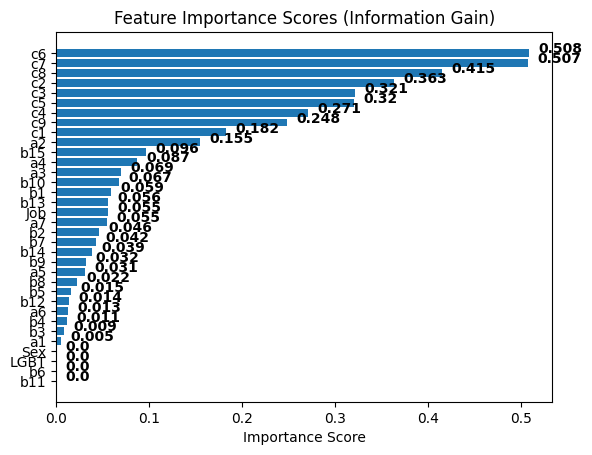

In [ ]:
# Split the dataset into features and target
X = wo_train.drop(columns=["Level", "Unnamed: 0"])
y = wo_train["Level"]

# Apply Information Gain
ig = mutual_info_regression(X, y)

# Create a dictionary of feature importance scores
feature_scores = {}
for i in range(len(X.columns)):
    feature_scores[X.columns[i]] = ig[i]
# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores and the sorted features
for feature, score in sorted_features:
    print("Feature:", feature, "Score:", score)
# Plot a horizontal bar chart of the feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

### Study


Feature: c6 Score: 0.5272720025278721
Feature: c5 Score: 0.3996471955893499
Feature: c7 Score: 0.3936669038122207
Feature: c8 Score: 0.3554473988702238
Feature: c4 Score: 0.32974482260249705
Feature: c3 Score: 0.32461624985961146
Feature: c1 Score: 0.322768994324548
Feature: c2 Score: 0.31739626557899125
Feature: c9 Score: 0.28106820381132414
Feature: b15 Score: 0.21534103921628045
Feature: b13 Score: 0.20042440943866424
Feature: a4 Score: 0.1903120928337172
Feature: b8 Score: 0.18671336855163645
Feature: b10 Score: 0.14350784255755533
Feature: a2 Score: 0.13858955949075424
Feature: b12 Score: 0.13617196860951486
Feature: b9 Score: 0.13362751781082238
Feature: b1 Score: 0.1281549262209123
Feature: b6 Score: 0.1272088974958332
Feature: b11 Score: 0.1251731810929626
Feature: a3 Score: 0.09874209049626881
Feature: b4 Score: 0.09766408950044658
Feature: b3 Score: 0.08188855477448076
Feature: Job Score: 0.06012118310616188
Feature: b2 Score: 0.05942488002053281
Feature: b14 Score: 0.0533474

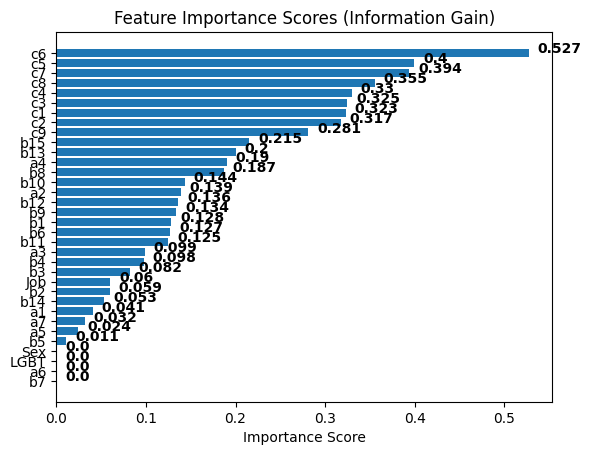

In [ ]:
# Split the dataset into features and target
X = st_train.drop(columns=["Level", "Unnamed: 0"])
y = st_train["Level"]

# Apply Information Gain
ig = mutual_info_regression(X, y)

# Create a dictionary of feature importance scores
feature_scores = {}
for i in range(len(X.columns)):
    feature_scores[X.columns[i]] = ig[i]
# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores and the sorted features
for feature, score in sorted_features:
    print("Feature:", feature, "Score:", score)
# Plot a horizontal bar chart of the feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

### Self


Feature: c8 Score: 0.5845292751382272
Feature: c6 Score: 0.5338753177129023
Feature: c2 Score: 0.5066076387536174
Feature: c7 Score: 0.4436638484857576
Feature: c4 Score: 0.39809202109587893
Feature: c5 Score: 0.3915037341449339
Feature: c9 Score: 0.37581028459424104
Feature: c1 Score: 0.3292857363173556
Feature: c3 Score: 0.3261474327034626
Feature: b9 Score: 0.2794344991180422
Feature: b8 Score: 0.2503266983779353
Feature: a2 Score: 0.22032389656759976
Feature: a3 Score: 0.1980979138272172
Feature: b12 Score: 0.18385802560815412
Feature: b7 Score: 0.18309457262505857
Feature: b15 Score: 0.17354518486427484
Feature: b3 Score: 0.1619875616413009
Feature: b5 Score: 0.14530140928664492
Feature: b10 Score: 0.14118618517799986
Feature: b11 Score: 0.12284218915231859
Feature: b14 Score: 0.09626078290069628
Feature: b6 Score: 0.09445167104307872
Feature: a4 Score: 0.09353777635850147
Feature: b1 Score: 0.08367940411346764
Feature: b2 Score: 0.06432777060935191
Feature: b4 Score: 0.0348725279

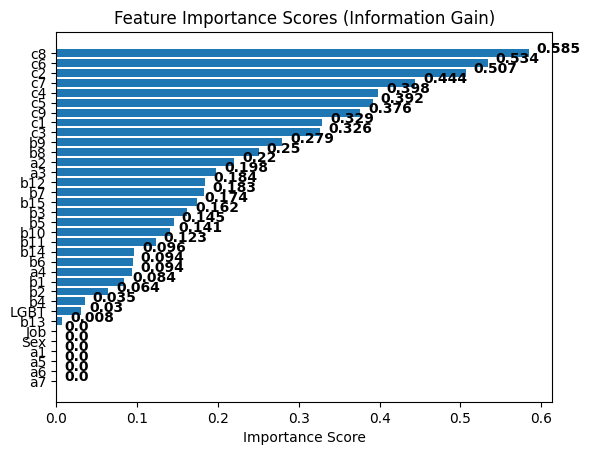

In [ ]:
# Split the dataset into features and target
X = se_train.drop(columns=["Level", "Unnamed: 0"])
y = se_train["Level"]

# Apply Information Gain
ig = mutual_info_regression(X, y)

# Create a dictionary of feature importance scores
feature_scores = {}
for i in range(len(X.columns)):
    feature_scores[X.columns[i]] = ig[i]
# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores and the sorted features
for feature, score in sorted_features:
    print("Feature:", feature, "Score:", score)
# Plot a horizontal bar chart of the feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

### Family


Feature: c8 Score: 0.5503918958264165
Feature: c6 Score: 0.548368782687954
Feature: c7 Score: 0.5246211171408253
Feature: c3 Score: 0.5050643374576698
Feature: c9 Score: 0.4720276900126841
Feature: c2 Score: 0.43683629951629177
Feature: c1 Score: 0.2986361224927192
Feature: c4 Score: 0.2980011946158605
Feature: c5 Score: 0.27806147954334337
Feature: a4 Score: 0.2061912776412469
Feature: a2 Score: 0.18501746224984572
Feature: a3 Score: 0.17843165079377332
Feature: b5 Score: 0.1687000651287236
Feature: b7 Score: 0.1610551035362029
Feature: b8 Score: 0.14296962148891312
Feature: LGBT Score: 0.06452538187790502
Feature: b15 Score: 0.05800011679681516
Feature: b6 Score: 0.05667419684707298
Feature: b13 Score: 0.0539855360417425
Feature: b3 Score: 0.052368316780714075
Feature: b11 Score: 0.041853145479854525
Feature: b4 Score: 0.03890327987409892
Feature: b12 Score: 0.03335028043586474
Feature: b14 Score: 0.022670734835006368
Feature: a1 Score: 0.010045325622126011
Feature: b10 Score: 0.0098

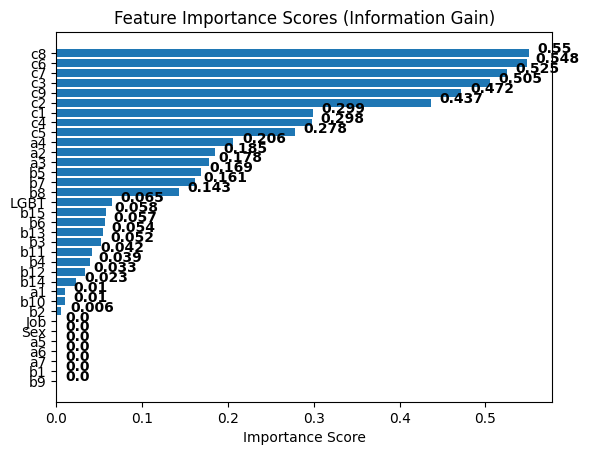

In [ ]:
# Split the dataset into features and target
X = fa_train.drop(columns=["Level", "Unnamed: 0"])
y = fa_train["Level"]

# Apply Information Gain
ig = mutual_info_regression(X, y)

# Create a dictionary of feature importance scores
feature_scores = {}
for i in range(len(X.columns)):
    feature_scores[X.columns[i]] = ig[i]
# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores and the sorted features
for feature, score in sorted_features:
    print("Feature:", feature, "Score:", score)
# Plot a horizontal bar chart of the feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

### Love


Feature: c2 Score: 0.5201091887100615
Feature: c6 Score: 0.48716575454484534
Feature: c4 Score: 0.4336164079701561
Feature: b8 Score: 0.42042158065496116
Feature: c1 Score: 0.3564925945673836
Feature: c3 Score: 0.34723418710288856
Feature: a2 Score: 0.3451932711640504
Feature: c8 Score: 0.3425998833505459
Feature: b9 Score: 0.32055873949965674
Feature: b1 Score: 0.31379266737362954
Feature: c5 Score: 0.30620305594252306
Feature: c7 Score: 0.2979925159957393
Feature: b4 Score: 0.2543546862170971
Feature: b7 Score: 0.23822284415093042
Feature: c9 Score: 0.22185849877044506
Feature: b12 Score: 0.21496105458114156
Feature: a7 Score: 0.1886487358355815
Feature: b3 Score: 0.15799932605204603
Feature: b5 Score: 0.1572479604057202
Feature: a4 Score: 0.14224164771597625
Feature: b2 Score: 0.13308972576697853
Feature: a5 Score: 0.13000163245919216
Feature: Sex Score: 0.12098289456785194
Feature: b15 Score: 0.11750059758789311
Feature: b6 Score: 0.0860258160680738
Feature: a6 Score: 0.07817896643

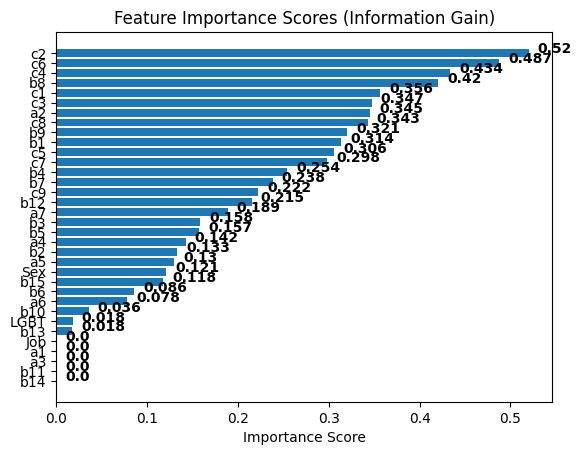

In [ ]:
# Split the dataset into features and target
X = lo_train.drop(columns=["Level", "Unnamed: 0"])
y = lo_train["Level"]

# Apply Information Gain
ig = mutual_info_regression(X, y)

# Create a dictionary of feature importance scores
feature_scores = {}
for i in range(len(X.columns)):
    feature_scores[X.columns[i]] = ig[i]
# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores and the sorted features
for feature, score in sorted_features:
    print("Feature:", feature, "Score:", score)
# Plot a horizontal bar chart of the feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

## Chi-Square Test

Giá trị p-value càng cao, càng không tốt cho model


In [ ]:
from sklearn.feature_selection import chi2
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Work


<Axes: >

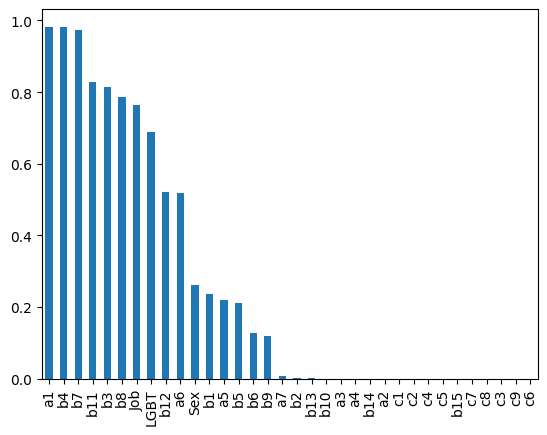

In [ ]:
# Split the dataset into features and target
X = wo_train.drop(columns=["Level", "Unnamed: 0"])
y = wo_train["Level"]

chi_scores = chi2(X, y)

p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)

p_values.plot.bar()

### Study


<Axes: >

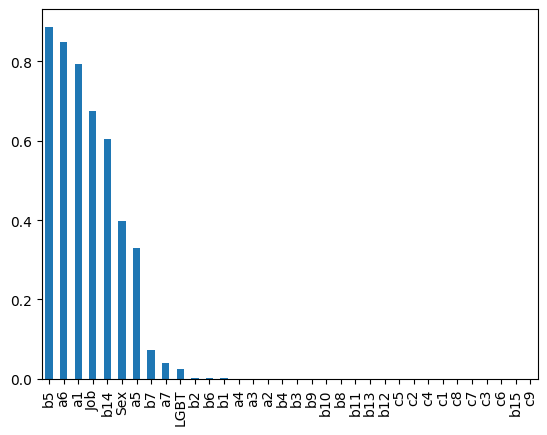

In [ ]:
# Split the dataset into features and target
X = st_train.drop(columns=["Level", "Unnamed: 0"])
y = st_train["Level"]

chi_scores = chi2(X, y)

p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)

p_values.plot.bar()

### Self


<Axes: >

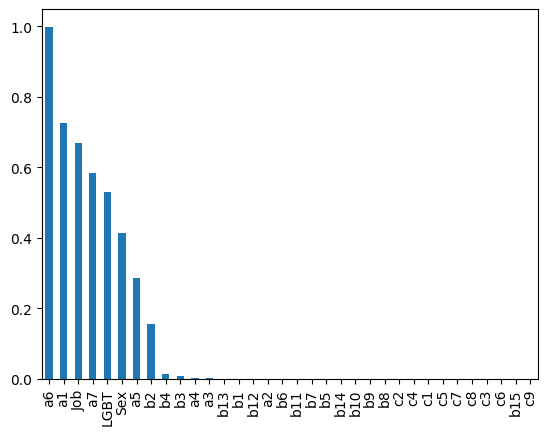

In [ ]:
# Split the dataset into features and target
X = se_train.drop(columns=["Level", "Unnamed: 0"])
y = se_train["Level"]

chi_scores = chi2(X, y)

p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)

p_values.plot.bar()

### Family


<Axes: >

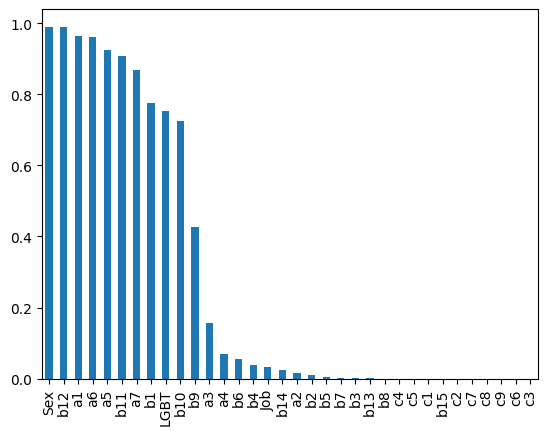

In [ ]:
# Split the dataset into features and target
X = fa_train.drop(columns=["Level", "Unnamed: 0"])
y = fa_train["Level"]

chi_scores = chi2(X, y)

p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)

p_values.plot.bar()

### Love


<Axes: >

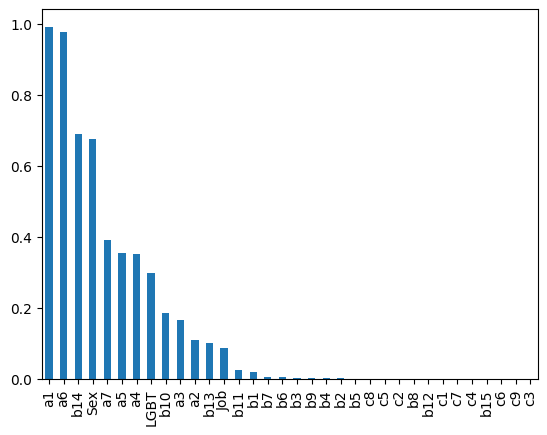

In [ ]:
# Split the dataset into features and target
X = lo_train.drop(columns=["Level", "Unnamed: 0"])
y = lo_train["Level"]

chi_scores = chi2(X, y)

p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)

p_values.plot.bar()

## Forward Selection


In [ ]:
# from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

### Work


Selected Features: ('LGBT', 'a1', 'a3', 'a4', 'a6', 'b2', 'b3', 'b8', 'b11', 'b13', 'c1', 'c3', 'c4', 'c5', 'c6')
Accuracy: 0.8572677595628415


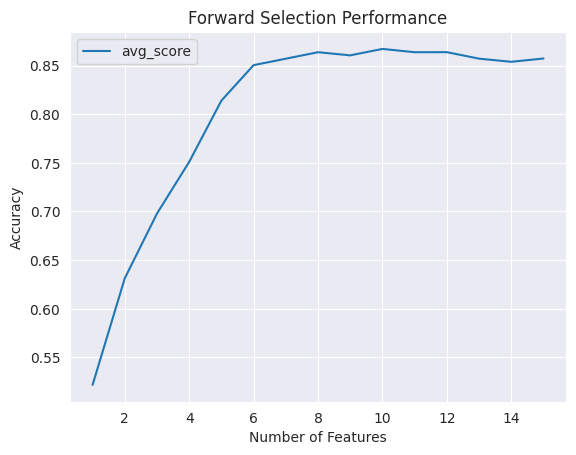

In [ ]:
# Split the dataset into features and target
X = wo_train.drop(columns=["Level"])
y = wo_train["Level"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the logistic regression model
model = LinearDiscriminantAnalysis()

# Define the forward selection object
sfs = SFS(model, k_features=15, forward=True, floating=False, scoring="accuracy", cv=5)

# Perform forward selection on the training set
sfs.fit(X_train, y_train)

# Print the selected features
print("Selected Features:", sfs.k_feature_names_)

# Evaluate the performance of the selected features on the testing set
accuracy = sfs.k_score_
print("Accuracy:", accuracy)

# Plot the performance of the model with different feature subsets
sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_df["avg_score"] = sfs_df["avg_score"].astype(float)
fig, ax = plt.subplots()
sfs_df.plot(kind="line", y="avg_score", ax=ax)
ax.set_xlabel("Number of Features")
ax.set_ylabel("Accuracy")
ax.set_title("Forward Selection Performance")
plt.show()

### Study


Selected Features: ('LGBT', 'a5', 'a6', 'a7', 'b3', 'b4', 'b5', 'b11', 'b15', 'c1', 'c3', 'c4', 'c6', 'c7', 'c8')
Accuracy: 0.8741224489795918


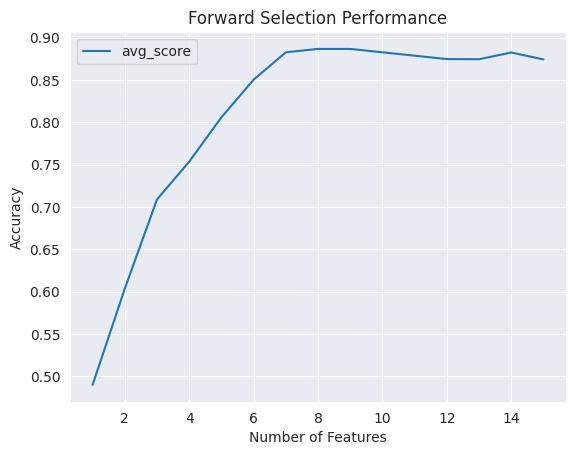

In [ ]:
# Split the dataset into features and target
X = st_train.drop(columns=["Level"])
y = st_train["Level"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the logistic regression model
model = LinearDiscriminantAnalysis()

# Define the forward selection object
sfs = SFS(model, k_features=15, forward=True, floating=False, scoring="accuracy", cv=5)

# Perform forward selection on the training set
sfs.fit(X_train, y_train)

# Print the selected features
print("Selected Features:", sfs.k_feature_names_)

# Evaluate the performance of the selected features on the testing set
accuracy = sfs.k_score_
print("Accuracy:", accuracy)

# Plot the performance of the model with different feature subsets
sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_df["avg_score"] = sfs_df["avg_score"].astype(float)
fig, ax = plt.subplots()
sfs_df.plot(kind="line", y="avg_score", ax=ax)
ax.set_xlabel("Number of Features")
ax.set_ylabel("Accuracy")
ax.set_title("Forward Selection Performance")
plt.show()

### Self


Selected Features: ('Job', 'Sex', 'a7', 'b5', 'b8', 'b9', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9')
Accuracy: 0.9310975609756097


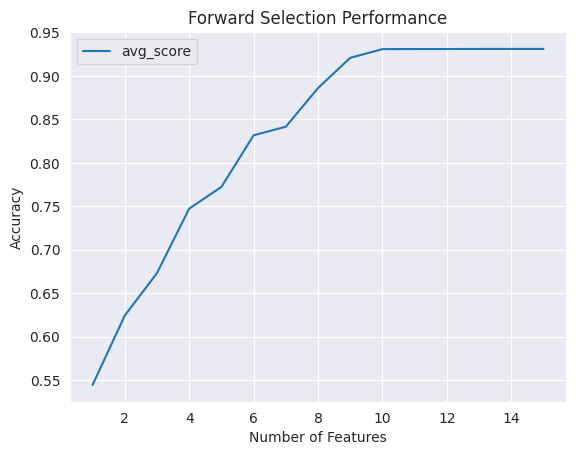

In [ ]:
# Split the dataset into features and target
X = se_train.drop(columns=["Level"])
y = se_train["Level"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the logistic regression model
model = LinearDiscriminantAnalysis()

# Define the forward selection object
sfs = SFS(model, k_features=15, forward=True, floating=False, scoring="accuracy", cv=5)

# Perform forward selection on the training set
sfs.fit(X_train, y_train)

# Print the selected features
print("Selected Features:", sfs.k_feature_names_)

# Evaluate the performance of the selected features on the testing set
accuracy = sfs.k_score_
print("Accuracy:", accuracy)

# Plot the performance of the model with different feature subsets
sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_df["avg_score"] = sfs_df["avg_score"].astype(float)
fig, ax = plt.subplots()
sfs_df.plot(kind="line", y="avg_score", ax=ax)
ax.set_xlabel("Number of Features")
ax.set_ylabel("Accuracy")
ax.set_title("Forward Selection Performance")
plt.show()

### Family


Selected Features: ('a1', 'a4', 'b4', 'b5', 'b10', 'b11', 'b13', 'b14', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c9')
Accuracy: 0.9029411764705882


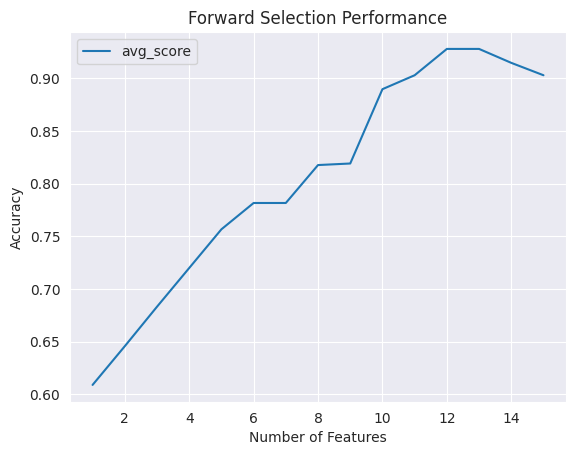

In [ ]:
# Split the dataset into features and target
X = fa_train.drop(columns=["Level"])
y = fa_train["Level"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the logistic regression model
model = LinearDiscriminantAnalysis()

# Define the forward selection object
sfs = SFS(model, k_features=15, forward=True, floating=False, scoring="accuracy", cv=5)

# Perform forward selection on the training set
sfs.fit(X_train, y_train)

# Print the selected features
print("Selected Features:", sfs.k_feature_names_)

# Evaluate the performance of the selected features on the testing set
accuracy = sfs.k_score_
print("Accuracy:", accuracy)

# Plot the performance of the model with different feature subsets
sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_df["avg_score"] = sfs_df["avg_score"].astype(float)
fig, ax = plt.subplots()
sfs_df.plot(kind="line", y="avg_score", ax=ax)
ax.set_xlabel("Number of Features")
ax.set_ylabel("Accuracy")
ax.set_title("Forward Selection Performance")
plt.show()

### Love


Selected Features: ('LGBT', 'a1', 'a3', 'a4', 'b1', 'b2', 'b6', 'b7', 'b8', 'b10', 'b13', 'c3', 'c4', 'c5', 'c7')
Accuracy: 0.8538461538461538


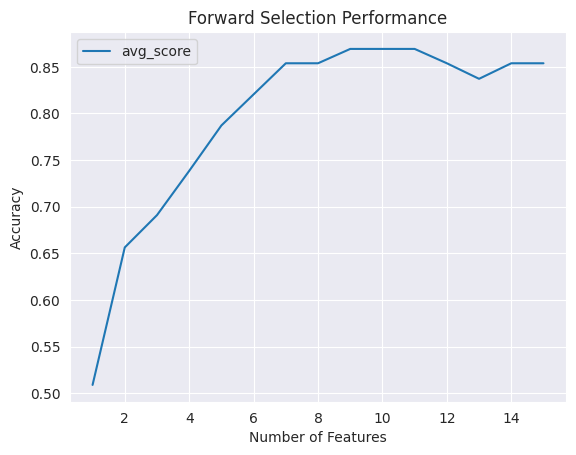

In [ ]:
# Split the dataset into features and target
X = lo_train.drop(columns=["Level"])
y = lo_train["Level"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the logistic regression model
model = LinearDiscriminantAnalysis()

# Define the forward selection object
sfs = SFS(model, k_features=15, forward=True, floating=False, scoring="accuracy", cv=5)

# Perform forward selection on the training set
sfs.fit(X_train, y_train)

# Print the selected features
print("Selected Features:", sfs.k_feature_names_)

# Evaluate the performance of the selected features on the testing set
accuracy = sfs.k_score_
print("Accuracy:", accuracy)

# Plot the performance of the model with different feature subsets
sfs_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
sfs_df["avg_score"] = sfs_df["avg_score"].astype(float)
fig, ax = plt.subplots()
sfs_df.plot(kind="line", y="avg_score", ax=ax)
ax.set_xlabel("Number of Features")
ax.set_ylabel("Accuracy")
ax.set_title("Forward Selection Performance")
plt.show()

## Automated Feature Selection


In [ ]:
pip install autofeatselect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 7.3 MB/s eta 0:00:00


In [ ]:
from autofeatselect import CorrelationCalculator, FeatureSelector, AutoFeatureSelect
from sklearn.model_selection import train_test_split

### Work


In [ ]:
# Setting numeric & categorical features for further analysis
response = "Level"
cat_feats = [c for c in wo_train.columns if "_cat" in c]
bin_feats = [c for c in wo_train.columns if "_bin" in c]
cat_feats = cat_feats + bin_feats
num_feats = [c for c in wo_train.columns if c not in cat_feats + [response]]

wo_train[num_feats] = wo_train[num_feats].astype("float")
wo_train[cat_feats] = wo_train[cat_feats].astype("object")

# Training & Test Split
X_train, X_test, y_train, y_test = train_test_split(
    wo_train[num_feats + cat_feats], wo_train[response], test_size=0.2, random_state=42
)
# Static features will not be removed even if they are correlated with other features.
static_features = ["ps_ind_01", "ps_ind_03", "ps_ind_14"]

# Detect correlated features
corr_df_num, num_remove_list = CorrelationCalculator.numeric_correlations(
    X_train, features=num_feats, static_features=static_features, threshold=0.9
)

corr_df_cat, cat_remove_list = CorrelationCalculator.categorical_correlations(
    X_train, features=cat_feats, static_features=None, threshold=0.9
)

# Remove correlated features
num_feats = [c for c in num_feats if c not in num_remove_list]
cat_feats = [c for c in cat_feats if c not in cat_remove_list]

# Create Feature Selector Object
feat_selector = FeatureSelector(
    modeling_type="classification",
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    numeric_columns=num_feats,
    categorical_columns=cat_feats,
    seed=24,
)

# XGBoost
xgb_importance_df = feat_selector.xgb_importance(
    hyperparam_dict=None, objective=None, return_plot=False
)
xgb_importance_df.head(15)

feature  importance
0       c6    0.288173
1       c7    0.103456
2       c4    0.085305
3       c5    0.072854
4       c3    0.072153
5       c2    0.068257
6       c8    0.061407
7       c1    0.058380
8       c9    0.037096
9       a2    0.012182
10      b3    0.011348
11      b1    0.011006
12     Job    0.008287
13      a3    0.007952
14      b7    0.007934

In [ ]:
# Random Forest
rf_importance_df = feat_selector.rf_importance(hyperparam_dict=None, return_plot=False)
rf_importance_df.head(15)

feature  importance
0       c6    0.124348
1       c7    0.107567
2       c8    0.093863
3       c2    0.090904
4       c5    0.089550
5       c3    0.070209
6       c4    0.064675
7       c1    0.058651
8       c9    0.047376
9       a2    0.020237
10      a4    0.014712
11     b15    0.014286
12      a3    0.014269
13     b14    0.012693
14      b9    0.011914

In [ ]:
# Recursive Feature Elimination with Cross-Validation
rfecv_importance_df = feat_selector.rfecv_importance(
    lgbm_hyperparams=None, rfecv_hyperparams=None, return_plot=False
)
rfecv_importance_df.head(15)

feature  importance
0       c9           1
1       c7           1
2       c6           1
3       c5           1
4       c4           1
5       c3           1
6       c2           1
7       c1           1
8       c8           1
9       b3           1
10      a2           2
11      b2           3
12      b7           4
13     b10           5
14     Job           6

In [ ]:
# Permutation Importance
permutation_importance_df = feat_selector.permutation_importance(
    lgbm_hyperparams=None, perimp_hyperparams=None, return_plot=False
)
permutation_importance_df.head(15)

feature  importance
0       c6    0.116279
1       c4    0.088372
2       c8    0.081395
3       c1    0.055814
4       c3    0.055814
5       c2    0.046512
6       c7    0.027907
7      b13    0.025581
8       b6    0.020930
9      b10    0.016279
10      c5    0.013953
11      b4    0.013953
12     Job    0.011628
13      a1    0.009302
14     b14    0.004651

### Study


In [ ]:
# Setting numeric & categorical features for further analysis
response = "Level"
cat_feats = [c for c in st_train.columns if "_cat" in c]
bin_feats = [c for c in st_train.columns if "_bin" in c]
cat_feats = cat_feats + bin_feats
num_feats = [c for c in st_train.columns if c not in cat_feats + [response]]

st_train[num_feats] = st_train[num_feats].astype("float")
st_train[cat_feats] = st_train[cat_feats].astype("object")

# Training & Test Split
X_train, X_test, y_train, y_test = train_test_split(
    st_train[num_feats + cat_feats], st_train[response], test_size=0.2, random_state=42
)
# Static features will not be removed even if they are correlated with other features.
static_features = ["ps_ind_01", "ps_ind_03", "ps_ind_14"]

# Detect correlated features
corr_df_num, num_remove_list = CorrelationCalculator.numeric_correlations(
    X_train, features=num_feats, static_features=static_features, threshold=0.9
)

corr_df_cat, cat_remove_list = CorrelationCalculator.categorical_correlations(
    X_train, features=cat_feats, static_features=None, threshold=0.9
)

# Remove correlated features
num_feats = [c for c in num_feats if c not in num_remove_list]
cat_feats = [c for c in cat_feats if c not in cat_remove_list]

# Create Feature Selector Object
feat_selector = FeatureSelector(
    modeling_type="classification",
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    numeric_columns=num_feats,
    categorical_columns=cat_feats,
    seed=24,
)

# XGBoost
xgb_importance_df = feat_selector.xgb_importance(
    hyperparam_dict=None, objective=None, return_plot=False
)
xgb_importance_df.head(15)

feature  importance
0       c6    0.243045
1       c7    0.103659
2       c2    0.081840
3       c4    0.072968
4       c5    0.064532
5       c8    0.063339
6       c1    0.057594
7       c3    0.055360
8       c9    0.032023
9      b13    0.026162
10      b4    0.023068
11     b11    0.019117
12      a2    0.015518
13     b12    0.013720
14     b10    0.011979

In [ ]:
# Random Forest
rf_importance_df = feat_selector.rf_importance(hyperparam_dict=None, return_plot=False)
rf_importance_df.head(15)

feature  importance
0       c6    0.119243
1       c8    0.084093
2       c1    0.076219
3       c4    0.075180
4       c5    0.071492
5       c2    0.066486
6       c7    0.066250
7       c3    0.047747
8       c9    0.039807
9       b4    0.036938
10     b13    0.027552
11      b8    0.024715
12     b15    0.023247
13     b12    0.022088
14     b10    0.021751

In [ ]:
# Recursive Feature Elimination with Cross-Validation
rfecv_importance_df = feat_selector.rfecv_importance(
    lgbm_hyperparams=None, rfecv_hyperparams=None, return_plot=False
)
rfecv_importance_df.head(15)

feature  importance
0       c9           1
1       c8           1
2      b13           1
3       c2           1
4       c3           1
5       c1           1
6       c4           1
7       c5           1
8       c6           1
9       c7           1
10      b4           2
11     b11           3
12     b15           4
13      b7           5
14     b10           6

In [ ]:
# Permutation Importance
permutation_importance_df = feat_selector.permutation_importance(
    lgbm_hyperparams=None, perimp_hyperparams=None, return_plot=False
)
permutation_importance_df.head(15)

feature    importance
0       c6  8.732394e-02
1       c4  5.352113e-02
2       c3  4.788732e-02
3       c1  4.507042e-02
4       c8  4.225352e-02
5       c5  2.535211e-02
6      b13  2.253521e-02
7       c2  2.253521e-02
8      b10  8.450704e-03
9       a1  8.450704e-03
10      c9  8.450704e-03
11     b11  5.633803e-03
12      b3  2.816901e-03
13      a3  2.220446e-17
14    LGBT  0.000000e+00

### Self


In [ ]:
# Setting numeric & categorical features for further analysis
response = "Level"
cat_feats = [c for c in se_train.columns if "_cat" in c]
bin_feats = [c for c in se_train.columns if "_bin" in c]
cat_feats = cat_feats + bin_feats
num_feats = [c for c in se_train.columns if c not in cat_feats + [response]]

se_train[num_feats] = se_train[num_feats].astype("float")
se_train[cat_feats] = se_train[cat_feats].astype("object")

# Training & Test Split
X_train, X_test, y_train, y_test = train_test_split(
    se_train[num_feats + cat_feats], se_train[response], test_size=0.2, random_state=42
)
# Static features will not be removed even if they are correlated with other features.
static_features = ["ps_ind_01", "ps_ind_03", "ps_ind_14"]

# Detect correlated features
corr_df_num, num_remove_list = CorrelationCalculator.numeric_correlations(
    X_train, features=num_feats, static_features=static_features, threshold=0.9
)

corr_df_cat, cat_remove_list = CorrelationCalculator.categorical_correlations(
    X_train, features=cat_feats, static_features=None, threshold=0.9
)

# Remove correlated features
num_feats = [c for c in num_feats if c not in num_remove_list]
cat_feats = [c for c in cat_feats if c not in cat_remove_list]

# Create Feature Selector Object
feat_selector = FeatureSelector(
    modeling_type="classification",
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    numeric_columns=num_feats,
    categorical_columns=cat_feats,
    seed=24,
)

# XGBoost
xgb_importance_df = feat_selector.xgb_importance(
    hyperparam_dict=None, objective=None, return_plot=False
)
xgb_importance_df.head(15)

feature  importance
0       c8    0.183715
1       c2    0.141851
2       c6    0.088240
3       c1    0.063925
4       c5    0.062555
5       c4    0.056854
6       c7    0.049577
7       c9    0.038449
8       a4    0.037840
9       c3    0.033473
10     b15    0.032441
11     b11    0.024274
12      b4    0.022732
13      b8    0.015590
14      b7    0.014320

In [ ]:
# Random Forest
rf_importance_df = feat_selector.rf_importance(hyperparam_dict=None, return_plot=False)
rf_importance_df.head(15)

feature  importance
0       c6    0.108267
1       c8    0.107619
2       c2    0.071512
3       c5    0.067695
4       c4    0.063742
5       c7    0.063035
6       c1    0.059021
7       c9    0.054583
8       c3    0.051097
9       b8    0.047011
10     b15    0.027612
11      b9    0.024851
12     b11    0.017275
13      b6    0.016592
14     b12    0.015473

In [ ]:
# Recursive Feature Elimination with Cross-Validation
rfecv_importance_df = feat_selector.rfecv_importance(
    lgbm_hyperparams=None, rfecv_hyperparams=None, return_plot=False
)
rfecv_importance_df.head(15)

feature  importance
0       c9           1
1      b15           1
2       b8           1
3       c8           1
4       c2           1
5       c3           1
6       c4           1
7       c1           1
8       c5           1
9       c6           1
10      c7           1
11     b11           2
12      b1           3
13      a4           4
14      b6           5

In [ ]:
# Permutation Importance
permutation_importance_df = feat_selector.permutation_importance(
    lgbm_hyperparams=None, perimp_hyperparams=None, return_plot=False
)
permutation_importance_df.head(15)

feature  importance
0       c8    0.051724
1       c6    0.048276
2       c3    0.037931
3       c4    0.031034
4      b12    0.031034
5       a5    0.027586
6       b7    0.027586
7      b11    0.020690
8      b14    0.020690
9       c7    0.020690
10      b2    0.017241
11      b3    0.017241
12      c2    0.013793
13     b10    0.013793
14      c9    0.013793

### Family


In [ ]:
# Setting numeric & categorical features for further analysis
response = "Level"
cat_feats = [c for c in fa_train.columns if "_cat" in c]
bin_feats = [c for c in fa_train.columns if "_bin" in c]
cat_feats = cat_feats + bin_feats
num_feats = [c for c in fa_train.columns if c not in cat_feats + [response]]

fa_train[num_feats] = fa_train[num_feats].astype("float")
fa_train[cat_feats] = fa_train[cat_feats].astype("object")

# Training & Test Split
X_train, X_test, y_train, y_test = train_test_split(
    fa_train[num_feats + cat_feats], fa_train[response], test_size=0.2, random_state=42
)
# Static features will not be removed even if they are correlated with other features.
static_features = ["ps_ind_01", "ps_ind_03", "ps_ind_14"]

# Detect correlated features
corr_df_num, num_remove_list = CorrelationCalculator.numeric_correlations(
    X_train, features=num_feats, static_features=static_features, threshold=0.9
)

corr_df_cat, cat_remove_list = CorrelationCalculator.categorical_correlations(
    X_train, features=cat_feats, static_features=None, threshold=0.9
)

# Remove correlated features
num_feats = [c for c in num_feats if c not in num_remove_list]
cat_feats = [c for c in cat_feats if c not in cat_remove_list]

# Create Feature Selector Object
feat_selector = FeatureSelector(
    modeling_type="classification",
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    numeric_columns=num_feats,
    categorical_columns=cat_feats,
    seed=24,
)

# XGBoost
xgb_importance_df = feat_selector.xgb_importance(
    hyperparam_dict=None, objective=None, return_plot=False
)
xgb_importance_df.head(15)

feature  importance
0       c3    0.201742
1       c6    0.155201
2       c8    0.096641
3       c7    0.075961
4       c2    0.073709
5       c5    0.064399
6       c4    0.040299
7      b14    0.030512
8       c1    0.029421
9      Job    0.026622
10     b13    0.025751
11      b6    0.023378
12      b7    0.020785
13      c9    0.017787
14      b3    0.013567

In [ ]:
# Random Forest
rf_importance_df = feat_selector.rf_importance(hyperparam_dict=None, return_plot=False)
rf_importance_df.head(15)

feature  importance
0       c3    0.109906
1       c6    0.084280
2       c8    0.084144
3       c7    0.066831
4       c2    0.053538
5       c4    0.049046
6       c1    0.049041
7       c9    0.046974
8       c5    0.041461
9      Job    0.031900
10     b15    0.026769
11      b8    0.026181
12     b13    0.025002
13      a4    0.024282
14      b7    0.021676

In [ ]:
# Recursive Feature Elimination with Cross-Validation
rfecv_importance_df = feat_selector.rfecv_importance(
    lgbm_hyperparams=None, rfecv_hyperparams=None, return_plot=False
)
rfecv_importance_df.head(15)

feature  importance
0      Job           1
1       c7           1
2       c6           1
3       c5           1
4       c4           1
5       c3           1
6       c2           1
7       c1           1
8      b15           1
9      b14           1
10     b13           1
11     b10           1
12      b9           1
13      c8           1
14      b7           1

In [ ]:
# Permutation Importance
permutation_importance_df = feat_selector.permutation_importance(
    lgbm_hyperparams=None, perimp_hyperparams=None, return_plot=False
)
permutation_importance_df.head(15)

feature  importance
0       c2    0.050000
1       c9    0.033333
2       c8    0.016667
3       b2    0.008333
4       c6    0.008333
5       c7    0.008333
6       c1    0.000000
7      b11    0.000000
8      Sex    0.000000
9       b6    0.000000
10      b8    0.000000
11      a2    0.000000
12    LGBT    0.000000
13      a1    0.000000
14      a7    0.000000

### Love


In [ ]:
# Setting numeric & categorical features for further analysis
response = "Level"
cat_feats = [c for c in lo_train.columns if "_cat" in c]
bin_feats = [c for c in lo_train.columns if "_bin" in c]
cat_feats = cat_feats + bin_feats
num_feats = [c for c in lo_train.columns if c not in cat_feats + [response]]

lo_train[num_feats] = lo_train[num_feats].astype("float")
lo_train[cat_feats] = lo_train[cat_feats].astype("object")

# Training & Test Split
X_train, X_test, y_train, y_test = train_test_split(
    lo_train[num_feats + cat_feats], lo_train[response], test_size=0.2, random_state=42
)
# Static features will not be removed even if they are correlated with other features.
static_features = ["ps_ind_01", "ps_ind_03", "ps_ind_14"]

# Detect correlated features
corr_df_num, num_remove_list = CorrelationCalculator.numeric_correlations(
    X_train, features=num_feats, static_features=static_features, threshold=0.9
)

corr_df_cat, cat_remove_list = CorrelationCalculator.categorical_correlations(
    X_train, features=cat_feats, static_features=None, threshold=0.9
)

# Remove correlated features
num_feats = [c for c in num_feats if c not in num_remove_list]
cat_feats = [c for c in cat_feats if c not in cat_remove_list]

# Create Feature Selector Object
feat_selector = FeatureSelector(
    modeling_type="classification",
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    numeric_columns=num_feats,
    categorical_columns=cat_feats,
    seed=24,
)

# XGBoost
xgb_importance_df = feat_selector.xgb_importance(
    hyperparam_dict=None, objective=None, return_plot=False
)
xgb_importance_df.head(15)

feature  importance
0       c4    0.162675
1       c1    0.095990
2       c6    0.087168
3       c3    0.082148
4       c2    0.069122
5       b8    0.064931
6       c5    0.053181
7       b9    0.047155
8      b15    0.039338
9       b6    0.032302
10      c7    0.027832
11      c9    0.026215
12      b5    0.024307
13      b7    0.021846
14     b11    0.021188

In [ ]:
# Random Forest
rf_importance_df = feat_selector.rf_importance(hyperparam_dict=None, return_plot=False)
rf_importance_df.head(15)

feature  importance
0       c3    0.077855
1       c4    0.071961
2       c1    0.067113
3       c6    0.059544
4       c5    0.057407
5       c2    0.044145
6       b9    0.043246
7       b6    0.039255
8       c8    0.039203
9       b1    0.037491
10      b7    0.033387
11      c7    0.032286
12      c9    0.031117
13      b8    0.030929
14     b12    0.029921

In [ ]:
# Recursive Feature Elimination with Cross-Validation
rfecv_importance_df = feat_selector.rfecv_importance(
    lgbm_hyperparams=None, rfecv_hyperparams=None, return_plot=False
)
rfecv_importance_df.head(15)

feature  importance
0       c7           1
1       c6           1
2       c4           1
3       c3           1
4       c2           1
5       c1           1
6       b9           1
7       b8           1
8       b6           1
9       b1           2
10      c9           3
11     b15           4
12      b2           5
13      c5           6
14      b5           7

In [ ]:
# Permutation Importance
permutation_importance_df = feat_selector.permutation_importance(
    lgbm_hyperparams=None, perimp_hyperparams=None, return_plot=False
)
permutation_importance_df.head(15)

feature  importance
0       c3    0.077778
1       b8    0.077778
2       c1    0.055556
3       c9    0.055556
4      b12    0.044444
5       b2    0.044444
6       a2    0.033333
7       c6    0.033333
8       c8    0.022222
9       c7    0.022222
10      b5    0.022222
11     b13    0.022222
12      c5    0.011111
13      b1    0.011111
14      a3    0.000000

In [ ]:
# Family
fa = pd.read_excel("/content/family.xlsx")

# Love
lo = pd.read_excel("/content/love.xlsx")

In [ ]:
from sklearn.utils import shuffle

fa = shuffle(fa)
fa.head()

Job  Sex  LGBT   a1   a2   a3   a4   a5   a6  a7  ...  c1  c2  c3  c4  \
70     0    0   1.0  2.0  1.0  0.5  1.0  1.0  0.5   4  ...   2   2   3   1   
121    4    1   0.0  1.5  0.0  0.5  0.0  1.0  0.5   2  ...   1   1   1   1   
93     2    0   0.0  1.5  0.5  0.5  1.0  0.0  0.5   3  ...   1   2   0   1   
20     2    0   0.0  1.5  0.0  1.0  0.5  0.0  0.0   3  ...   3   1   2   3   
13     3    0   0.0  2.0  0.5  0.5  0.5  0.0  0.0   3  ...   1   1   0   2   

     c5  c6  c7  c8  c9  Level  
70    3   3   3   3   3      4  
121   2   1   1   1   1      2  
93    1   2   1   1   1      2  
20    1   1   3   1   2      3  
13    1   0   0   1   1      1  

[5 rows x 35 columns]

In [ ]:
from sklearn.model_selection import train_test_split

X_fa = fa[
    [
        "Job",
        "b7",
        "b3",
        "b2",
        "b13",
        "b14",
        "c1",
        "c2",
        "c3",
        "c4",
        "c5",
        "c6",
        "c7",
        "c8",
        "c9",
    ]
]
Y_fa = fa["Level"]

X_training_fa, X_fa_test, Y_training_fa, Y_fa_test = train_test_split(
    X_fa, Y_fa, test_size=0.9, random_state=42
)
X_train_fa, X_test_fa, Y_train_fa, Y_test_fa = train_test_split(
    X_training_fa, Y_training_fa, test_size=0.2, random_state=42
)

In [ ]:
X_training_fa.shape, X_fa_test.shape, X_train_fa.shape, X_test_fa.shape

((17, 15), (153, 15), (13, 15), (4, 15))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

num_folds = 10
seed = 7
scoring = "accuracy"

models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))

In [ ]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_fa, Y_train_fa, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.690000 (0.113904)
LDA: 0.858889 (0.085498)
KNN: 0.637778 (0.146835)
CART: 0.602222 (0.144256)
NB: 0.797778 (0.097474)
SVM: 0.744444 (0.095581)


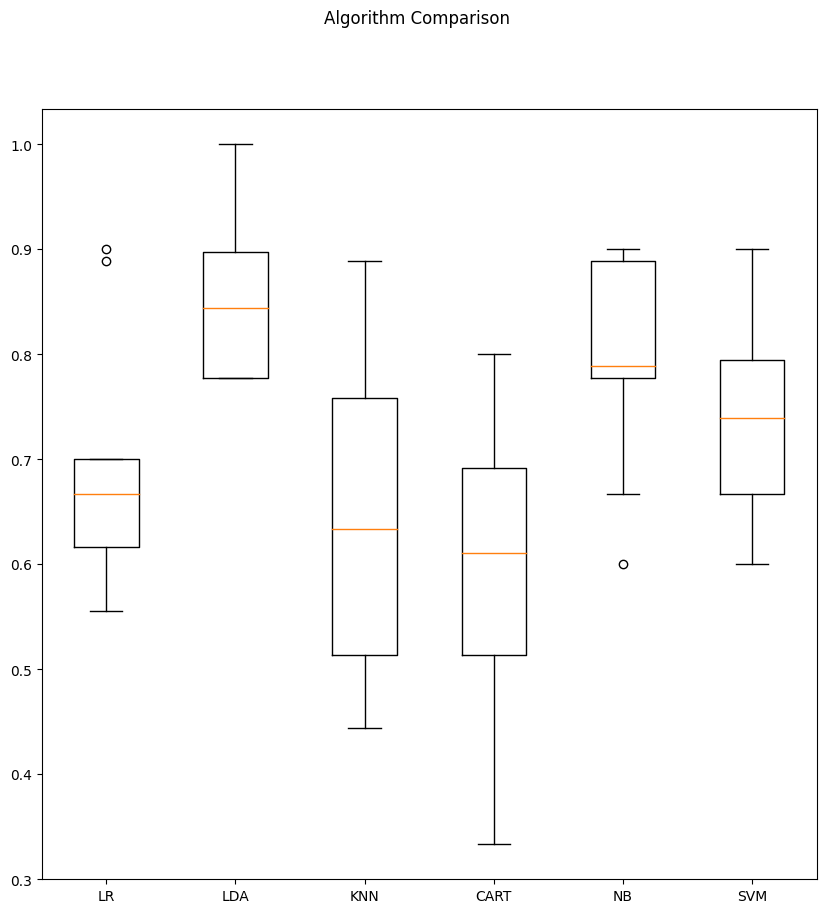

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
pipelines = []
pipelines.append(
    ("ScaledLR", Pipeline([("Scaler", StandardScaler()), ("LR", LogisticRegression())]))
)
pipelines.append(
    (
        "ScaledLDA",
        Pipeline([("Scaler", StandardScaler()), ("LDA", LinearDiscriminantAnalysis())]),
    )
)
pipelines.append(
    (
        "ScaledKNN",
        Pipeline([("Scaler", StandardScaler()), ("KNN", KNeighborsClassifier())]),
    )
)
pipelines.append(
    (
        "ScaledCART",
        Pipeline([("Scaler", StandardScaler()), ("CART", DecisionTreeClassifier())]),
    )
)
pipelines.append(
    ("ScaledNB", Pipeline([("Scaler", StandardScaler()), ("NB", GaussianNB())]))
)
pipelines.append(
    ("ScaledSVM", Pipeline([("Scaler", StandardScaler()), ("SVM", SVC())]))
)
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_fa, Y_train_fa, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.733333 (0.120185)
ScaledLDA: 0.858889 (0.085498)
ScaledKNN: 0.754444 (0.124964)
ScaledCART: 0.592222 (0.187515)
ScaledNB: 0.807778 (0.102204)
ScaledSVM: 0.850000 (0.074079)


**LDA - LR - SVM**


In [ ]:
ensembles = []
ensembles.append(("AB", AdaBoostClassifier()))
ensembles.append(("GBM", GradientBoostingClassifier()))
ensembles.append(("RF", RandomForestClassifier()))
ensembles.append(("ET", ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_fa, Y_train_fa, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.400000 (0.126784)
GBM: 0.687778 (0.140761)
RF: 0.815556 (0.123248)
ET: 0.781111 (0.151621)


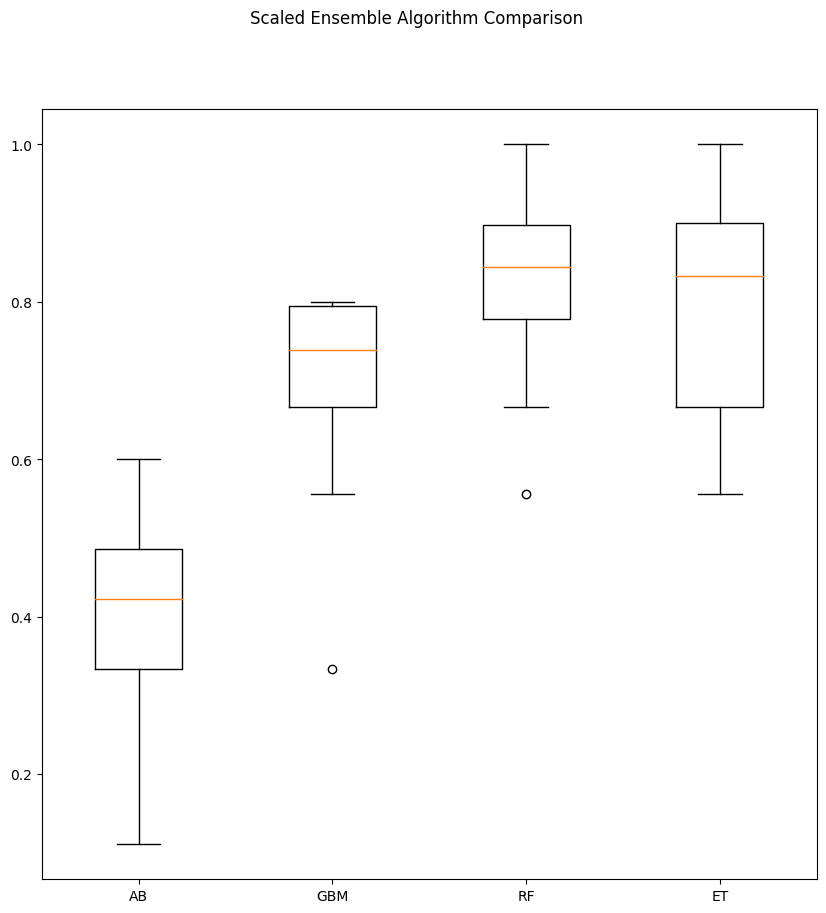

In [ ]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle("Scaled Ensemble Algorithm Comparison")
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

**RF - ET**


# Split and Prepare Data


In [ ]:
from sklearn.model_selection import train_test_split

## Work

'a2', 'a3', 'a4', 'b10', 'b14', 'b15', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'


In [ ]:
test = random 10% cua total data
train = total data - test

In [ ]:
X_wo = wo_train[
    [
        "a2",
        "a3",
        "a4",
        "b10",
        "b14",
        "b15",
        "c1",
        "c2",
        "c3",
        "c4",
        "c5",
        "c6",
        "c7",
        "c8",
        "c9",
    ]
]
Y_wo = wo_train["Level"]

X_train_wo, X_test_wo, Y_train_wo, Y_test_wo = train_test_split(
    X_wo, Y_wo, test_size=0.1, random_state=42
)

## Study

'b3', 'b4', 'b10', 'b11', 'b13', 'b15', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'


In [ ]:
X_st = st_train[
    [
        "b3",
        "b4",
        "b10",
        "b11",
        "b13",
        "b15",
        "c1",
        "c2",
        "c3",
        "c4",
        "c5",
        "c6",
        "c7",
        "c8",
        "c9",
    ]
]
Y_st = st_train["Level"]

X_train_st, X_test_st, Y_train_st, Y_test_st = train_test_split(
    X_st, Y_st, test_size=0.2, random_state=42
)

## Self

'b7', 'b8', 'b9', 'b11', 'b12', 'b15' 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'


In [ ]:
X_se = se_train[
    [
        "b7",
        "b8",
        "b9",
        "b11",
        "b12",
        "b15",
        "c1",
        "c2",
        "c3",
        "c4",
        "c5",
        "c6",
        "c7",
        "c8",
        "c9",
    ]
]
Y_se = se_train["Level"]

X_train_se, X_test_se, Y_train_se, Y_test_se = train_test_split(
    X_se, Y_se, test_size=0.2, random_state=42
)

## Family

'Job', 'b7','b13', 'b14', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9' + 'b2', 'b3', 'b15', 'b8'


In [ ]:
X_fa = fa_train[
    [
        "Job",
        "b7",
        "b3",
        "b2",
        "b13",
        "b14",
        "c1",
        "c2",
        "c3",
        "c4",
        "c5",
        "c6",
        "c7",
        "c8",
        "c9",
    ]
]
Y_fa = fa_train["Level"]

X_train_fa, X_test_fa, Y_train_fa, Y_test_fa = train_test_split(
    X_fa, Y_fa, test_size=0.2, random_state=42
)

## Love

'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'b1', 'b5', 'b6', 'b7', 'b8', 'b9'


In [ ]:
X_lo = lo_train[
    [
        "c1",
        "c2",
        "c3",
        "c4",
        "c5",
        "c6",
        "c7",
        "c8",
        "c9",
        "b1",
        "b5",
        "b6",
        "b7",
        "b8",
        "b9",
    ]
]
Y_lo = lo_train["Level"]

X_train_lo, X_test_lo, Y_train_lo, Y_test_lo = train_test_split(
    X_lo, Y_lo, test_size=0.2, random_state=42
)

# Modeling


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

num_folds = 10
seed = 7
scoring = "accuracy"

models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

num_folds = 10
seed = 7
scoring = "accuracy"

models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_wo, Y_train_wo, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

pipelines = []
pipelines.append(
    ("ScaledLR", Pipeline([("Scaler", StandardScaler()), ("LR", LogisticRegression())]))
)
pipelines.append(
    (
        "ScaledLDA",
        Pipeline([("Scaler", StandardScaler()), ("LDA", LinearDiscriminantAnalysis())]),
    )
)
pipelines.append(
    (
        "ScaledKNN",
        Pipeline([("Scaler", StandardScaler()), ("KNN", KNeighborsClassifier())]),
    )
)
pipelines.append(
    (
        "ScaledCART",
        Pipeline([("Scaler", StandardScaler()), ("CART", DecisionTreeClassifier())]),
    )
)
pipelines.append(
    ("ScaledNB", Pipeline([("Scaler", StandardScaler()), ("NB", GaussianNB())]))
)
pipelines.append(
    ("ScaledSVM", Pipeline([("Scaler", StandardScaler()), ("SVM", SVC())]))
)
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_wo, Y_train_wo, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ensembles = []
ensembles.append(("AB", AdaBoostClassifier()))
ensembles.append(("GBM", GradientBoostingClassifier()))
ensembles.append(("RF", RandomForestClassifier()))
ensembles.append(("ET", ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_wo, Y_train_wo, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

fig = pyplot.figure(figsize=(10, 10))
fig.suptitle("Scaled Ensemble Algorithm Comparison")
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Work


In [ ]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_wo, Y_train_wo, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.912941 (0.038732)
LDA: 0.927479 (0.029171)
KNN: 0.820168 (0.048507)
CART: 0.683109 (0.075616)
NB: 0.796387 (0.043607)
SVM: 0.898319 (0.039633)


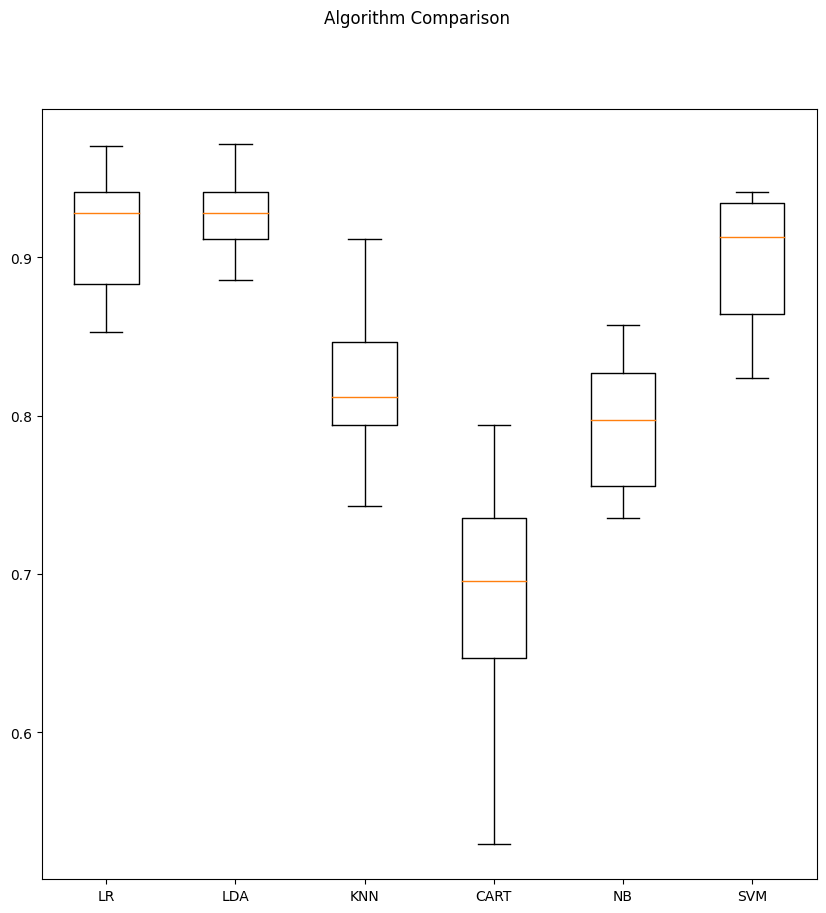

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
pipelines = []
pipelines.append(
    ("ScaledLR", Pipeline([("Scaler", StandardScaler()), ("LR", LogisticRegression())]))
)
pipelines.append(
    (
        "ScaledLDA",
        Pipeline([("Scaler", StandardScaler()), ("LDA", LinearDiscriminantAnalysis())]),
    )
)
pipelines.append(
    (
        "ScaledKNN",
        Pipeline([("Scaler", StandardScaler()), ("KNN", KNeighborsClassifier())]),
    )
)
pipelines.append(
    (
        "ScaledCART",
        Pipeline([("Scaler", StandardScaler()), ("CART", DecisionTreeClassifier())]),
    )
)
pipelines.append(
    ("ScaledNB", Pipeline([("Scaler", StandardScaler()), ("NB", GaussianNB())]))
)
pipelines.append(
    ("ScaledSVM", Pipeline([("Scaler", StandardScaler()), ("SVM", SVC())]))
)
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_wo, Y_train_wo, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.907227 (0.032965)
ScaledLDA: 0.927479 (0.029171)
ScaledKNN: 0.788151 (0.068111)
ScaledCART: 0.691933 (0.062283)
ScaledNB: 0.796387 (0.043607)
ScaledSVM: 0.880756 (0.051426)


**LDA - LR - SVM**


In [ ]:
ensembles = []
ensembles.append(("AB", AdaBoostClassifier()))
ensembles.append(("GBM", GradientBoostingClassifier()))
ensembles.append(("RF", RandomForestClassifier()))
ensembles.append(("ET", ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_wo, Y_train_wo, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.465042 (0.066284)
GBM: 0.761597 (0.056772)
RF: 0.807983 (0.073900)
ET: 0.810840 (0.069751)


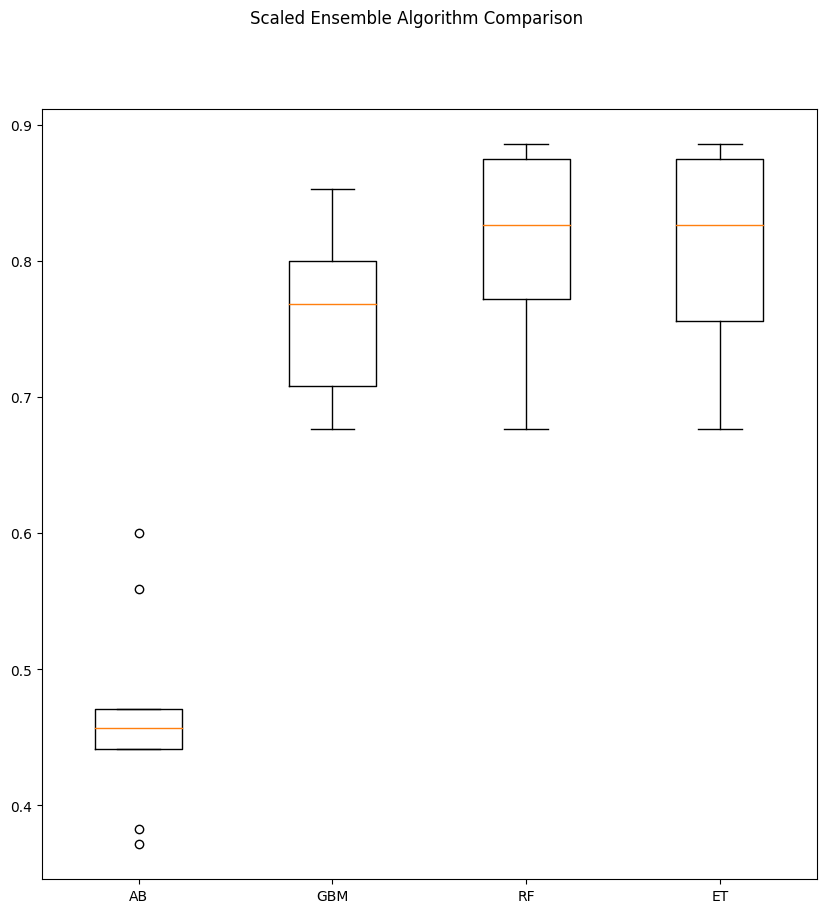

In [ ]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle("Scaled Ensemble Algorithm Comparison")
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

**RF - ET**


## Study


In [ ]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_st, Y_train_st, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.816749 (0.057039)
LDA: 0.904926 (0.054262)
KNN: 0.696059 (0.069011)
CART: 0.678079 (0.080031)
NB: 0.799384 (0.071711)
SVM: 0.802709 (0.078021)


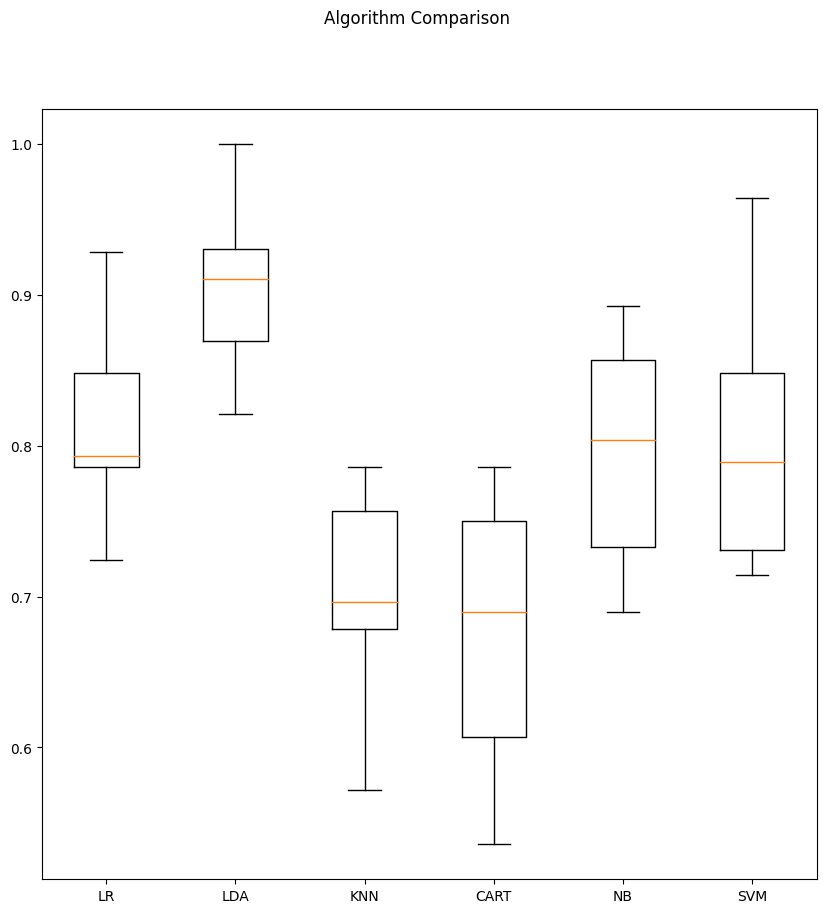

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
pipelines = []
pipelines.append(
    ("ScaledLR", Pipeline([("Scaler", StandardScaler()), ("LR", LogisticRegression())]))
)
pipelines.append(
    (
        "ScaledLDA",
        Pipeline([("Scaler", StandardScaler()), ("LDA", LinearDiscriminantAnalysis())]),
    )
)
pipelines.append(
    (
        "ScaledKNN",
        Pipeline([("Scaler", StandardScaler()), ("KNN", KNeighborsClassifier())]),
    )
)
pipelines.append(
    (
        "ScaledCART",
        Pipeline([("Scaler", StandardScaler()), ("CART", DecisionTreeClassifier())]),
    )
)
pipelines.append(
    ("ScaledNB", Pipeline([("Scaler", StandardScaler()), ("NB", GaussianNB())]))
)
pipelines.append(
    ("ScaledSVM", Pipeline([("Scaler", StandardScaler()), ("SVM", SVC())]))
)
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_st, Y_train_st, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.830788 (0.055403)
ScaledLDA: 0.904926 (0.054262)
ScaledKNN: 0.734975 (0.055404)
ScaledCART: 0.625493 (0.105739)
ScaledNB: 0.799384 (0.071711)
ScaledSVM: 0.823768 (0.067925)


**LDA - LR - SVM**


In [ ]:
ensembles = []
ensembles.append(("AB", AdaBoostClassifier()))
ensembles.append(("GBM", GradientBoostingClassifier()))
ensembles.append(("RF", RandomForestClassifier()))
ensembles.append(("ET", ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_st, Y_train_st, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.438670 (0.085399)
GBM: 0.745443 (0.062945)
RF: 0.770197 (0.079393)
ET: 0.773768 (0.042867)


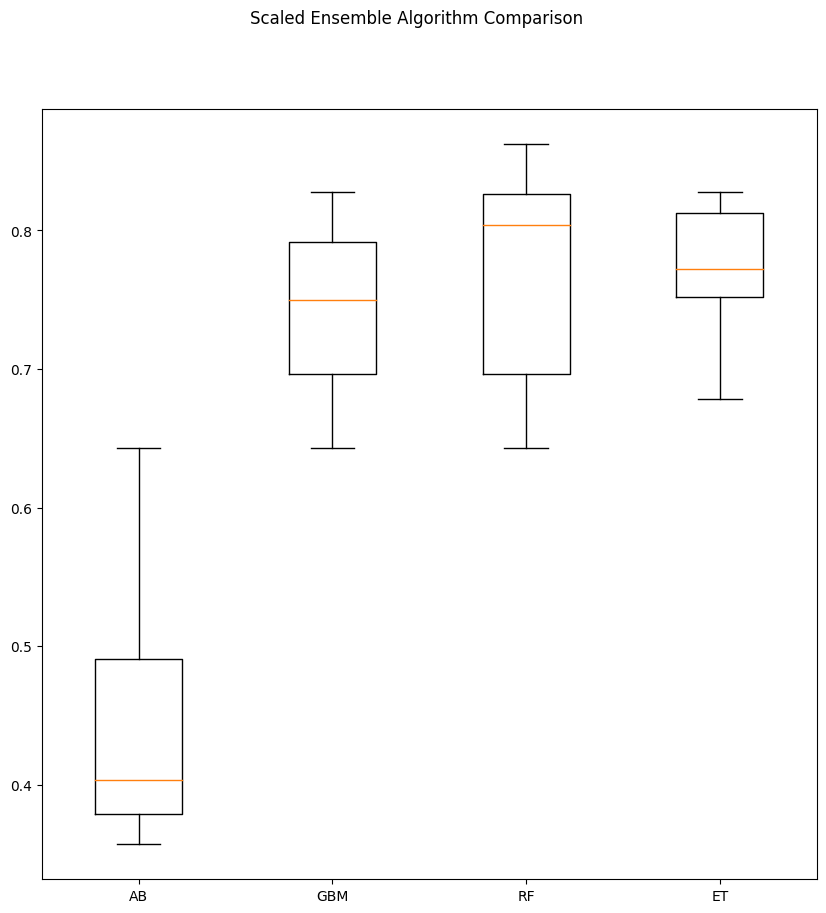

In [ ]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle("Scaled Ensemble Algorithm Comparison")
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

**RF - ET**


## Self


In [ ]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_se, Y_train_se, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.800725 (0.059336)
LDA: 0.891486 (0.040382)
KNN: 0.727899 (0.141002)
CART: 0.692754 (0.091614)
NB: 0.770652 (0.058017)
SVM: 0.805254 (0.085123)


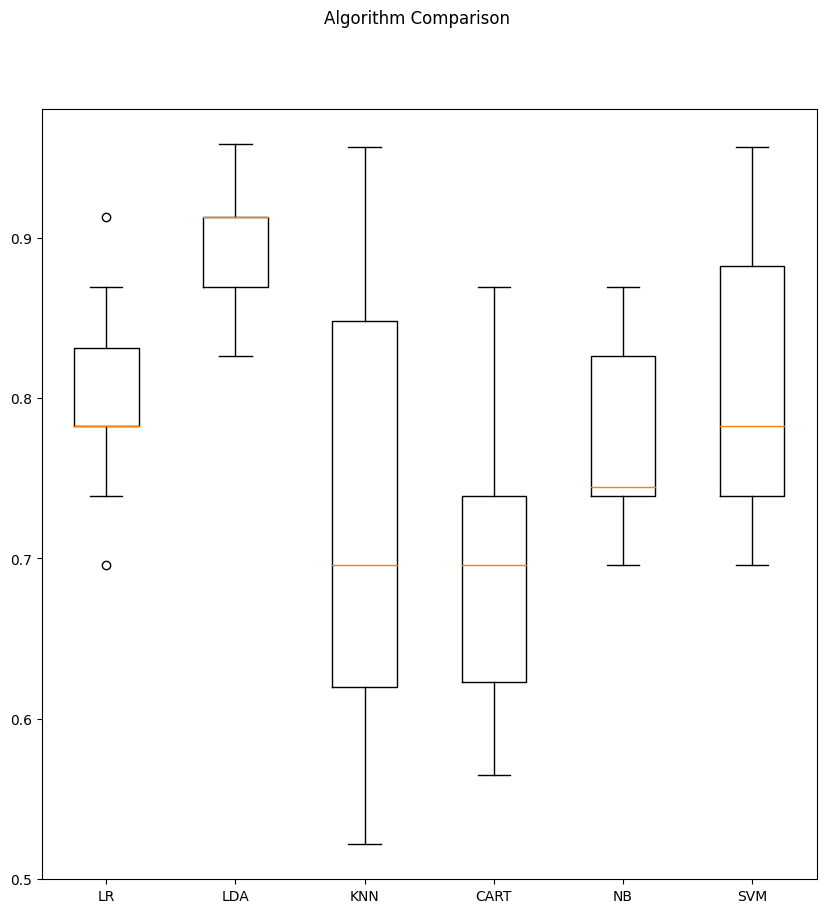

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
pipelines = []
pipelines.append(
    ("ScaledLR", Pipeline([("Scaler", StandardScaler()), ("LR", LogisticRegression())]))
)
pipelines.append(
    (
        "ScaledLDA",
        Pipeline([("Scaler", StandardScaler()), ("LDA", LinearDiscriminantAnalysis())]),
    )
)
pipelines.append(
    (
        "ScaledKNN",
        Pipeline([("Scaler", StandardScaler()), ("KNN", KNeighborsClassifier())]),
    )
)
pipelines.append(
    (
        "ScaledCART",
        Pipeline([("Scaler", StandardScaler()), ("CART", DecisionTreeClassifier())]),
    )
)
pipelines.append(
    ("ScaledNB", Pipeline([("Scaler", StandardScaler()), ("NB", GaussianNB())]))
)
pipelines.append(
    ("ScaledSVM", Pipeline([("Scaler", StandardScaler()), ("SVM", SVC())]))
)
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_se, Y_train_se, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.835507 (0.069509)
ScaledLDA: 0.891486 (0.040382)
ScaledKNN: 0.771196 (0.117835)
ScaledCART: 0.697101 (0.081842)
ScaledNB: 0.770652 (0.058017)
ScaledSVM: 0.822645 (0.073482)


**LDA - LR - SVM**


In [ ]:
ensembles = []
ensembles.append(("AB", AdaBoostClassifier()))
ensembles.append(("GBM", GradientBoostingClassifier()))
ensembles.append(("RF", RandomForestClassifier()))
ensembles.append(("ET", ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_se, Y_train_se, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.484783 (0.094284)
GBM: 0.692572 (0.081381)
RF: 0.792210 (0.046738)
ET: 0.770833 (0.094444)


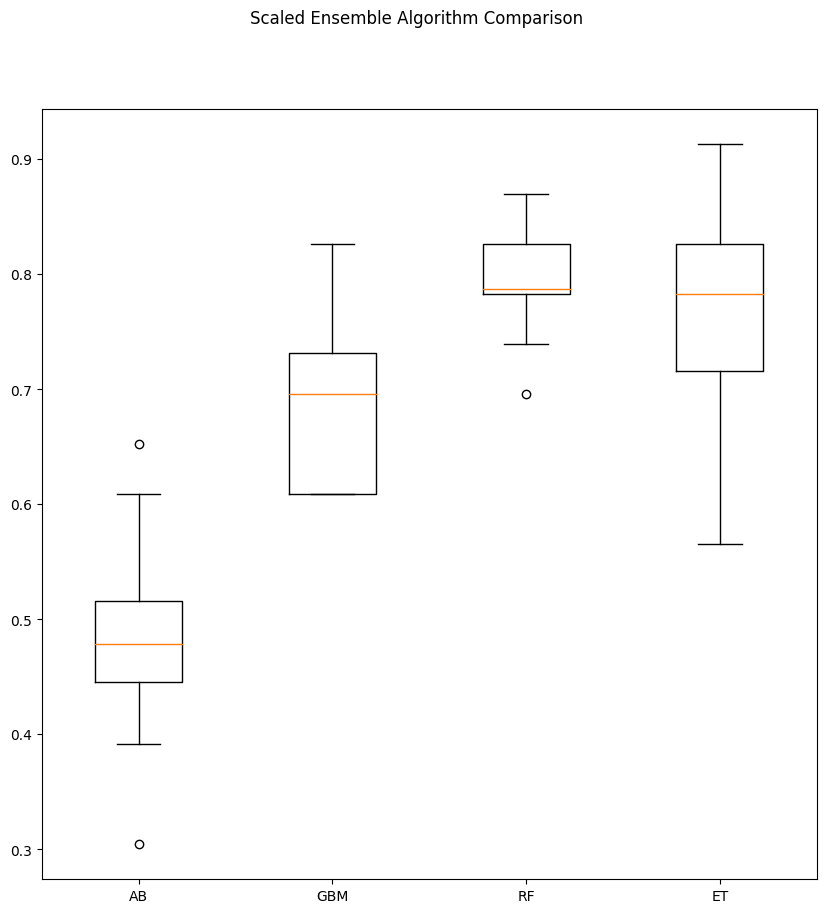

In [ ]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle("Scaled Ensemble Algorithm Comparison")
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

**RF - ET**


## Family


In [ ]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_fa, Y_train_fa, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.690000 (0.113904)
LDA: 0.858889 (0.085498)
KNN: 0.637778 (0.146835)
CART: 0.602222 (0.144256)
NB: 0.797778 (0.097474)
SVM: 0.744444 (0.095581)


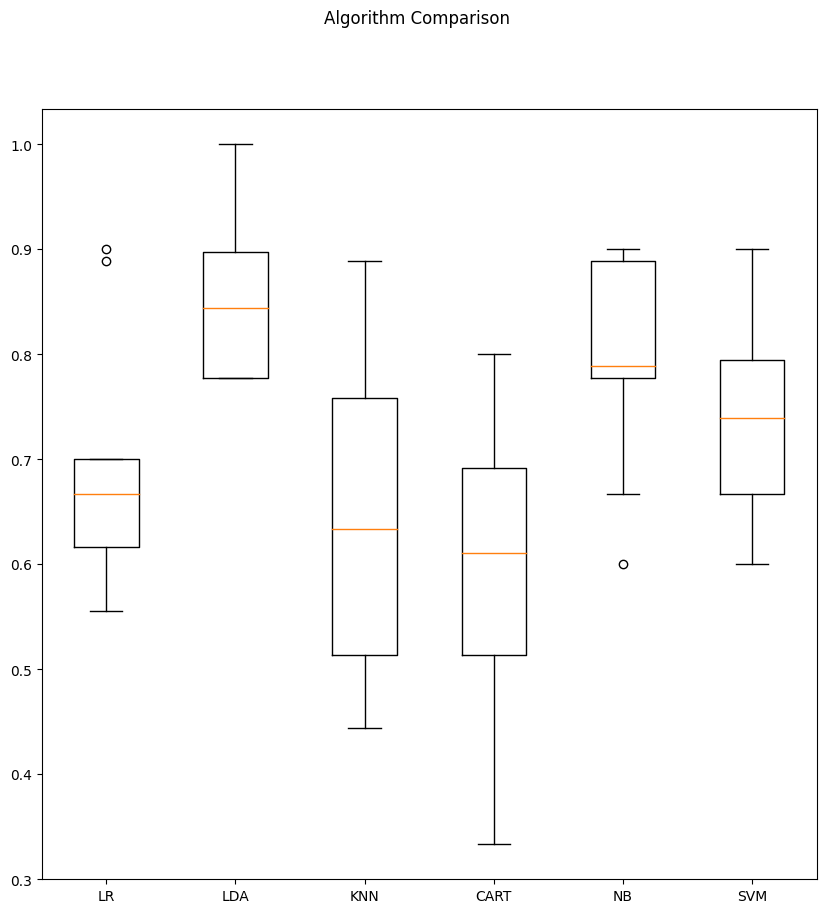

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
pipelines = []
pipelines.append(
    ("ScaledLR", Pipeline([("Scaler", StandardScaler()), ("LR", LogisticRegression())]))
)
pipelines.append(
    (
        "ScaledLDA",
        Pipeline([("Scaler", StandardScaler()), ("LDA", LinearDiscriminantAnalysis())]),
    )
)
pipelines.append(
    (
        "ScaledKNN",
        Pipeline([("Scaler", StandardScaler()), ("KNN", KNeighborsClassifier())]),
    )
)
pipelines.append(
    (
        "ScaledCART",
        Pipeline([("Scaler", StandardScaler()), ("CART", DecisionTreeClassifier())]),
    )
)
pipelines.append(
    ("ScaledNB", Pipeline([("Scaler", StandardScaler()), ("NB", GaussianNB())]))
)
pipelines.append(
    ("ScaledSVM", Pipeline([("Scaler", StandardScaler()), ("SVM", SVC())]))
)
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_fa, Y_train_fa, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.733333 (0.120185)
ScaledLDA: 0.858889 (0.085498)
ScaledKNN: 0.754444 (0.124964)
ScaledCART: 0.592222 (0.187515)
ScaledNB: 0.807778 (0.102204)
ScaledSVM: 0.850000 (0.074079)


**LDA - LR - SVM**


In [ ]:
ensembles = []
ensembles.append(("AB", AdaBoostClassifier()))
ensembles.append(("GBM", GradientBoostingClassifier()))
ensembles.append(("RF", RandomForestClassifier()))
ensembles.append(("ET", ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_fa, Y_train_fa, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.400000 (0.126784)
GBM: 0.687778 (0.140761)
RF: 0.815556 (0.123248)
ET: 0.781111 (0.151621)


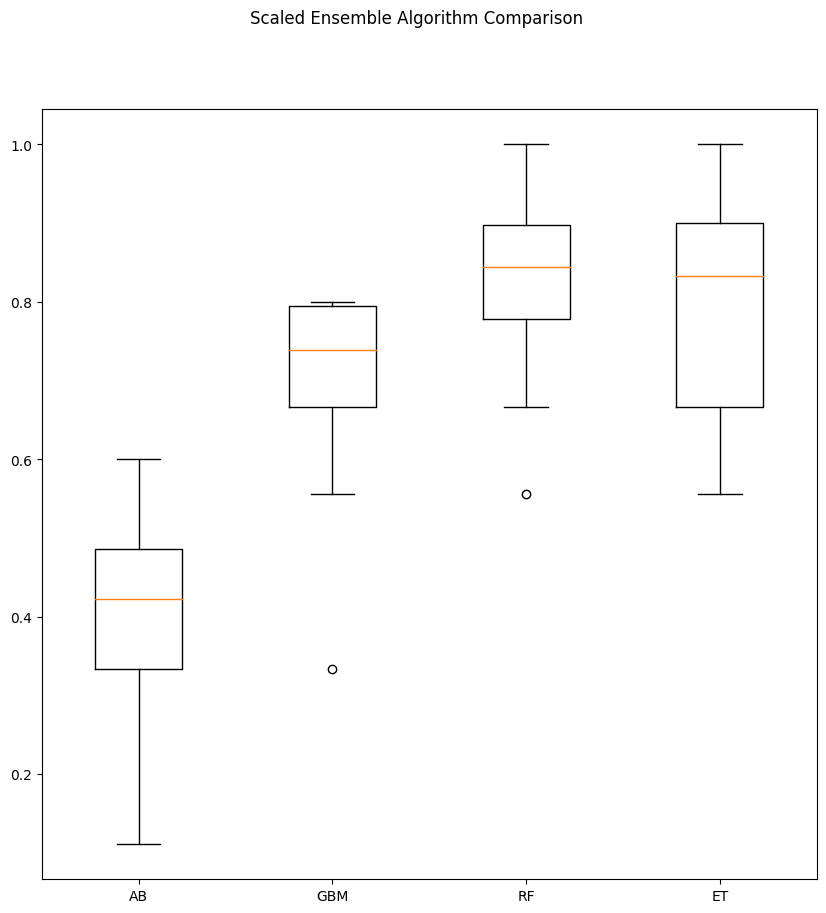

In [ ]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle("Scaled Ensemble Algorithm Comparison")
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

**RF - ET**


## Love


In [ ]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_lo, Y_train_lo, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.600000 (0.139971)
LDA: 0.814286 (0.143570)
KNN: 0.614286 (0.157143)
CART: 0.500000 (0.183503)
NB: 0.714286 (0.191663)
SVM: 0.714286 (0.169031)


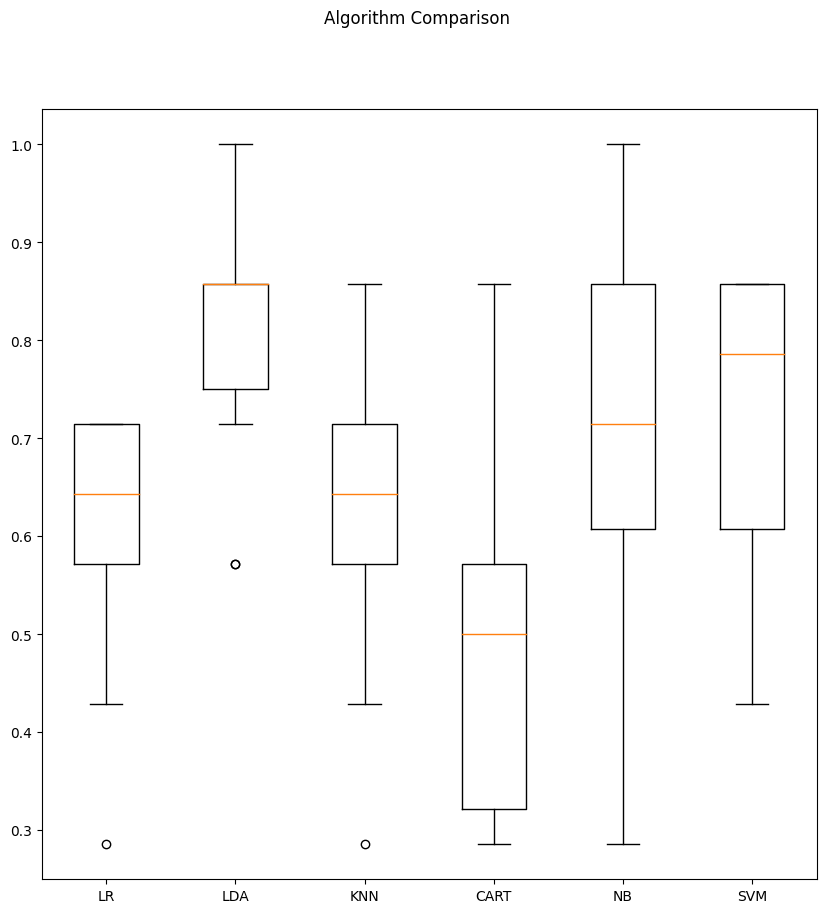

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
pipelines = []
pipelines.append(
    ("ScaledLR", Pipeline([("Scaler", StandardScaler()), ("LR", LogisticRegression())]))
)
pipelines.append(
    (
        "ScaledLDA",
        Pipeline([("Scaler", StandardScaler()), ("LDA", LinearDiscriminantAnalysis())]),
    )
)
pipelines.append(
    (
        "ScaledKNN",
        Pipeline([("Scaler", StandardScaler()), ("KNN", KNeighborsClassifier())]),
    )
)
pipelines.append(
    (
        "ScaledCART",
        Pipeline([("Scaler", StandardScaler()), ("CART", DecisionTreeClassifier())]),
    )
)
pipelines.append(
    ("ScaledNB", Pipeline([("Scaler", StandardScaler()), ("NB", GaussianNB())]))
)
pipelines.append(
    ("ScaledSVM", Pipeline([("Scaler", StandardScaler()), ("SVM", SVC())]))
)
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_lo, Y_train_lo, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.642857 (0.159719)
ScaledLDA: 0.814286 (0.143570)
ScaledKNN: 0.700000 (0.185714)
ScaledCART: 0.485714 (0.193781)
ScaledNB: 0.714286 (0.191663)
ScaledSVM: 0.742857 (0.269542)


**LDA - LR - SVM**


In [ ]:
ensembles = []
ensembles.append(("AB", AdaBoostClassifier()))
ensembles.append(("GBM", GradientBoostingClassifier()))
ensembles.append(("RF", RandomForestClassifier()))
ensembles.append(("ET", ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_lo, Y_train_lo, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.328571 (0.157143)
GBM: 0.514286 (0.171429)
RF: 0.671429 (0.169633)
ET: 0.671429 (0.169633)


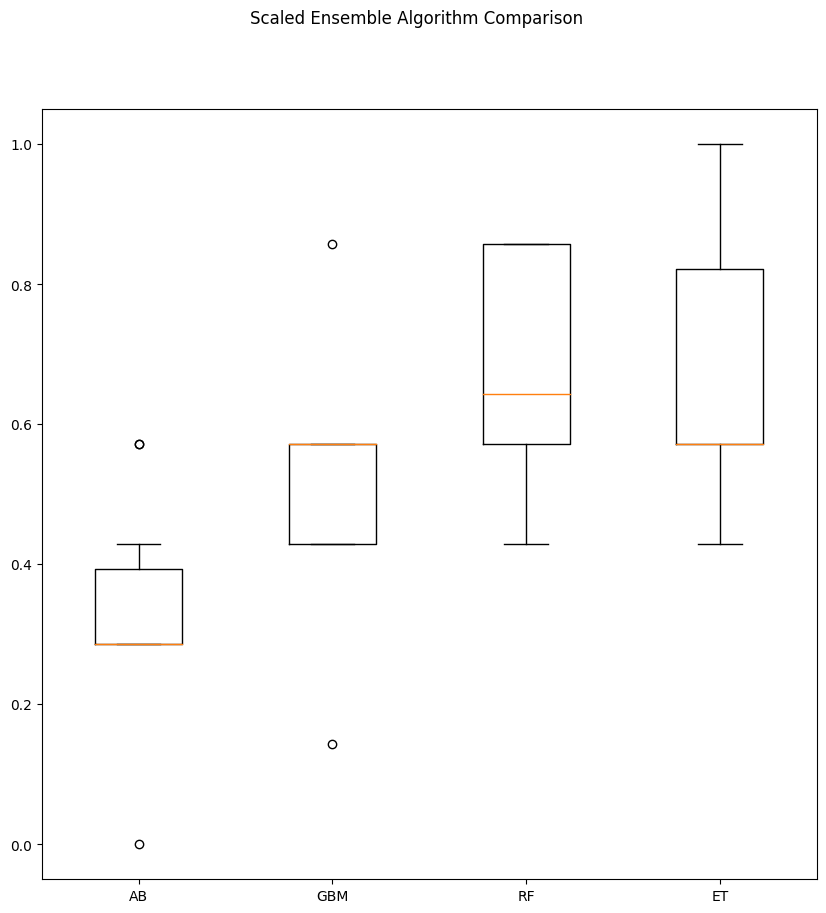

In [ ]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle("Scaled Ensemble Algorithm Comparison")
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

**RF - ET**


# Tuning Data


## Work


In [ ]:
scaler = StandardScaler().fit(X_train_wo)
rescaledX = scaler.transform(X_train_wo)

In [ ]:
# LDA
scaler = StandardScaler().fit(X_train_wo)
rescaledX = scaler.transform(X_train_wo)
shrinkage_values = [
    0.1,
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    0.9,
    0.05,
    0.25,
    0.15,
    0.35,
    0.45,
    0.55,
    0.65,
    0.75,
    0.85,
    0.95,
]
solver_values = ["svd", "lsqr", "eigen"]
param_grid = dict(shrinkage=shrinkage_values, solver=solver_values)
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_wo)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.924622 using {'shrinkage': 0.05, 'solver': 'lsqr'}
nan (nan) with: {'shrinkage': 0.1, 'solver': 'svd'}
0.918824 (0.033399) with: {'shrinkage': 0.1, 'solver': 'lsqr'}
0.918824 (0.033399) with: {'shrinkage': 0.1, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.2, 'solver': 'svd'}
0.910084 (0.034928) with: {'shrinkage': 0.2, 'solver': 'lsqr'}
0.910084 (0.034928) with: {'shrinkage': 0.2, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.3, 'solver': 'svd'}
0.904202 (0.038880) with: {'shrinkage': 0.3, 'solver': 'lsqr'}
0.904202 (0.038880) with: {'shrinkage': 0.3, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.4, 'solver': 'svd'}
0.901261 (0.034626) with: {'shrinkage': 0.4, 'solver': 'lsqr'}
0.901261 (0.034626) with: {'shrinkage': 0.4, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.5, 'solver': 'svd'}
0.892605 (0.042845) with: {'shrinkage': 0.5, 'solver': 'lsqr'}
0.892605 (0.042845) with: {'shrinkage': 0.5, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.6, 'solver': '

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
190 fits failed out of a total of 570.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
190 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 615, in fit
    raise NotImplementedError("shrinkage not supported with 'svd' solver.")
NotImplementedError: shrinkage not supported with 'svd' solver.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/l

In [ ]:
# LR
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
penalty = ["none", "elasticnet", "l1", "l2"]
C = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
param_grid = dict(solver=solver, penalty=penalty, C=C)
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_wo)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Best: 0.936218 using {'C': 1e-06, 'penalty': 'none', 'solver': 'newton-cg'}
0.936218 (0.024808) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'newton-cg'}
0.927479 (0.041189) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'lbfgs'}
nan (nan) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'liblinear'}
0.918824 (0.035896) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'sag'}
0.918824 (0.033399) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'saga'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'sag'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'saga'}
nan (nan) with: {'C': 1e-06, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (nan) with: {'C': 1e-06, 'penalty': 'l1', 'solver': 'lbfgs'}
0.162941 (0.040119) with: {'C': 1e-06, '

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
810 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting er

In [ ]:
# SVM
param_grid = {
    "C": [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000],
    "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
    "kernel": ["rbf"],
}
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_wo)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.947899 using {'C': 100000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.308067 (0.069914) with: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.456639 (0.070192) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.308067 (0.069914) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.308067 (0.069914) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.308067 (0.069914) with: {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.348992 (0.082541) with: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.854706 (0.046850) with: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.854790 (0.036469) with: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.308067 (0.069914) with: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.308067 (0.069914) with: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.357731 (0.081649) with: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.869580 (0.046287) with: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.927479 (0.043238) with: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.872017 (0.035464) with: {'C': 10, 'gamma': 0.001, '

In [ ]:
# ET
param_grid = dict(
    n_estimators=np.array([230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280])
)
model = ExtraTreesClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_wo)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.831597 using {'n_estimators': 260}
0.825546 (0.095280) with: {'n_estimators': 230}
0.828403 (0.093162) with: {'n_estimators': 235}
0.828487 (0.092872) with: {'n_estimators': 240}
0.822689 (0.098103) with: {'n_estimators': 245}
0.831513 (0.094634) with: {'n_estimators': 250}
0.828655 (0.098483) with: {'n_estimators': 255}
0.831597 (0.096213) with: {'n_estimators': 260}
0.831597 (0.096213) with: {'n_estimators': 265}
0.828655 (0.092288) with: {'n_estimators': 270}
0.828655 (0.095964) with: {'n_estimators': 275}
0.828739 (0.091889) with: {'n_estimators': 280}


In [ ]:
# RF
param_grid = dict(n_estimators=np.array([35, 40, 45, 55, 60, 65, 50, 48, 49, 51, 52]))
model = RandomForestClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_wo)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.799580 using {'n_estimators': 55}
0.796471 (0.034780) with: {'n_estimators': 35}
0.787899 (0.040824) with: {'n_estimators': 40}
0.787983 (0.042337) with: {'n_estimators': 45}
0.799580 (0.039130) with: {'n_estimators': 55}
0.793866 (0.048164) with: {'n_estimators': 60}
0.799412 (0.037778) with: {'n_estimators': 65}
0.788067 (0.043462) with: {'n_estimators': 50}
0.790924 (0.039501) with: {'n_estimators': 48}
0.793866 (0.036207) with: {'n_estimators': 49}
0.793950 (0.044103) with: {'n_estimators': 51}
0.796807 (0.041552) with: {'n_estimators': 52}


- **LDA: 'shrinkage': 0.05, 'solver': 'lsqr'**
- **LR: 'C': 1e-06, 'penalty': 'none', 'solver': 'newton-cg'**
- **SVM: 'C': 100000, 'gamma': 0.001, 'kernel': 'rbf'**
- **ET: 'n_estimators': 260**
- **RF: 'n_estimators': 55'**


## Study


In [ ]:
scaler = StandardScaler().fit(X_train_st)
rescaledX = scaler.transform(X_train_st)

In [ ]:
# LDA
shrinkage_values = [
    0.1,
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    0.9,
    0.05,
    0.25,
    0.15,
    0.35,
    0.45,
    0.75,
    0.85,
    0.95,
    0.04,
    0.03,
    0.02,
    0.01,
]
solver_values = ["svd", "lsqr", "eigen"]
param_grid = dict(shrinkage=shrinkage_values, solver=solver_values)
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_st)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.908498 using {'shrinkage': 0.05, 'solver': 'lsqr'}
nan (nan) with: {'shrinkage': 0.1, 'solver': 'svd'}
0.904926 (0.058776) with: {'shrinkage': 0.1, 'solver': 'lsqr'}
0.904926 (0.058776) with: {'shrinkage': 0.1, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.2, 'solver': 'svd'}
0.901478 (0.068243) with: {'shrinkage': 0.2, 'solver': 'lsqr'}
0.901478 (0.068243) with: {'shrinkage': 0.2, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.3, 'solver': 'svd'}
0.898030 (0.074588) with: {'shrinkage': 0.3, 'solver': 'lsqr'}
0.898030 (0.074588) with: {'shrinkage': 0.3, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.4, 'solver': 'svd'}
0.894581 (0.087674) with: {'shrinkage': 0.4, 'solver': 'lsqr'}
0.894581 (0.087674) with: {'shrinkage': 0.4, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.5, 'solver': 'svd'}
0.869951 (0.081307) with: {'shrinkage': 0.5, 'solver': 'lsqr'}
0.869951 (0.081307) with: {'shrinkage': 0.5, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.6, 'solver': '

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
210 fits failed out of a total of 630.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 615, in fit
    raise NotImplementedError("shrinkage not supported with 'svd' solver.")
NotImplementedError: shrinkage not supported with 'svd' solver.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/l

In [ ]:
# LR
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
penalty = ["none", "elasticnet", "l1", "l2"]
C = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 0.0000001, 0.00000001]
param_grid = dict(solver=solver, penalty=penalty, C=C)
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_st)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Best: 0.929310 using {'C': 1e-06, 'penalty': 'none', 'solver': 'newton-cg'}
0.929310 (0.031692) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'newton-cg'}
0.859113 (0.050864) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'lbfgs'}
nan (nan) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'liblinear'}
0.880172 (0.041388) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'sag'}
0.855419 (0.054894) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'saga'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'sag'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'saga'}
nan (nan) with: {'C': 1e-06, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (nan) with: {'C': 1e-06, 'penalty': 'l1', 'solver': 'lbfgs'}
0.172660 (0.049153) with: {'C': 1e-06, '

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
990 fits failed out of a total of 2200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 71, in _check_solver
    raise ValueError("penalty='none

In [ ]:
# SVM
param_grid = {
    "C": [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000],
    "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
    "kernel": ["rbf"],
}
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_st)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.940271 using {'C': 100000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.322291 (0.117392) with: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.389409 (0.143763) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.322291 (0.117392) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.322291 (0.117392) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.322291 (0.117392) with: {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.371921 (0.139701) with: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.816749 (0.065243) with: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.817241 (0.080646) with: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.322291 (0.117392) with: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.322291 (0.117392) with: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.375369 (0.135961) with: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.830665 (0.060418) with: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.862562 (0.035399) with: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.806527 (0.075243) with: {'C': 10, 'gamma': 0.001, '

In [ ]:
# ET
param_grid = dict(n_estimators=np.array([230, 150, 180, 200, 210, 220, 225]))
model = ExtraTreesClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_st)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.805419 using {'n_estimators': 210}
0.805296 (0.062649) with: {'n_estimators': 230}
0.798276 (0.062352) with: {'n_estimators': 150}
0.801724 (0.062646) with: {'n_estimators': 180}
0.787685 (0.051123) with: {'n_estimators': 200}
0.805419 (0.062549) with: {'n_estimators': 210}
0.798153 (0.064449) with: {'n_estimators': 220}
0.801724 (0.060576) with: {'n_estimators': 225}


In [ ]:
# RF
param_grid = dict(n_estimators=np.array([35, 40, 45, 55, 60, 65, 50, 48, 49, 51, 52]))
model = RandomForestClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_st)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.774138 using {'n_estimators': 40}
0.759975 (0.061637) with: {'n_estimators': 35}
0.774138 (0.064281) with: {'n_estimators': 40}
0.752956 (0.079504) with: {'n_estimators': 45}
0.759729 (0.060847) with: {'n_estimators': 55}
0.756034 (0.063036) with: {'n_estimators': 60}
0.763424 (0.064836) with: {'n_estimators': 65}
0.763177 (0.067451) with: {'n_estimators': 50}
0.756281 (0.063948) with: {'n_estimators': 48}
0.756281 (0.069302) with: {'n_estimators': 49}
0.759729 (0.070062) with: {'n_estimators': 51}
0.759729 (0.060847) with: {'n_estimators': 52}


- **LDA: 'shrinkage': 0.05, 'solver': 'lsqr'**
- **LR: 'C': 1e-06, 'penalty': 'none', 'solver': 'newton-cg'**
- **SVM: 'C': 100000, 'gamma': 0.0001, 'kernel': 'rbf'**
- **ET: 'n_estimators': 210**
- **RF: 'n_estimators': 40'**


## Self


In [ ]:
scaler = StandardScaler().fit(X_train_se)
rescaledX = scaler.transform(X_train_se)

In [ ]:
# LDA
shrinkage_values = [
    0.1,
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    0.9,
    0.05,
    0.25,
    0.15,
    0.35,
    0.45,
    0.55,
    0.65,
    0.75,
    0.85,
    0.95,
    0.06,
    0.07,
    0.04,
    0.03,
    0.02,
    0.01,
    0.009,
    0.008,
    0.007,
    0.006,
    0.005,
]
solver_values = ["svd", "lsqr", "eigen"]
param_grid = dict(shrinkage=shrinkage_values, solver=solver_values)
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_se)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.891486 using {'shrinkage': 0.01, 'solver': 'lsqr'}
nan (nan) with: {'shrinkage': 0.1, 'solver': 'svd'}
0.874094 (0.045724) with: {'shrinkage': 0.1, 'solver': 'lsqr'}
0.874094 (0.045724) with: {'shrinkage': 0.1, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.2, 'solver': 'svd'}
0.878442 (0.050986) with: {'shrinkage': 0.2, 'solver': 'lsqr'}
0.878442 (0.050986) with: {'shrinkage': 0.2, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.3, 'solver': 'svd'}
0.869746 (0.055285) with: {'shrinkage': 0.3, 'solver': 'lsqr'}
0.869746 (0.055285) with: {'shrinkage': 0.3, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.4, 'solver': 'svd'}
0.856703 (0.051980) with: {'shrinkage': 0.4, 'solver': 'lsqr'}
0.856703 (0.051980) with: {'shrinkage': 0.4, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.5, 'solver': 'svd'}
0.834964 (0.072538) with: {'shrinkage': 0.5, 'solver': 'lsqr'}
0.834964 (0.072538) with: {'shrinkage': 0.5, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.6, 'solver': '

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 615, in fit
    raise NotImplementedError("shrinkage not supported with 'svd' solver.")
NotImplementedError: shrinkage not supported with 'svd' solver.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/l

In [ ]:
# LR
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
penalty = ["none", "elasticnet", "l1", "l2"]
C = [
    0.000001,
    0.00001,
    0.0001,
    0.001,
    0.01,
    0.1,
    1,
    10,
    100,
    0.0000001,
    0.00000001,
    0.000000001,
]
param_grid = dict(solver=solver, penalty=penalty, C=C)
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_se)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Best: 0.909420 using {'C': 1e-06, 'penalty': 'none', 'solver': 'newton-cg'}
0.909420 (0.044108) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'newton-cg'}
0.879167 (0.089867) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'lbfgs'}
nan (nan) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'liblinear'}
0.878804 (0.060814) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'sag'}
0.865942 (0.062441) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'saga'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'sag'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'saga'}
nan (nan) with: {'C': 1e-06, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (nan) with: {'C': 1e-06, 'penalty': 'l1', 'solver': 'lbfgs'}
0.138587 (0.032722) with: {'C': 1e-06, '

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1080 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 71, in _check_solver
    raise ValueError("penalty='non

In [ ]:
# SVM
param_grid = {
    "C": [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000],
    "gamma": [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001],
    "kernel": ["rbf"],
}
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_se)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.943841 using {'C': 10000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.177536 (0.041152) with: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.493297 (0.065839) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.281159 (0.086521) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.186232 (0.055381) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.186232 (0.055381) with: {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.186232 (0.055381) with: {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.186232 (0.055381) with: {'C': 0.1, 'gamma': 1e-06, 'kernel': 'rbf'}
0.350000 (0.090394) with: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.831522 (0.089004) with: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.813768 (0.082752) with: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.307065 (0.090787) with: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.186232 (0.055381) with: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.186232 (0.055381) with: {'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.186232 (0.055381) with: {'C': 1, 'gamma': 1e

In [ ]:
# ET
param_grid = dict(
    n_estimators=np.array([230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280])
)
model = ExtraTreesClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_se)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.830978 using {'n_estimators': 250}
0.818116 (0.114779) with: {'n_estimators': 230}
0.818116 (0.104431) with: {'n_estimators': 235}
0.813768 (0.106699) with: {'n_estimators': 240}
0.817935 (0.116595) with: {'n_estimators': 245}
0.830978 (0.105733) with: {'n_estimators': 250}
0.826630 (0.116878) with: {'n_estimators': 255}
0.822464 (0.115817) with: {'n_estimators': 260}
0.826630 (0.116878) with: {'n_estimators': 265}
0.826630 (0.116878) with: {'n_estimators': 270}
0.822283 (0.116006) with: {'n_estimators': 275}
0.822283 (0.116006) with: {'n_estimators': 280}


In [ ]:
# RF
param_grid = dict(n_estimators=np.array([35, 40, 45, 55, 30, 25, 20, 33, 37]))
model = RandomForestClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_se)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.762500 using {'n_estimators': 35}
0.762500 (0.086958) with: {'n_estimators': 35}
0.762500 (0.093252) with: {'n_estimators': 40}
0.762500 (0.091202) with: {'n_estimators': 45}
0.744746 (0.087320) with: {'n_estimators': 55}
0.749457 (0.088387) with: {'n_estimators': 30}
0.753804 (0.090943) with: {'n_estimators': 25}
0.736232 (0.092980) with: {'n_estimators': 20}
0.749457 (0.084000) with: {'n_estimators': 33}
0.758152 (0.091176) with: {'n_estimators': 37}


- **LDA: 'shrinkage': 0.01, 'solver': 'lsqr'**
- **LR: 'C': 1e-06, 'penalty': 'none', 'solver': 'newton-cg'**
- **SVM: 'C': 10000, 'gamma': 0.0001, 'kernel': 'rbf'**
- **ET: 'n_estimators': 250**
- **RF: 'n_estimators': 35'**


## Family


In [ ]:
scaler = StandardScaler().fit(X_train_fa)
rescaledX = scaler.transform(X_train_fa)

In [ ]:
# LDA
shrinkage_values = [
    0.1,
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    0.9,
    0.05,
    0.25,
    0.15,
    0.35,
    0.45,
    0.55,
    0.65,
    0.75,
    0.85,
    0.95,
    0.06,
    0.07,
    0.04,
    0.03,
    0.02,
    0.01,
    0.009,
    0.008,
    0.007,
    0.006,
    0.005,
]
solver_values = ["svd", "lsqr", "eigen"]
param_grid = dict(shrinkage=shrinkage_values, solver=solver_values)
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_fa)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.890000 using {'shrinkage': 0.1, 'solver': 'lsqr'}
nan (nan) with: {'shrinkage': 0.1, 'solver': 'svd'}
0.890000 (0.086131) with: {'shrinkage': 0.1, 'solver': 'lsqr'}
0.890000 (0.086131) with: {'shrinkage': 0.1, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.2, 'solver': 'svd'}
0.890000 (0.086131) with: {'shrinkage': 0.2, 'solver': 'lsqr'}
0.890000 (0.086131) with: {'shrinkage': 0.2, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.3, 'solver': 'svd'}
0.890000 (0.086131) with: {'shrinkage': 0.3, 'solver': 'lsqr'}
0.890000 (0.086131) with: {'shrinkage': 0.3, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.4, 'solver': 'svd'}
0.890000 (0.086131) with: {'shrinkage': 0.4, 'solver': 'lsqr'}
0.890000 (0.086131) with: {'shrinkage': 0.4, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.5, 'solver': 'svd'}
0.870000 (0.081354) with: {'shrinkage': 0.5, 'solver': 'lsqr'}
0.870000 (0.081354) with: {'shrinkage': 0.5, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.6, 'solver': 's

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 615, in fit
    raise NotImplementedError("shrinkage not supported with 'svd' solver.")
NotImplementedError: shrinkage not supported with 'svd' solver.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/l

- **LDA: 'shrinkage': 0.1, 'solver': 'lsqr'**
- **LR: 'C': 1, 'penalty': 'l1', 'solver': 'saga'**
- **SVM: 'C': 1, 'gamma': 0.1, 'kernel': 'rbf'**
- **ET: 'n_estimators': 235**
- **RF: 'n_estimators': 37'**


In [ ]:
# LR
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
penalty = ["none", "elasticnet", "l1", "l2"]
C = [
    0.000001,
    0.00001,
    0.0001,
    0.001,
    0.01,
    0.1,
    1,
    10,
    100,
    0.0000001,
    0.00000001,
    0.000000001,
]
param_grid = dict(solver=solver, penalty=penalty, C=C)
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_fa)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Best: 0.795556 using {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
0.646667 (0.172118) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'newton-cg'}
0.637778 (0.134733) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'lbfgs'}
nan (nan) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'liblinear'}
0.658889 (0.162165) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'sag'}
0.657778 (0.183438) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'saga'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'sag'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'saga'}
nan (nan) with: {'C': 1e-06, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (nan) with: {'C': 1e-06, 'penalty': 'l1', 'solver': 'lbfgs'}
0.064444 (0.072487) with: {'C': 1e-06, 'penalty': '

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1080 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 71, in _check_solver
    raise ValueError("penalty='non

In [ ]:
# SVM
param_grid = {
    "C": [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000],
    "gamma": [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001],
    "kernel": ["rbf"],
}
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_fa)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.847778 using {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.283333 (0.140568) with: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.283333 (0.140568) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.283333 (0.140568) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.283333 (0.140568) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.283333 (0.140568) with: {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.283333 (0.140568) with: {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.283333 (0.140568) with: {'C': 0.1, 'gamma': 1e-06, 'kernel': 'rbf'}
0.283333 (0.140568) with: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.847778 (0.101111) with: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.721111 (0.187080) with: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.325556 (0.151213) with: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.283333 (0.140568) with: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.283333 (0.140568) with: {'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.283333 (0.140568) with: {'C': 1, 'gamma': 1e-06, 'k

In [ ]:
# ET
param_grid = dict(
    n_estimators=np.array([230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280])
)
model = ExtraTreesClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_fa)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.797778 using {'n_estimators': 235}
0.786667 (0.130128) with: {'n_estimators': 230}
0.797778 (0.142534) with: {'n_estimators': 235}
0.786667 (0.147891) with: {'n_estimators': 240}
0.786667 (0.130128) with: {'n_estimators': 245}
0.786667 (0.130128) with: {'n_estimators': 250}
0.786667 (0.130128) with: {'n_estimators': 255}
0.786667 (0.130128) with: {'n_estimators': 260}
0.786667 (0.130128) with: {'n_estimators': 265}
0.776667 (0.132539) with: {'n_estimators': 270}
0.786667 (0.130128) with: {'n_estimators': 275}
0.786667 (0.130128) with: {'n_estimators': 280}


In [ ]:
# RF
param_grid = dict(n_estimators=np.array([35, 40, 45, 55, 30, 25, 20, 33, 37]))
model = RandomForestClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_fa)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.755556 using {'n_estimators': 37}
0.744444 (0.098005) with: {'n_estimators': 35}
0.711111 (0.109432) with: {'n_estimators': 40}
0.722222 (0.145042) with: {'n_estimators': 45}
0.730000 (0.150477) with: {'n_estimators': 55}
0.723333 (0.126535) with: {'n_estimators': 30}
0.754444 (0.122570) with: {'n_estimators': 25}
0.690000 (0.176625) with: {'n_estimators': 20}
0.734444 (0.096922) with: {'n_estimators': 33}
0.755556 (0.092296) with: {'n_estimators': 37}


## Love


In [ ]:
scaler = StandardScaler().fit(X_train_lo)
rescaledX = scaler.transform(X_train_lo)

In [ ]:
# LDA
shrinkage_values = [
    0.1,
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    0.9,
    0.05,
    0.25,
    0.15,
    0.35,
    0.45,
    0.55,
    0.65,
    0.75,
    0.85,
    0.95,
    0.06,
    0.07,
    0.04,
    0.03,
    0.02,
    0.01,
    0.009,
    0.008,
    0.007,
    0.006,
    0.005,
]
solver_values = ["svd", "lsqr", "eigen"]
param_grid = dict(shrinkage=shrinkage_values, solver=solver_values)
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_lo)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.857143 using {'shrinkage': 0.2, 'solver': 'lsqr'}
nan (nan) with: {'shrinkage': 0.1, 'solver': 'svd'}
0.842857 (0.134771) with: {'shrinkage': 0.1, 'solver': 'lsqr'}
0.842857 (0.134771) with: {'shrinkage': 0.1, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.2, 'solver': 'svd'}
0.857143 (0.127775) with: {'shrinkage': 0.2, 'solver': 'lsqr'}
0.857143 (0.127775) with: {'shrinkage': 0.2, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.3, 'solver': 'svd'}
0.857143 (0.127775) with: {'shrinkage': 0.3, 'solver': 'lsqr'}
0.857143 (0.127775) with: {'shrinkage': 0.3, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.4, 'solver': 'svd'}
0.857143 (0.127775) with: {'shrinkage': 0.4, 'solver': 'lsqr'}
0.857143 (0.127775) with: {'shrinkage': 0.4, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.5, 'solver': 'svd'}
0.857143 (0.127775) with: {'shrinkage': 0.5, 'solver': 'lsqr'}
0.857143 (0.127775) with: {'shrinkage': 0.5, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.6, 'solver': 's

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 615, in fit
    raise NotImplementedError("shrinkage not supported with 'svd' solver.")
NotImplementedError: shrinkage not supported with 'svd' solver.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/l

In [ ]:
# LR
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
penalty = ["none", "elasticnet", "l1", "l2"]
C = [
    0.000001,
    0.00001,
    0.0001,
    0.001,
    0.01,
    0.1,
    1,
    10,
    100,
    0.0000001,
    0.00000001,
    0.000000001,
]
param_grid = dict(solver=solver, penalty=penalty, C=C)
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_lo)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Best: 0.700000 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.614286 (0.128571) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'newton-cg'}
0.628571 (0.257143) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'lbfgs'}
nan (nan) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'liblinear'}
0.628571 (0.193781) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'sag'}
0.628571 (0.193781) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'saga'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'sag'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'saga'}
nan (nan) with: {'C': 1e-06, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (nan) with: {'C': 1e-06, 'penalty': 'l1', 'solver': 'lbfgs'}
0.171429 (0.166599) with: {'C': 1e-06, 'pena

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1080 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 71, in _check_solver
    raise ValueError("penalty='non

In [ ]:
# SVM
param_grid = {
    "C": [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000],
    "gamma": [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001],
    "kernel": ["rbf"],
}
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_lo)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.842857 using {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.242857 (0.091473) with: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.285714 (0.127775) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.257143 (0.153862) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.257143 (0.153862) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.257143 (0.153862) with: {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.257143 (0.153862) with: {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.257143 (0.153862) with: {'C': 0.1, 'gamma': 1e-06, 'kernel': 'rbf'}
0.285714 (0.110657) with: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.714286 (0.255551) with: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.642857 (0.214286) with: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.257143 (0.153862) with: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.257143 (0.153862) with: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.257143 (0.153862) with: {'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.257143 (0.153862) with: {'C': 1, 'gamma': 1e-06,

In [ ]:
# ET
param_grid = dict(
    n_estimators=np.array([230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280])
)
model = ExtraTreesClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_lo)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.757143 using {'n_estimators': 235}
0.742857 (0.178429) with: {'n_estimators': 230}
0.757143 (0.157143) with: {'n_estimators': 235}
0.742857 (0.178429) with: {'n_estimators': 240}
0.742857 (0.178429) with: {'n_estimators': 245}
0.742857 (0.178429) with: {'n_estimators': 250}
0.742857 (0.178429) with: {'n_estimators': 255}
0.742857 (0.178429) with: {'n_estimators': 260}
0.742857 (0.178429) with: {'n_estimators': 265}
0.742857 (0.178429) with: {'n_estimators': 270}
0.742857 (0.178429) with: {'n_estimators': 275}
0.742857 (0.178429) with: {'n_estimators': 280}


In [ ]:
# RF
param_grid = dict(n_estimators=np.array([35, 40, 45, 55, 60, 57, 65, 63]))
model = RandomForestClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_lo)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.714286 using {'n_estimators': 57}
0.671429 (0.181265) with: {'n_estimators': 35}
0.685714 (0.166599) with: {'n_estimators': 40}
0.685714 (0.166599) with: {'n_estimators': 45}
0.700000 (0.149147) with: {'n_estimators': 55}
0.685714 (0.166599) with: {'n_estimators': 60}
0.714286 (0.127775) with: {'n_estimators': 57}
0.685714 (0.153862) with: {'n_estimators': 65}
0.685714 (0.166599) with: {'n_estimators': 63}


- **LDA: 'shrinkage': 0.2, 'solver': 'lsqr'**
- **LR: 'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'**
- **SVM: 'C': 100, 'gamma': 0.01, 'kernel': 'rbf'**
- **ET: 'n_estimators': 235**
- **RF: 'n_estimators': 57'**


# Data Fitting


## Work


In [ ]:
# LDA  'shrinkage': 0.05, 'solver': 'lsqr'
modelLDA = LinearDiscriminantAnalysis(shrinkage=0.05, solver="lsqr")
modelLDA.fit(X_train_wo, Y_train_wo)
predictions = modelLDA.predict(X_test_wo)

print(accuracy_score(Y_train_wo, modelLDA.predict(X_train_wo)))
print(accuracy_score(Y_test_wo, predictions))
print(confusion_matrix(Y_test_wo, predictions))
print(classification_report(Y_test_wo, predictions))

0.9680232558139535
0.9302325581395349
[[11  0  0  0  0]
 [ 1 31  0  0  0]
 [ 0  2 19  0  0]
 [ 0  0  1 12  0]
 [ 0  0  0  2  7]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.94      0.97      0.95        32
           2       0.95      0.90      0.93        21
           3       0.86      0.92      0.89        13
           4       1.00      0.78      0.88         9

    accuracy                           0.93        86
   macro avg       0.93      0.91      0.92        86
weighted avg       0.93      0.93      0.93        86



In [ ]:
# SVM 'C': 100000, 'gamma': 0.001, 'kernel': 'rbf'
modelSVM = SVC(C=100000, gamma=0.001, kernel="rbf")
modelSVM.fit(X_train_wo, Y_train_wo)
predictions = modelSVM.predict(X_test_wo)

print(accuracy_score(Y_train_wo, modelSVM.predict(X_train_wo)))
print(accuracy_score(Y_test_wo, predictions))
print(confusion_matrix(Y_test_wo, predictions))
print(classification_report(Y_test_wo, predictions))

1.0
0.9767441860465116
[[10  1  0  0  0]
 [ 0 32  0  0  0]
 [ 0  0 21  0  0]
 [ 0  0  1 12  0]
 [ 0  0  0  0  9]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.97      1.00      0.98        32
           2       0.95      1.00      0.98        21
           3       1.00      0.92      0.96        13
           4       1.00      1.00      1.00         9

    accuracy                           0.98        86
   macro avg       0.98      0.97      0.97        86
weighted avg       0.98      0.98      0.98        86



In [ ]:
# LG 'C': 1e-06, 'penalty': 'none', 'solver': 'newton-cg'
modelLG = LogisticRegression(C=1e-06, penalty="none", solver="newton-cg")
modelLG.fit(X_train_wo, Y_train_wo)
predictions = modelLG.predict(X_test_wo)

print(accuracy_score(Y_train_wo, modelLG.predict(X_train_wo)))
print(accuracy_score(Y_test_wo, predictions))
print(confusion_matrix(Y_test_wo, predictions))
print(classification_report(Y_test_wo, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


1.0
0.9651162790697675
[[ 9  2  0  0  0]
 [ 0 32  0  0  0]
 [ 0  0 21  0  0]
 [ 0  0  1 12  0]
 [ 0  0  0  0  9]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.94      1.00      0.97        32
           2       0.95      1.00      0.98        21
           3       1.00      0.92      0.96        13
           4       1.00      1.00      1.00         9

    accuracy                           0.97        86
   macro avg       0.98      0.95      0.96        86
weighted avg       0.97      0.97      0.96        86



In [ ]:
# ET 'n_estimators': 260
modelET = ExtraTreesClassifier(n_estimators=260)
modelET.fit(X_train_wo, Y_train_wo)
predictions = modelET.predict(X_test_wo)

print(accuracy_score(Y_train_wo, modelET.predict(X_train_wo)))
print(accuracy_score(Y_test_wo, predictions))
print(confusion_matrix(Y_test_wo, predictions))
print(classification_report(Y_test_wo, predictions))

1.0
0.8023255813953488
[[ 9  2  0  0  0]
 [ 3 28  1  0  0]
 [ 0  4 17  0  0]
 [ 0  0  4  9  0]
 [ 0  0  0  3  6]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.82      0.88      0.85        32
           2       0.77      0.81      0.79        21
           3       0.75      0.69      0.72        13
           4       1.00      0.67      0.80         9

    accuracy                           0.80        86
   macro avg       0.82      0.77      0.79        86
weighted avg       0.81      0.80      0.80        86



In [ ]:
# RF 'n_estimators': 55'
modelRF = RandomForestClassifier(n_estimators=55)
modelRF.fit(X_train_wo, Y_train_wo)
predictions = modelRF.predict(X_test_wo)

print(accuracy_score(Y_train_wo, modelRF.predict(X_train_wo)))
print(accuracy_score(Y_test_wo, predictions))
print(confusion_matrix(Y_test_wo, predictions))
print(classification_report(Y_test_wo, predictions))

1.0
0.813953488372093
[[ 8  3  0  0  0]
 [ 1 29  2  0  0]
 [ 0  3 18  0  0]
 [ 0  0  4  9  0]
 [ 0  0  0  3  6]]
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.83      0.91      0.87        32
           2       0.75      0.86      0.80        21
           3       0.75      0.69      0.72        13
           4       1.00      0.67      0.80         9

    accuracy                           0.81        86
   macro avg       0.84      0.77      0.80        86
weighted avg       0.82      0.81      0.81        86



## Study


In [ ]:
# LDA  'shrinkage': 0.05, 'solver': 'lsqr'
modelLDA = LinearDiscriminantAnalysis(shrinkage=0.05, solver="lsqr")
modelLDA.fit(X_train_st, Y_train_st)
predictions = modelLDA.predict(X_test_st)

print(accuracy_score(Y_train_st, modelLDA.predict(X_train_st)))
print(accuracy_score(Y_test_st, predictions))
print(confusion_matrix(Y_test_st, predictions))
print(classification_report(Y_test_st, predictions))

0.950530035335689
0.9577464788732394
[[10  0  0  0  0]
 [ 1 23  0  0  0]
 [ 0  1 20  0  0]
 [ 0  0  1  8  0]
 [ 0  0  0  0  7]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.96      0.96      0.96        24
           2       0.95      0.95      0.95        21
           3       1.00      0.89      0.94         9
           4       1.00      1.00      1.00         7

    accuracy                           0.96        71
   macro avg       0.96      0.96      0.96        71
weighted avg       0.96      0.96      0.96        71



In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create your LDA model with the desired parameters
modelLDA = LinearDiscriminantAnalysis(shrinkage=0.05, solver="lsqr")

# Combine your training and validation data for cross-validation
X_combined = np.vstack((X_train_st, X_test_st))
Y_combined = np.hstack((Y_train_st, Y_test_st))

# Define the number of folds for cross-validation
num_folds = 10

# Perform k-fold cross-validation to assess model performance
cv_scores = cross_val_score(modelLDA, X_combined, Y_combined, cv=num_folds)

# Print the accuracy scores for each fold
for fold, score in enumerate(cv_scores):
    print(f"Fold {fold + 1} Accuracy: {score:.2f}")
print(cv_scores.mean())

# Train the model on the full training data
modelLDA.fit(X_train_st, Y_train_st)

# Make predictions on the test data
predictions = modelLDA.predict(X_test_st)

# Print accuracy, confusion matrix, and classification report on the test data
print(f"Accuracy on Test Data: {accuracy_score(Y_test_st, predictions):.6f}")
print("Confusion Matrix:")
print(confusion_matrix(Y_test_st, predictions))
print("Classification Report:")
print(classification_report(Y_test_st, predictions))

Fold 1 Accuracy: 0.86
Fold 2 Accuracy: 0.92
Fold 3 Accuracy: 0.94
Fold 4 Accuracy: 0.89
Fold 5 Accuracy: 0.94
Fold 6 Accuracy: 0.91
Fold 7 Accuracy: 0.97
Fold 8 Accuracy: 0.89
Fold 9 Accuracy: 0.94
Fold 10 Accuracy: 0.97
0.9239682539682539
Accuracy on Test Data: 0.957746
Confusion Matrix:
[[10  0  0  0  0]
 [ 1 23  0  0  0]
 [ 0  1 20  0  0]
 [ 0  0  1  8  0]
 [ 0  0  0  0  7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.96      0.96      0.96        24
           2       0.95      0.95      0.95        21
           3       1.00      0.89      0.94         9
           4       1.00      1.00      1.00         7

    accuracy                           0.96        71
   macro avg       0.96      0.96      0.96        71
weighted avg       0.96      0.96      0.96        71



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

# Define the SVM model with the desired hyperparameters
modelSVM = SVC(C=100000, gamma=0.0001, kernel="rbf")

# Combine your training and validation data for cross-validation
X_combined = np.vstack((X_train_st, X_test_st))
Y_combined = np.hstack((Y_train_st, Y_test_st))

# Define the number of folds for cross-validation
num_folds = 10

# Perform k-fold cross-validation to assess model performance
cv_scores = cross_val_score(modelSVM, X_combined, Y_combined, cv=num_folds)

# Print the accuracy scores for each fold
for fold, score in enumerate(cv_scores):
    print(f"Fold {fold + 1} Accuracy: {score:.2f}")
print(cv_scores.mean())

# Train the model on the full training data
modelSVM.fit(X_train_st, Y_train_st)

# Make predictions on the test data
predictions = modelSVM.predict(X_test_st)

# Print accuracy, confusion matrix, and classification report on the test data
print(f"Accuracy on Test Data: {accuracy_score(Y_test_st, predictions):.10f}")
print("Confusion Matrix:")
print(confusion_matrix(Y_test_st, predictions))
print("Classification Report:")
print(classification_report(Y_test_st, predictions))

Fold 1 Accuracy: 0.97
Fold 2 Accuracy: 0.97
Fold 3 Accuracy: 0.94
Fold 4 Accuracy: 0.94
Fold 5 Accuracy: 0.97
Fold 6 Accuracy: 0.94
Fold 7 Accuracy: 1.00
Fold 8 Accuracy: 0.94
Fold 9 Accuracy: 0.97
Fold 10 Accuracy: 1.00
0.9661904761904762
Accuracy on Test Data: 0.9859154930
Confusion Matrix:
[[ 9  1  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 21  0  0]
 [ 0  0  0  9  0]
 [ 0  0  0  0  7]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.96      1.00      0.98        24
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         7

    accuracy                           0.99        71
   macro avg       0.99      0.98      0.99        71
weighted avg       0.99      0.99      0.99        71



In [ ]:
# SVM 'C': 100000, 'gamma': 0.0001, 'kernel': 'rbf'
modelSVM = SVC(C=100000, gamma=0.0001, kernel="rbf")
modelSVM.fit(X_train_st, Y_train_st)
predictions = modelSVM.predict(X_test_st)

print(accuracy_score(Y_train_st, modelSVM.predict(X_train_st)))
print(accuracy_score(Y_test_st, predictions))
print(confusion_matrix(Y_test_st, predictions))
print(classification_report(Y_test_st, predictions))

1.0
0.9859154929577465
[[ 9  1  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 21  0  0]
 [ 0  0  0  9  0]
 [ 0  0  0  0  7]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.96      1.00      0.98        24
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         7

    accuracy                           0.99        71
   macro avg       0.99      0.98      0.99        71
weighted avg       0.99      0.99      0.99        71



In [ ]:
# LG 'C': 1e-06, 'penalty': 'none', 'solver': 'newton-cg'
modelLG = LogisticRegression(C=1e-06, penalty="none", solver="newton-cg")
modelLG.fit(X_train_st, Y_train_st)
predictions = modelLG.predict(X_test_st)

print(accuracy_score(Y_train_st, modelLG.predict(X_train_st)))
print(accuracy_score(Y_test_st, predictions))
print(confusion_matrix(Y_test_st, predictions))
print(classification_report(Y_test_st, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


1.0
0.9859154929577465
[[ 9  1  0  0  0]
 [ 0 24  0  0  0]
 [ 0  0 21  0  0]
 [ 0  0  0  9  0]
 [ 0  0  0  0  7]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.96      1.00      0.98        24
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         7

    accuracy                           0.99        71
   macro avg       0.99      0.98      0.99        71
weighted avg       0.99      0.99      0.99        71



In [ ]:
# ET 'n_estimators': 210
modelET = ExtraTreesClassifier(n_estimators=210)
modelET.fit(X_train_st, Y_train_st)
predictions = modelET.predict(X_test_st)

print(accuracy_score(Y_train_st, modelET.predict(X_train_st)))
print(accuracy_score(Y_test_st, predictions))
print(confusion_matrix(Y_test_st, predictions))
print(classification_report(Y_test_st, predictions))

1.0
0.8450704225352113
[[10  0  0  0  0]
 [ 2 21  1  0  0]
 [ 0  2 17  2  0]
 [ 0  0  3  6  0]
 [ 0  0  0  1  6]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       0.91      0.88      0.89        24
           2       0.81      0.81      0.81        21
           3       0.67      0.67      0.67         9
           4       1.00      0.86      0.92         7

    accuracy                           0.85        71
   macro avg       0.84      0.84      0.84        71
weighted avg       0.85      0.85      0.85        71



In [ ]:
# RF 'n_estimators': 40'
modelRF = RandomForestClassifier(n_estimators=40)
modelRF.fit(X_train_st, Y_train_st)
predictions = modelRF.predict(X_test_st)

print(accuracy_score(Y_train_st, modelRF.predict(X_train_st)))
print(accuracy_score(Y_test_st, predictions))
print(confusion_matrix(Y_test_st, predictions))
print(classification_report(Y_test_st, predictions))

1.0
0.8028169014084507
[[10  0  0  0  0]
 [ 2 19  3  0  0]
 [ 0  2 19  0  0]
 [ 0  0  4  5  0]
 [ 0  0  0  3  4]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       0.90      0.79      0.84        24
           2       0.73      0.90      0.81        21
           3       0.62      0.56      0.59         9
           4       1.00      0.57      0.73         7

    accuracy                           0.80        71
   macro avg       0.82      0.76      0.78        71
weighted avg       0.82      0.80      0.80        71



## Self


In [ ]:
# LDA  'shrinkage': 0.01, 'solver': 'lsqr'
modelLDA = LinearDiscriminantAnalysis(shrinkage=0.01, solver="lsqr")
modelLDA.fit(X_train_se, Y_train_se)
predictions = modelLDA.predict(X_test_se)

print(accuracy_score(Y_train_se, modelLDA.predict(X_train_se)))
print(accuracy_score(Y_test_se, predictions))
print(confusion_matrix(Y_test_se, predictions))
print(classification_report(Y_test_se, predictions))

0.9567099567099567
0.8793103448275862
[[ 6  0  0  0  0]
 [ 0 10  2  0  0]
 [ 0  0 10  3  0]
 [ 0  0  1 13  0]
 [ 0  0  0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.83      0.91        12
           2       0.77      0.77      0.77        13
           3       0.76      0.93      0.84        14
           4       1.00      0.92      0.96        13

    accuracy                           0.88        58
   macro avg       0.91      0.89      0.90        58
weighted avg       0.89      0.88      0.88        58



In [ ]:
# SVM 'C': 10000, 'gamma': 0.0001, 'kernel': 'rbf'
modelSVM = SVC(C=10000, gamma=0.0001, kernel="rbf")
modelSVM.fit(X_train_se, Y_train_se)
predictions = modelSVM.predict(X_test_se)

print(accuracy_score(Y_train_se, modelSVM.predict(X_train_se)))
print(accuracy_score(Y_test_se, predictions))
print(confusion_matrix(Y_test_se, predictions))
print(classification_report(Y_test_se, predictions))

1.0
0.9482758620689655
[[ 6  0  0  0  0]
 [ 0 11  1  0  0]
 [ 0  0 12  1  0]
 [ 0  0  1 13  0]
 [ 0  0  0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.92      0.96        12
           2       0.86      0.92      0.89        13
           3       0.93      0.93      0.93        14
           4       1.00      1.00      1.00        13

    accuracy                           0.95        58
   macro avg       0.96      0.95      0.95        58
weighted avg       0.95      0.95      0.95        58



In [ ]:
# LG 'C': 1e-06, 'penalty': 'none', 'solver': 'newton-cg'
modelLG = LogisticRegression(C=1e-06, penalty="none", solver="newton-cg")
modelLG.fit(X_train_se, Y_train_se)
predictions = modelLG.predict(X_test_se)

print(accuracy_score(Y_train_se, modelLG.predict(X_train_se)))
print(accuracy_score(Y_test_se, predictions))
print(confusion_matrix(Y_test_se, predictions))
print(classification_report(Y_test_se, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


1.0
0.8793103448275862
[[ 6  0  0  0  0]
 [ 0 10  2  0  0]
 [ 0  0 11  2  0]
 [ 0  0  1 12  1]
 [ 0  0  0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.83      0.91        12
           2       0.79      0.85      0.81        13
           3       0.80      0.86      0.83        14
           4       0.92      0.92      0.92        13

    accuracy                           0.88        58
   macro avg       0.90      0.89      0.89        58
weighted avg       0.89      0.88      0.88        58



In [ ]:
# ET 'n_estimators': 250
modelET = ExtraTreesClassifier(n_estimators=250)
modelET.fit(X_train_se, Y_train_se)
predictions = modelET.predict(X_test_se)

print(accuracy_score(Y_train_se, modelET.predict(X_train_se)))
print(accuracy_score(Y_test_se, predictions))
print(confusion_matrix(Y_test_se, predictions))
print(classification_report(Y_test_se, predictions))

1.0
0.8448275862068966
[[ 6  0  0  0  0]
 [ 0 10  2  0  0]
 [ 0  0 10  3  0]
 [ 0  0  1 11  2]
 [ 0  0  0  1 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.83      0.91        12
           2       0.77      0.77      0.77        13
           3       0.73      0.79      0.76        14
           4       0.86      0.92      0.89        13

    accuracy                           0.84        58
   macro avg       0.87      0.86      0.87        58
weighted avg       0.85      0.84      0.85        58



In [ ]:
# RF 'n_estimators': 35'
modelRF = RandomForestClassifier(n_estimators=35)
modelRF.fit(X_train_se, Y_train_se)
predictions = modelRF.predict(X_test_se)

print(accuracy_score(Y_train_se, modelRF.predict(X_train_se)))
print(accuracy_score(Y_test_se, predictions))
print(confusion_matrix(Y_test_se, predictions))
print(classification_report(Y_test_se, predictions))

1.0
0.8275862068965517
[[ 6  0  0  0  0]
 [ 1  9  2  0  0]
 [ 0  1 11  1  0]
 [ 0  0  1 12  1]
 [ 0  0  0  3 10]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.90      0.75      0.82        12
           2       0.79      0.85      0.81        13
           3       0.75      0.86      0.80        14
           4       0.91      0.77      0.83        13

    accuracy                           0.83        58
   macro avg       0.84      0.84      0.84        58
weighted avg       0.84      0.83      0.83        58



## Family


In [ ]:
# LDA  'shrinkage': 0.5, 'solver': 'lsqr'
modelLDA = LinearDiscriminantAnalysis(shrinkage=0.1, solver="lsqr")
modelLDA.fit(X_train_fa, Y_train_fa)
predictions = modelLDA.predict(X_test_fa)

print(accuracy_score(Y_train_fa, modelLDA.predict(X_train_fa)))
print(accuracy_score(Y_test_fa, predictions))
print(confusion_matrix(Y_test_fa, predictions))
print(classification_report(Y_test_fa, predictions))

0.9468085106382979
0.9583333333333334
[[2 0 0 0 0]
 [0 4 0 0 0]
 [0 1 7 0 0]
 [0 0 0 4 0]
 [0 0 0 0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.80      1.00      0.89         4
           2       1.00      0.88      0.93         8
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         6

    accuracy                           0.96        24
   macro avg       0.96      0.97      0.96        24
weighted avg       0.97      0.96      0.96        24



In [ ]:
# SVM 'C': 10, 'gamma': 0.1, 'kernel': 'rbf'
modelSVM = SVC(C=1, gamma=0.1, kernel="rbf")
modelSVM.fit(X_train_fa, Y_train_fa)
predictions = modelSVM.predict(X_test_fa)

print(accuracy_score(Y_train_fa, modelSVM.predict(X_train_fa)))
print(accuracy_score(Y_test_fa, predictions))
print(confusion_matrix(Y_test_fa, predictions))
print(classification_report(Y_test_fa, predictions))

1.0
0.625
[[0 2 0 0 0]
 [0 4 0 0 0]
 [0 4 2 2 0]
 [0 0 0 4 0]
 [0 0 0 1 5]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.40      1.00      0.57         4
           2       1.00      0.25      0.40         8
           3       0.57      1.00      0.73         4
           4       1.00      0.83      0.91         6

    accuracy                           0.62        24
   macro avg       0.59      0.62      0.52        24
weighted avg       0.75      0.62      0.58        24



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# LG 'C': 1, 'penalty': 'l1', 'solver': 'saga'
modelLG = LogisticRegression(C=1, penalty="l1", solver="saga")
modelLG.fit(X_train_fa, Y_train_fa)
predictions = modelLG.predict(X_test_fa)

print(accuracy_score(Y_train_fa, modelLG.predict(X_train_fa)))
print(accuracy_score(Y_test_fa, predictions))
print(confusion_matrix(Y_test_fa, predictions))
print(classification_report(Y_test_fa, predictions))

0.8404255319148937
0.7083333333333334
[[1 1 0 0 0]
 [0 3 1 0 0]
 [0 0 6 1 1]
 [0 0 0 2 2]
 [0 0 0 1 5]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.75      0.75      0.75         4
           2       0.86      0.75      0.80         8
           3       0.50      0.50      0.50         4
           4       0.62      0.83      0.71         6

    accuracy                           0.71        24
   macro avg       0.75      0.67      0.69        24
weighted avg       0.73      0.71      0.71        24



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# ET 'n_estimators': 245
modelET = ExtraTreesClassifier(n_estimators=235)
modelET.fit(X_train_fa, Y_train_fa)
predictions = modelET.predict(X_test_fa)

print(accuracy_score(Y_train_fa, modelET.predict(X_train_fa)))
print(accuracy_score(Y_test_fa, predictions))
print(confusion_matrix(Y_test_fa, predictions))
print(classification_report(Y_test_fa, predictions))

1.0
0.875
[[2 0 0 0 0]
 [0 4 0 0 0]
 [0 2 5 1 0]
 [0 0 0 4 0]
 [0 0 0 0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.67      1.00      0.80         4
           2       1.00      0.62      0.77         8
           3       0.80      1.00      0.89         4
           4       1.00      1.00      1.00         6

    accuracy                           0.88        24
   macro avg       0.89      0.93      0.89        24
weighted avg       0.91      0.88      0.87        24



In [ ]:
# RF 'n_estimators': 25'
modelRF = RandomForestClassifier(n_estimators=37)
modelRF.fit(X_train_fa, Y_train_fa)
predictions = modelRF.predict(X_test_fa)

print(accuracy_score(Y_train_fa, modelRF.predict(X_train_fa)))
print(accuracy_score(Y_test_fa, predictions))
print(confusion_matrix(Y_test_fa, predictions))
print(classification_report(Y_test_fa, predictions))

1.0
0.75
[[1 1 0 0 0]
 [0 3 1 0 0]
 [0 2 5 1 0]
 [0 0 0 4 0]
 [0 0 0 1 5]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      0.75      0.60         4
           2       0.83      0.62      0.71         8
           3       0.67      1.00      0.80         4
           4       1.00      0.83      0.91         6

    accuracy                           0.75        24
   macro avg       0.80      0.74      0.74        24
weighted avg       0.81      0.75      0.75        24



- **LDA: 'shrinkage': 0.1, 'solver': 'lsqr'**
- **LR: 'C': 1, 'penalty': 'l1', 'solver': 'saga'**
- **SVM: 'C': 1, 'gamma': 0.1, 'kernel': 'rbf'**
- **ET: 'n_estimators': 235**
- **RF: 'n_estimators': 37'**


## Love


In [ ]:
# LDA  'shrinkage': 0.2, 'solver': 'lsqr'
modelLDA = LinearDiscriminantAnalysis(shrinkage=0.2, solver="lsqr")
modelLDA.fit(X_train_lo, Y_train_lo)
predictions = modelLDA.predict(X_test_lo)

print(accuracy_score(Y_train_lo, modelLDA.predict(X_train_lo)))
print(accuracy_score(Y_test_lo, predictions))
print(confusion_matrix(Y_test_lo, predictions))
print(classification_report(Y_test_lo, predictions))

0.9428571428571428
0.6666666666666666
[[1 0 0 0 0]
 [1 2 3 0 0]
 [0 1 6 0 0]
 [0 0 1 2 0]
 [0 0 0 0 1]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.67      0.33      0.44         6
           2       0.60      0.86      0.71         7
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         1

    accuracy                           0.67        18
   macro avg       0.75      0.77      0.72        18
weighted avg       0.71      0.67      0.65        18



In [ ]:
# SVM  'C': 100, 'gamma': 0.01, 'kernel': 'rbf'
modelSVM = SVC(C=100, gamma=0.01, kernel="rbf")
modelSVM.fit(X_train_lo, Y_train_lo)
predictions = modelSVM.predict(X_test_lo)

print(accuracy_score(Y_train_lo, modelSVM.predict(X_train_lo)))
print(accuracy_score(Y_test_lo, predictions))
print(confusion_matrix(Y_test_lo, predictions))
print(classification_report(Y_test_lo, predictions))

1.0
0.9444444444444444
[[1 0 0 0 0]
 [1 5 0 0 0]
 [0 0 7 0 0]
 [0 0 0 3 0]
 [0 0 0 0 1]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1

    accuracy                           0.94        18
   macro avg       0.90      0.97      0.92        18
weighted avg       0.97      0.94      0.95        18



In [ ]:
# LG 'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'
modelLG = LogisticRegression(C=100, penalty="l2", solver="newton-cg")
modelLG.fit(X_train_lo, Y_train_lo)
predictions = modelLG.predict(X_test_lo)

print(accuracy_score(Y_train_lo, modelLG.predict(X_train_lo)))
print(accuracy_score(Y_test_lo, predictions))
print(confusion_matrix(Y_test_lo, predictions))
print(classification_report(Y_test_lo, predictions))

1.0
0.7777777777777778
[[1 0 0 0 0]
 [1 3 2 0 0]
 [0 0 6 1 0]
 [0 0 0 3 0]
 [0 0 0 0 1]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         6
           2       0.75      0.86      0.80         7
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         1

    accuracy                           0.78        18
   macro avg       0.80      0.87      0.80        18
weighted avg       0.83      0.78      0.77        18



In [ ]:
# ET 'n_estimators': 235
modelET = ExtraTreesClassifier(n_estimators=235)
modelET.fit(X_train_lo, Y_train_lo)
predictions = modelET.predict(X_test_lo)

print(accuracy_score(Y_train_lo, modelET.predict(X_train_lo)))
print(accuracy_score(Y_test_lo, predictions))
print(confusion_matrix(Y_test_lo, predictions))
print(classification_report(Y_test_lo, predictions))

1.0
0.6666666666666666
[[1 0 0 0 0]
 [1 4 1 0 0]
 [0 1 6 0 0]
 [0 0 0 0 3]
 [0 0 0 0 1]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.80      0.67      0.73         6
           2       0.86      0.86      0.86         7
           3       0.00      0.00      0.00         3
           4       0.25      1.00      0.40         1

    accuracy                           0.67        18
   macro avg       0.48      0.70      0.53        18
weighted avg       0.64      0.67      0.64        18



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- **LDA: 'shrinkage': 0.2, 'solver': 'lsqr'**
- **LR: 'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'**
- **SVM: 'C': 100, 'gamma': 0.01, 'kernel': 'rbf'**
- **ET: 'n_estimators': 235**
- **RF: 'n_estimators': 57'**


In [ ]:
# RF 'n_estimators': 57'
modelRF = RandomForestClassifier(n_estimators=57)
modelRF.fit(X_train_lo, Y_train_lo)
predictions = modelRF.predict(X_test_lo)

print(accuracy_score(Y_train_lo, modelRF.predict(X_train_lo)))
print(accuracy_score(Y_test_lo, predictions))
print(confusion_matrix(Y_test_lo, predictions))
print(classification_report(Y_test_lo, predictions))

1.0
0.6666666666666666
[[1 0 0 0 0]
 [1 3 2 0 0]
 [0 1 6 0 0]
 [0 0 0 1 2]
 [0 0 0 0 1]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.75      0.50      0.60         6
           2       0.75      0.86      0.80         7
           3       1.00      0.33      0.50         3
           4       0.33      1.00      0.50         1

    accuracy                           0.67        18
   macro avg       0.67      0.74      0.61        18
weighted avg       0.75      0.67      0.66        18



# Apply Model


In [ ]:
# Work
wo_test = pd.read_excel("/content/work_test.xlsx")
# Fill null value with the most popular value.
wo_test = wo_test.apply(lambda x: x.fillna(x.value_counts().index[0]))

# Study
st_test = pd.read_excel("/content/study_test.xlsx")
st_test = st_test.apply(lambda x: x.fillna(x.value_counts().index[0]))

# Self
se_test = pd.read_excel("/content/self_test.xlsx")
se_test = se_test.apply(lambda x: x.fillna(x.value_counts().index[0]))

# Family
fa_test = pd.read_excel("/content/family_test.xlsx")
fa_test = fa_test.apply(lambda x: x.fillna(x.value_counts().index[0]))

# Love
lo_test = pd.read_excel("/content/love_test.xlsx")
lo_test = lo_test.apply(lambda x: x.fillna(x.value_counts().index[0]))

## Work


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_wo_test = wo_test[
    [
        "a2",
        "a3",
        "a4",
        "b10",
        "b14",
        "b15",
        "c1",
        "c2",
        "c3",
        "c4",
        "c5",
        "c6",
        "c7",
        "c8",
        "c9",
    ]
]
Y_wo_test = wo_test["Level"]

0.9375
[[ 6  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  2  6  0]
 [ 0  0  0  1  2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        19
           2       0.86      1.00      0.92        12
           3       0.86      0.75      0.80         8
           4       1.00      0.67      0.80         3

    accuracy                           0.94        48
   macro avg       0.94      0.88      0.90        48
weighted avg       0.94      0.94      0.93        48



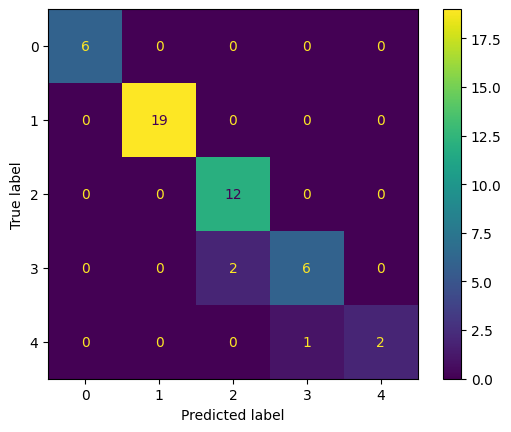

In [ ]:
# LDA  'shrinkage': 0.05, 'solver': 'lsqr'
modelLDA = LinearDiscriminantAnalysis(shrinkage=0.05, solver="lsqr")
modelLDA.fit(X_train_wo, Y_train_wo)
predictions = modelLDA.predict(X_wo_test)

print(accuracy_score(Y_wo_test, predictions))
print(confusion_matrix(Y_wo_test, predictions))
print(classification_report(Y_wo_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_wo_test, predictions),
    display_labels=modelLDA.classes_,
)
t = disp.plot()
plt.show()

0.9791666666666666
[[ 6  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  1  7  0]
 [ 0  0  0  0  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        19
           2       0.92      1.00      0.96        12
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00         3

    accuracy                           0.98        48
   macro avg       0.98      0.97      0.98        48
weighted avg       0.98      0.98      0.98        48



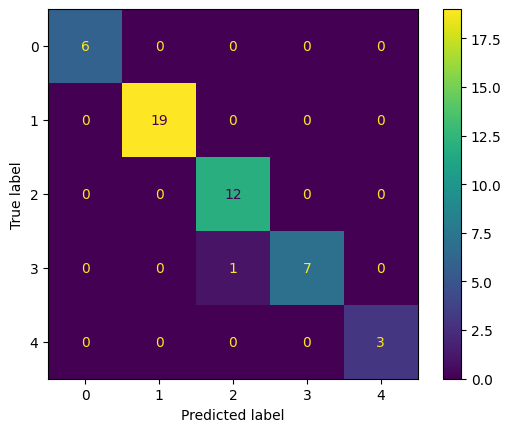

In [ ]:
# SVM 'C': 100000, 'gamma': 0.001, 'kernel': 'rbf'
modelSVM = SVC(C=100000, gamma=0.001, kernel="rbf")
modelSVM.fit(X_train_wo, Y_train_wo)
predictions = modelSVM.predict(X_wo_test)

print(accuracy_score(Y_wo_test, predictions))
print(confusion_matrix(Y_wo_test, predictions))
print(classification_report(Y_wo_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_wo_test, predictions),
    display_labels=modelSVM.classes_,
)
t = disp.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


0.9791666666666666
[[ 6  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  1  7  0]
 [ 0  0  0  0  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        19
           2       0.92      1.00      0.96        12
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00         3

    accuracy                           0.98        48
   macro avg       0.98      0.97      0.98        48
weighted avg       0.98      0.98      0.98        48



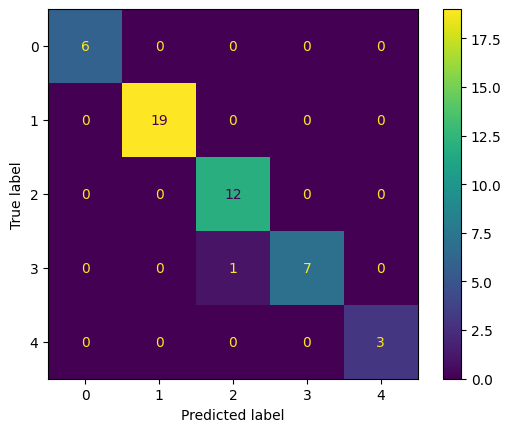

In [ ]:
# LG 'C': 1e-06, 'penalty': 'none', 'solver': 'newton-cg'
modelLG = LogisticRegression(C=1e-06, penalty="none", solver="newton-cg")
modelLG.fit(X_train_wo, Y_train_wo)
predictions = modelLG.predict(X_wo_test)

print(accuracy_score(Y_wo_test, predictions))
print(confusion_matrix(Y_wo_test, predictions))
print(classification_report(Y_wo_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_wo_test, predictions),
    display_labels=modelLG.classes_,
)
t = disp.plot()
plt.show()

0.875
[[ 6  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  1 11  0  0]
 [ 0  0  3  5  0]
 [ 0  0  0  2  1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.95      1.00      0.97        19
           2       0.79      0.92      0.85        12
           3       0.71      0.62      0.67         8
           4       1.00      0.33      0.50         3

    accuracy                           0.88        48
   macro avg       0.89      0.78      0.80        48
weighted avg       0.88      0.88      0.86        48



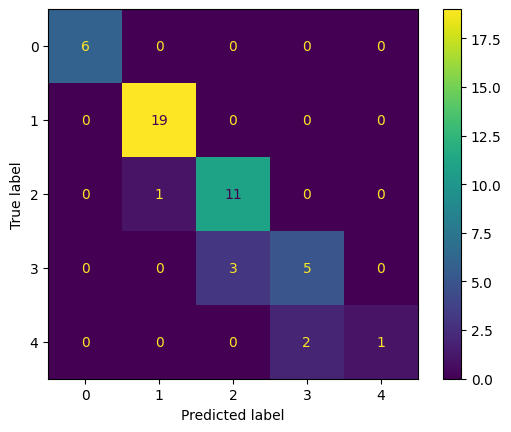

In [ ]:
# ET 'n_estimators': 260
modelET = ExtraTreesClassifier(n_estimators=260)
modelET.fit(X_train_wo, Y_train_wo)
predictions = modelET.predict(X_wo_test)

print(accuracy_score(Y_wo_test, predictions))
print(confusion_matrix(Y_wo_test, predictions))
print(classification_report(Y_wo_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_wo_test, predictions),
    display_labels=modelET.classes_,
)
t = disp.plot()
plt.show()

0.875
[[ 6  0  0  0  0]
 [ 0 19  0  0  0]
 [ 0  1 11  0  0]
 [ 0  0  4  4  0]
 [ 0  0  0  1  2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.95      1.00      0.97        19
           2       0.73      0.92      0.81        12
           3       0.80      0.50      0.62         8
           4       1.00      0.67      0.80         3

    accuracy                           0.88        48
   macro avg       0.90      0.82      0.84        48
weighted avg       0.88      0.88      0.87        48



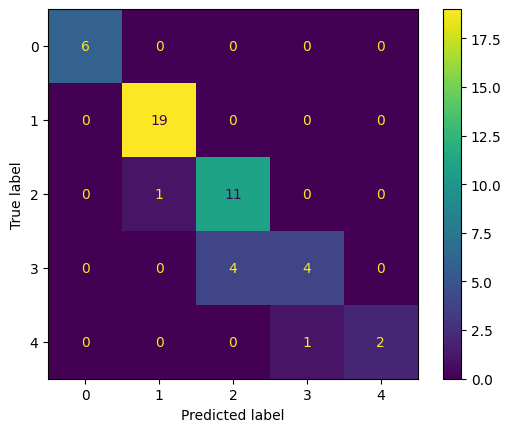

In [ ]:
# RF 'n_estimators': 55'
modelRF = RandomForestClassifier(n_estimators=55)
modelRF.fit(X_train_wo, Y_train_wo)
predictions = modelRF.predict(X_wo_test)

print(accuracy_score(Y_wo_test, predictions))
print(confusion_matrix(Y_wo_test, predictions))
print(classification_report(Y_wo_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_wo_test, predictions),
    display_labels=modelRF.classes_,
)
t = disp.plot()
plt.show()

## Study


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_st_test = st_test[
    [
        "b3",
        "b4",
        "b10",
        "b11",
        "b13",
        "b15",
        "c1",
        "c2",
        "c3",
        "c4",
        "c5",
        "c6",
        "c7",
        "c8",
        "c9",
    ]
]
Y_st_test = st_test["Level"]

0.9743589743589743
[[ 5  0  0  0  0]
 [ 0 14  0  0  0]
 [ 0  1  9  0  0]
 [ 0  0  0  8  0]
 [ 0  0  0  0  2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

    accuracy                           0.97        39
   macro avg       0.99      0.98      0.98        39
weighted avg       0.98      0.97      0.97        39



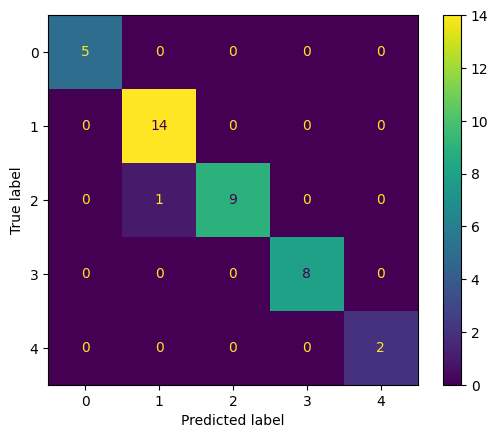

In [ ]:
# LDA  'shrinkage': 0.05, 'solver': 'lsqr'
modelLDA = LinearDiscriminantAnalysis(shrinkage=0.05, solver="lsqr")
modelLDA.fit(X_train_st, Y_train_st)
predictions = modelLDA.predict(X_st_test)

print(accuracy_score(Y_st_test, predictions))
print(confusion_matrix(Y_st_test, predictions))
print(classification_report(Y_st_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_st_test, predictions),
    display_labels=modelLDA.classes_,
)
t = disp.plot()
plt.show()

Fold 1 Accuracy: 0.97
Fold 2 Accuracy: 0.97
Fold 3 Accuracy: 0.94
Fold 4 Accuracy: 0.94
Fold 5 Accuracy: 0.97
Fold 6 Accuracy: 0.94
Fold 7 Accuracy: 1.00
Fold 8 Accuracy: 0.94
Fold 9 Accuracy: 0.97
Fold 10 Accuracy: 1.00
0.9661904761904762
Accuracy on Test Data: 0.974359
Confusion Matrix:
[[ 5  0  0  0  0]
 [ 0 14  0  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0  7  1]
 [ 0  0  0  0  2]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10
           3       1.00      0.88      0.93         8
           4       0.67      1.00      0.80         2

    accuracy                           0.97        39
   macro avg       0.93      0.97      0.95        39
weighted avg       0.98      0.97      0.98        39



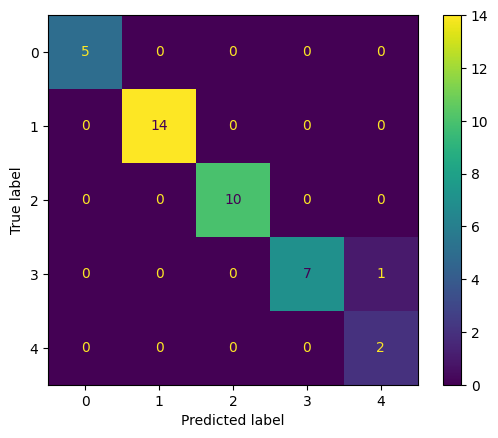

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create your LDA model with the desired parameters
modelSVM = SVC(C=100000, gamma=0.0001, kernel="rbf")

# Combine your training and validation data for cross-validation
X_combined = np.vstack((X_train_st, X_test_st))
Y_combined = np.hstack((Y_train_st, Y_test_st))

# Define the number of folds for cross-validation
num_folds = 10

# Perform k-fold cross-validation to assess model performance
cv_scores = cross_val_score(modelSVM, X_combined, Y_combined, cv=num_folds)

# Print the accuracy scores for each fold
for fold, score in enumerate(cv_scores):
    print(f"Fold {fold + 1} Accuracy: {score:.2f}")
print(cv_scores.mean())

# Train the model on the full training data
modelSVM.fit(X_train_st, Y_train_st)

# Make predictions on the test data
predictions = modelSVM.predict(X_st_test)

# Print accuracy, confusion matrix, and classification report on the test data
print(f"Accuracy on Test Data: {accuracy_score(Y_st_test, predictions):.6f}")
print("Confusion Matrix:")
print(confusion_matrix(Y_st_test, predictions))
print("Classification Report:")
print(classification_report(Y_st_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_st_test, predictions),
    display_labels=modelSVM.classes_,
)
t = disp.plot()
plt.show()

0.9743589743589743
[[ 5  0  0  0  0]
 [ 0 14  0  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0  7  1]
 [ 0  0  0  0  2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10
           3       1.00      0.88      0.93         8
           4       0.67      1.00      0.80         2

    accuracy                           0.97        39
   macro avg       0.93      0.97      0.95        39
weighted avg       0.98      0.97      0.98        39



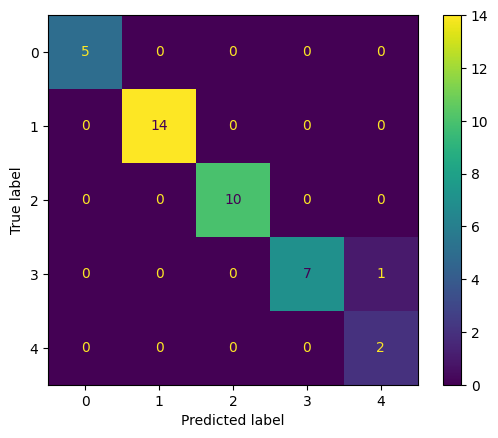

In [ ]:
# SVM 'C': 100000, 'gamma': 0.0001, 'kernel': 'rbf'
modelSVM = SVC(C=100000, gamma=0.0001, kernel="rbf")
modelSVM.fit(X_train_st, Y_train_st)
predictions = modelSVM.predict(X_st_test)

print(accuracy_score(Y_st_test, predictions))
print(confusion_matrix(Y_st_test, predictions))
print(classification_report(Y_st_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_st_test, predictions),
    display_labels=modelSVM.classes_,
)
t = disp.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


0.9487179487179487
[[ 5  0  0  0  0]
 [ 1 13  0  0  0]
 [ 0  0 10  0  0]
 [ 0  0  0  7  1]
 [ 0  0  0  0  2]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        10
           3       1.00      0.88      0.93         8
           4       0.67      1.00      0.80         2

    accuracy                           0.95        39
   macro avg       0.90      0.96      0.92        39
weighted avg       0.96      0.95      0.95        39



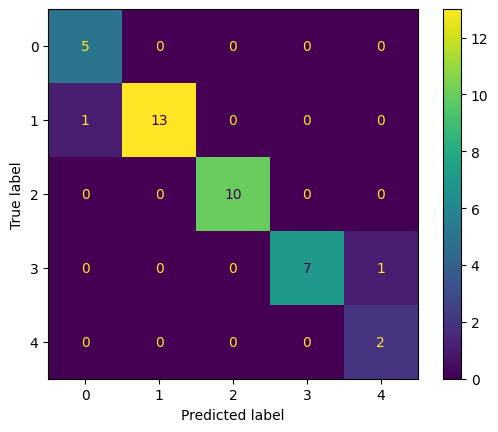

In [ ]:
# LG 'C': 1e-06, 'penalty': 'none', 'solver': 'newton-cg'
modelLG = LogisticRegression(C=1e-06, penalty="none", solver="newton-cg")
modelLG.fit(X_train_st, Y_train_st)
predictions = modelLG.predict(X_st_test)

print(accuracy_score(Y_st_test, predictions))
print(confusion_matrix(Y_st_test, predictions))
print(classification_report(Y_st_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_st_test, predictions),
    display_labels=modelLG.classes_,
)
t = disp.plot()
plt.show()

0.8717948717948718
[[ 5  0  0  0  0]
 [ 1 13  0  0  0]
 [ 0  3  7  0  0]
 [ 0  0  1  7  0]
 [ 0  0  0  0  2]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.81      0.93      0.87        14
           2       0.88      0.70      0.78        10
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00         2

    accuracy                           0.87        39
   macro avg       0.90      0.90      0.90        39
weighted avg       0.88      0.87      0.87        39



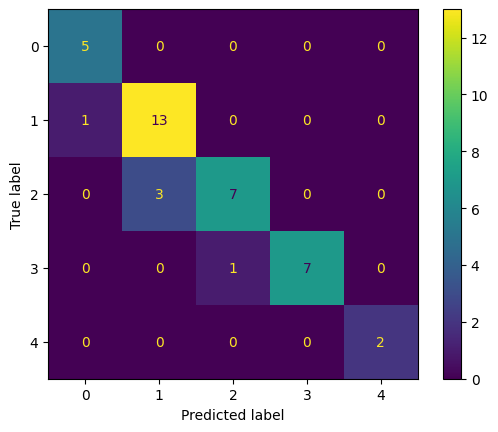

In [ ]:
# ET 'n_estimators': 210
modelET = ExtraTreesClassifier(n_estimators=210)
modelET.fit(X_train_st, Y_train_st)
predictions = modelET.predict(X_st_test)

print(accuracy_score(Y_st_test, predictions))
print(confusion_matrix(Y_st_test, predictions))
print(classification_report(Y_st_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_st_test, predictions),
    display_labels=modelET.classes_,
)
t = disp.plot()
plt.show()

0.8205128205128205
[[ 5  0  0  0  0]
 [ 1 13  0  0  0]
 [ 0  2  8  0  0]
 [ 0  0  2  5  1]
 [ 0  0  0  1  1]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.87      0.93      0.90        14
           2       0.80      0.80      0.80        10
           3       0.83      0.62      0.71         8
           4       0.50      0.50      0.50         2

    accuracy                           0.82        39
   macro avg       0.77      0.77      0.76        39
weighted avg       0.82      0.82      0.82        39



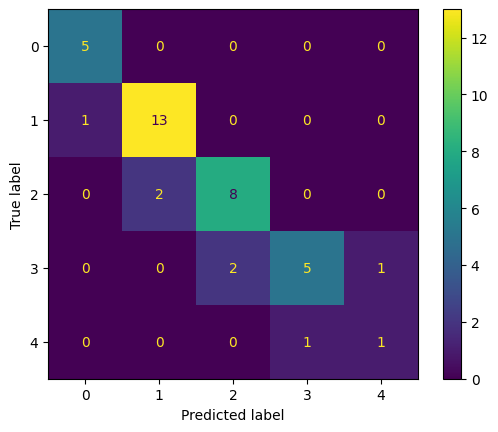

In [ ]:
# RF 'n_estimators': 40'
modelRF = RandomForestClassifier(n_estimators=40)
modelRF.fit(X_train_st, Y_train_st)
predictions = modelRF.predict(X_st_test)

print(accuracy_score(Y_st_test, predictions))
print(confusion_matrix(Y_st_test, predictions))
print(classification_report(Y_st_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_st_test, predictions),
    display_labels=modelRF.classes_,
)
t = disp.plot()
plt.show()

## Self


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_se_test = se_test[
    [
        "b7",
        "b8",
        "b9",
        "b11",
        "b12",
        "b15",
        "c1",
        "c2",
        "c3",
        "c4",
        "c5",
        "c6",
        "c7",
        "c8",
        "c9",
    ]
]
Y_se_test = se_test["Level"]

0.96875
[[ 4  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  7  1  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       1.00      0.88      0.93         8
           3       0.92      1.00      0.96        11
           4       1.00      1.00      1.00         3

    accuracy                           0.97        32
   macro avg       0.98      0.97      0.98        32
weighted avg       0.97      0.97      0.97        32



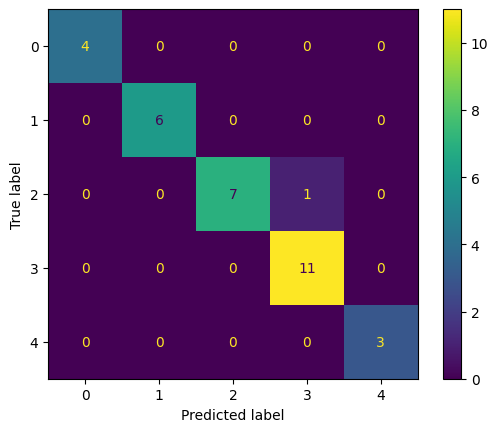

In [ ]:
# LDA  'shrinkage': 0.01, 'solver': 'lsqr'
modelLDA = LinearDiscriminantAnalysis(shrinkage=0.01, solver="lsqr")
modelLDA.fit(X_train_se, Y_train_se)
predictions = modelLDA.predict(X_se_test)

print(accuracy_score(Y_se_test, predictions))
print(confusion_matrix(Y_se_test, predictions))
print(classification_report(Y_se_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_se_test, predictions),
    display_labels=modelLDA.classes_,
)
t = disp.plot()
plt.show()

0.84375
[[3 1 0 0 0]
 [0 6 0 0 0]
 [0 0 8 0 0]
 [0 0 3 7 1]
 [0 0 0 0 3]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6
           2       0.73      1.00      0.84         8
           3       1.00      0.64      0.78        11
           4       0.75      1.00      0.86         3

    accuracy                           0.84        32
   macro avg       0.87      0.88      0.85        32
weighted avg       0.88      0.84      0.84        32



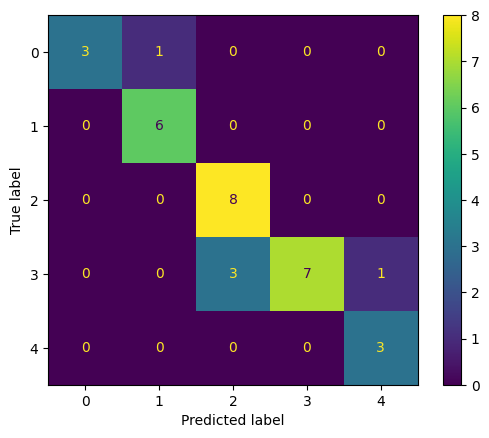

In [ ]:
# SVM 'C': 10000, 'gamma': 0.0001, 'kernel': 'rbf'
modelSVM = SVC(C=10000, gamma=0.0001, kernel="rbf")
modelSVM.fit(X_train_se, Y_train_se)
predictions = modelSVM.predict(X_se_test)

print(accuracy_score(Y_se_test, predictions))
print(confusion_matrix(Y_se_test, predictions))
print(classification_report(Y_se_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_se_test, predictions),
    display_labels=modelSVM.classes_,
)
t = disp.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


0.875
[[4 0 0 0 0]
 [0 6 0 0 0]
 [0 0 8 0 0]
 [0 0 3 7 1]
 [0 0 0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       0.73      1.00      0.84         8
           3       1.00      0.64      0.78        11
           4       0.75      1.00      0.86         3

    accuracy                           0.88        32
   macro avg       0.90      0.93      0.90        32
weighted avg       0.91      0.88      0.87        32



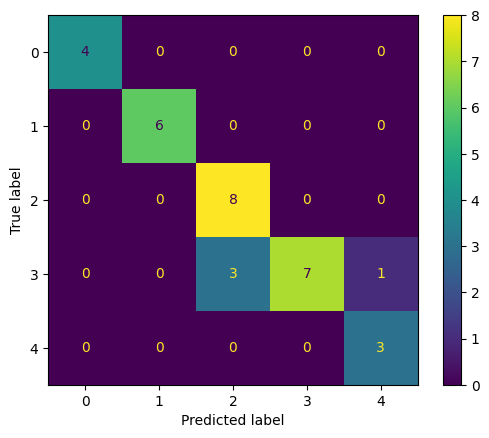

In [ ]:
# LG 'C': 1e-06, 'penalty': 'none', 'solver': 'newton-cg'
modelLG = LogisticRegression(C=1e-06, penalty="none", solver="newton-cg")
modelLG.fit(X_train_se, Y_train_se)
predictions = modelLG.predict(X_se_test)

print(accuracy_score(Y_se_test, predictions))
print(confusion_matrix(Y_se_test, predictions))
print(classification_report(Y_se_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_se_test, predictions),
    display_labels=modelLG.classes_,
)
t = disp.plot()
plt.show()

0.75
[[1 3 0 0 0]
 [1 4 1 0 0]
 [0 0 8 0 0]
 [0 0 2 8 1]
 [0 0 0 0 3]]
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.57      0.67      0.62         6
           2       0.73      1.00      0.84         8
           3       1.00      0.73      0.84        11
           4       0.75      1.00      0.86         3

    accuracy                           0.75        32
   macro avg       0.71      0.73      0.70        32
weighted avg       0.77      0.75      0.74        32



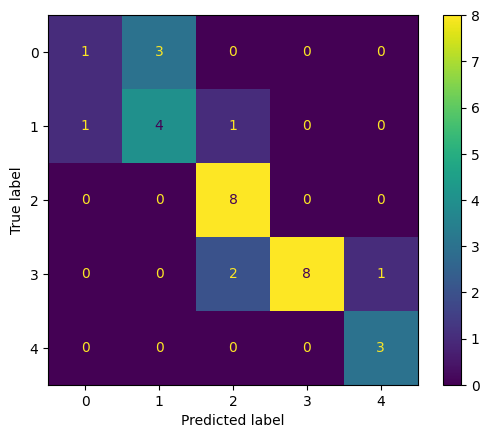

In [ ]:
# ET 'n_estimators': 250
modelET = ExtraTreesClassifier(n_estimators=250)
modelET.fit(X_train_se, Y_train_se)
predictions = modelET.predict(X_se_test)

print(accuracy_score(Y_se_test, predictions))
print(confusion_matrix(Y_se_test, predictions))
print(classification_report(Y_se_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_se_test, predictions),
    display_labels=modelET.classes_,
)
t = disp.plot()
plt.show()

0.65625
[[1 3 0 0 0]
 [0 4 2 0 0]
 [0 1 6 1 0]
 [0 0 3 7 1]
 [0 0 0 0 3]]
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.50      0.67      0.57         6
           2       0.55      0.75      0.63         8
           3       0.88      0.64      0.74        11
           4       0.75      1.00      0.86         3

    accuracy                           0.66        32
   macro avg       0.73      0.66      0.64        32
weighted avg       0.73      0.66      0.65        32



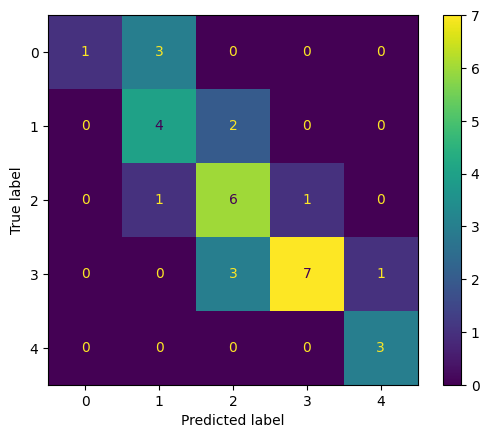

In [ ]:
# RF 'n_estimators': 35'
modelRF = RandomForestClassifier(n_estimators=35)
modelRF.fit(X_train_se, Y_train_se)
predictions = modelRF.predict(X_se_test)

print(accuracy_score(Y_se_test, predictions))
print(confusion_matrix(Y_se_test, predictions))
print(classification_report(Y_se_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_se_test, predictions),
    display_labels=modelRF.classes_,
)
t = disp.plot()
plt.show()

## Family


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_fa_test = fa_test[
    [
        "Job",
        "b7",
        "b15",
        "b2",
        "b13",
        "b14",
        "c1",
        "c2",
        "c3",
        "c4",
        "c5",
        "c6",
        "c7",
        "c8",
        "c9",
    ]
]
Y_fa_test = fa_test["Level"]

0.6923076923076923
[[2 0 0 0]
 [2 2 0 0]
 [0 0 4 0]
 [0 0 2 1]]
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         2
           2       1.00      0.50      0.67         4
           3       0.67      1.00      0.80         4
           4       1.00      0.33      0.50         3

    accuracy                           0.69        13
   macro avg       0.79      0.71      0.66        13
weighted avg       0.82      0.69      0.67        13



ValueError: ignored

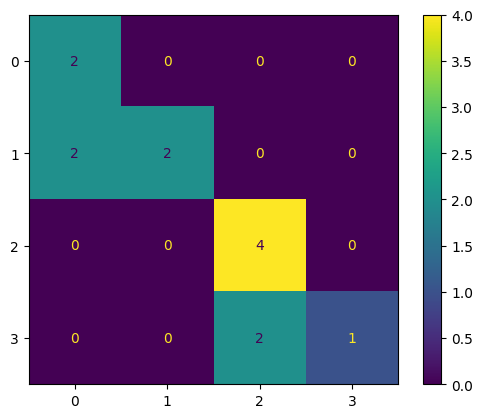

In [ ]:
# LDA  'shrinkage': 0.2, 'solver': 'lsqr'
modelLDA = LinearDiscriminantAnalysis(shrinkage=0.1, solver="lsqr")
modelLDA.fit(X_train_fa, Y_train_fa)
predictions = modelLDA.predict(X_fa_test)
# cv_results = cross_val_score(model, X_train_se, Y_train_se, cv=kfold, scoring=scoring)

print(accuracy_score(Y_fa_test, predictions))
print(confusion_matrix(Y_fa_test, predictions))
print(classification_report(Y_fa_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_fa_test, predictions),
    display_labels=modelLDA.classes_,
)
t = disp.plot()
plt.show()

0.46153846153846156
[[1 1 0 0]
 [2 0 2 0]
 [0 0 4 0]
 [0 0 2 1]]
              precision    recall  f1-score   support

           1       0.33      0.50      0.40         2
           2       0.00      0.00      0.00         4
           3       0.50      1.00      0.67         4
           4       1.00      0.33      0.50         3

    accuracy                           0.46        13
   macro avg       0.46      0.46      0.39        13
weighted avg       0.44      0.46      0.38        13



ValueError: ignored

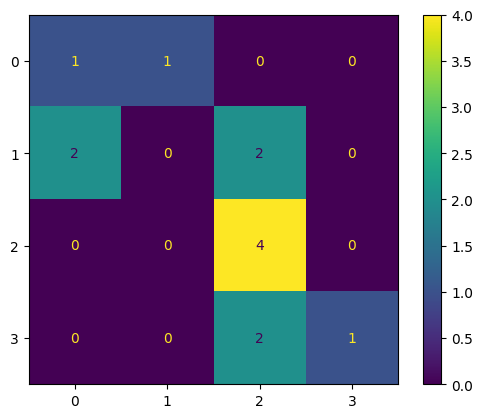

In [ ]:
# SVM 'C': 10, 'gamma': 0.1, 'kernel': 'rbf'
modelSVM = SVC(C=1, gamma=0.1, kernel="rbf")
modelSVM.fit(X_train_fa, Y_train_fa)
predictions = modelSVM.predict(X_fa_test)

print(accuracy_score(Y_fa_test, predictions))
print(confusion_matrix(Y_fa_test, predictions))
print(classification_report(Y_fa_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_fa_test, predictions),
    display_labels=modelSVM.classes_,
)
t = disp.plot()
plt.show()

0.3076923076923077
[[1 1 0 0]
 [2 0 2 0]
 [0 2 2 0]
 [0 0 2 1]]
              precision    recall  f1-score   support

           1       0.33      0.50      0.40         2
           2       0.00      0.00      0.00         4
           3       0.33      0.50      0.40         4
           4       1.00      0.33      0.50         3

    accuracy                           0.31        13
   macro avg       0.42      0.33      0.33        13
weighted avg       0.38      0.31      0.30        13



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


ValueError: ignored

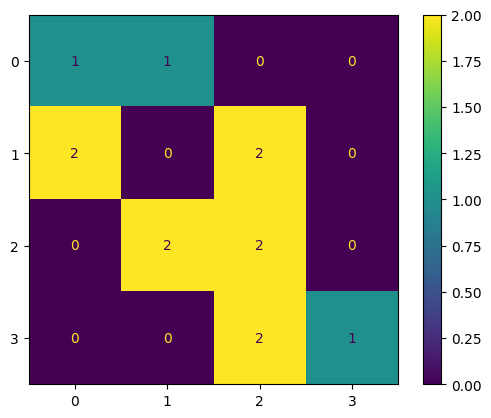

In [ ]:
# LG 'C': 1, 'penalty': 'l1', 'solver': 'saga'
modelLG = LogisticRegression(C=1, penalty="l1", solver="saga")
modelLG.fit(X_train_fa, Y_train_fa)
predictions = modelLG.predict(X_fa_test)

print(accuracy_score(Y_fa_test, predictions))
print(confusion_matrix(Y_fa_test, predictions))
print(classification_report(Y_fa_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_fa_test, predictions),
    display_labels=modelLG.classes_,
)
t = disp.plot()
plt.show()

0.5384615384615384
[[1 1 0 0]
 [1 2 1 0]
 [0 1 2 1]
 [0 0 1 2]]
              precision    recall  f1-score   support

           1       0.50      0.50      0.50         2
           2       0.50      0.50      0.50         4
           3       0.50      0.50      0.50         4
           4       0.67      0.67      0.67         3

    accuracy                           0.54        13
   macro avg       0.54      0.54      0.54        13
weighted avg       0.54      0.54      0.54        13



ValueError: ignored

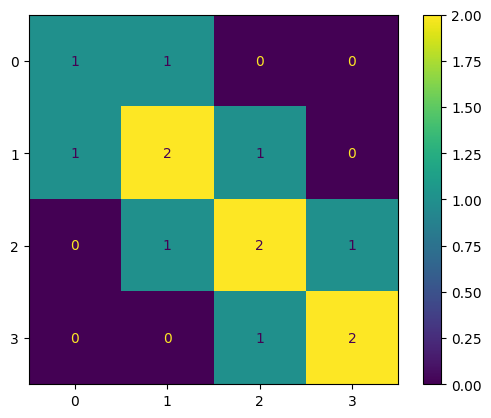

In [ ]:
# ET 'n_estimators': 235
modelET = ExtraTreesClassifier(n_estimators=235)
modelET.fit(X_train_fa, Y_train_fa)
predictions = modelET.predict(X_fa_test)

print(accuracy_score(Y_fa_test, predictions))
print(confusion_matrix(Y_fa_test, predictions))
print(classification_report(Y_fa_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_fa_test, predictions),
    display_labels=modelET.classes_,
)
t = disp.plot()
plt.show()

0.46153846153846156
[[1 1 0 0]
 [2 1 1 0]
 [0 1 2 1]
 [0 0 1 2]]
              precision    recall  f1-score   support

           1       0.33      0.50      0.40         2
           2       0.33      0.25      0.29         4
           3       0.50      0.50      0.50         4
           4       0.67      0.67      0.67         3

    accuracy                           0.46        13
   macro avg       0.46      0.48      0.46        13
weighted avg       0.46      0.46      0.46        13



ValueError: ignored

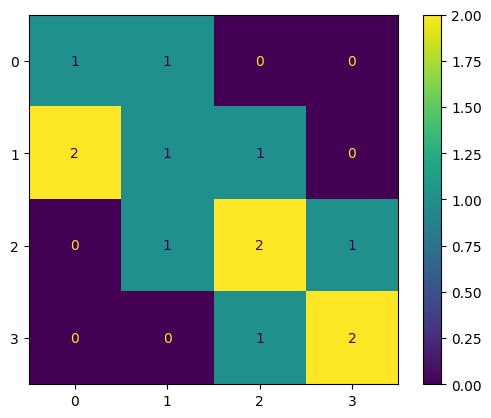

In [ ]:
# RF 'n_estimators': 37
modelRF = RandomForestClassifier(n_estimators=37)
modelRF.fit(X_train_fa, Y_train_fa)
predictions = modelRF.predict(X_fa_test)

print(accuracy_score(Y_fa_test, predictions))
print(confusion_matrix(Y_fa_test, predictions))
print(classification_report(Y_fa_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_fa_test, predictions),
    display_labels=modelRF.classes_,
)
t = disp.plot()
plt.show()

- **LDA: 'shrinkage': 0.55, 'solver': 'lsqr'**
- **LR: 'C': 1, 'penalty': 'l1', 'solver': 'saga'**
- **SVM: 'C': 100, 'gamma': 0.01, 'kernel': 'rbf'**
- **ET: 'n_estimators': 240**
- **RF: 'n_estimators': 40'**


# Fa - Lo


## Family


In [ ]:
# Family
fa = pd.read_excel("/content/fa.xlsx")

# Love
lo = pd.read_excel("/content/love.xlsx")

In [ ]:
"""from sklearn.utils import shuffle
fa = shuffle(fa)
fa.head()"""

Job  Sex  LGBT   a1   a2   a3   a4   a5   a6  a7  ...  c1  c2  c3  c4  \
63     2    1   0.0  2.0  1.0  1.0  1.0  0.5  0.0   3  ...   1   2   0   2   
59     2    0   0.0  2.0  0.5  1.0  1.0  0.5  0.5   3  ...   3   2   3   3   
113    2    1   0.0  1.5  0.5  0.5  1.0  0.5  1.0   3  ...   1   1   1   2   
55     3    1   0.0  1.5  0.5  0.5  0.5  1.0  1.0   3  ...   3   3   2   3   
160    4    1   0.0  2.0  0.0  0.5  0.0  0.5  1.0   3  ...   1   1   0   2   

     c5  c6  c7  c8  c9  Level  
63    3   3   3   3   3      4  
59    2   3   3   3   3      4  
113   2   1   1   1   2      2  
55    2   1   3   1   3      4  
160   1   0   1   0   0      1  

[5 rows x 35 columns]

In [ ]:
from sklearn.model_selection import train_test_split

X_fa = fa[
    [
        "Job",
        "b7",
        "b3",
        "b2",
        "b13",
        "b14",
        "c1",
        "c2",
        "c3",
        "c4",
        "c5",
        "c6",
        "c7",
        "c8",
        "c9",
    ]
]
Y_fa = fa["Level"]

X_training_fa, X_fa_test, Y_training_fa, Y_fa_test = train_test_split(
    X_fa, Y_fa, test_size=0.1, random_state=42
)
X_train_fa, X_test_fa, Y_train_fa, Y_test_fa = train_test_split(
    X_training_fa, Y_training_fa, test_size=0.2, random_state=42
)

In [ ]:
X_training_fa.shape, X_fa_test.shape, X_train_fa.shape, X_test_fa.shape

((153, 15), (17, 15), (122, 15), (31, 15))

### Model


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

num_folds = 10
seed = 7
scoring = "accuracy"

models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))

In [ ]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_fa, Y_train_fa, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.694231 (0.126074)
LDA: 0.884615 (0.092183)
KNN: 0.532692 (0.144065)
CART: 0.539744 (0.118955)
NB: 0.712821 (0.145636)
SVM: 0.712179 (0.114112)


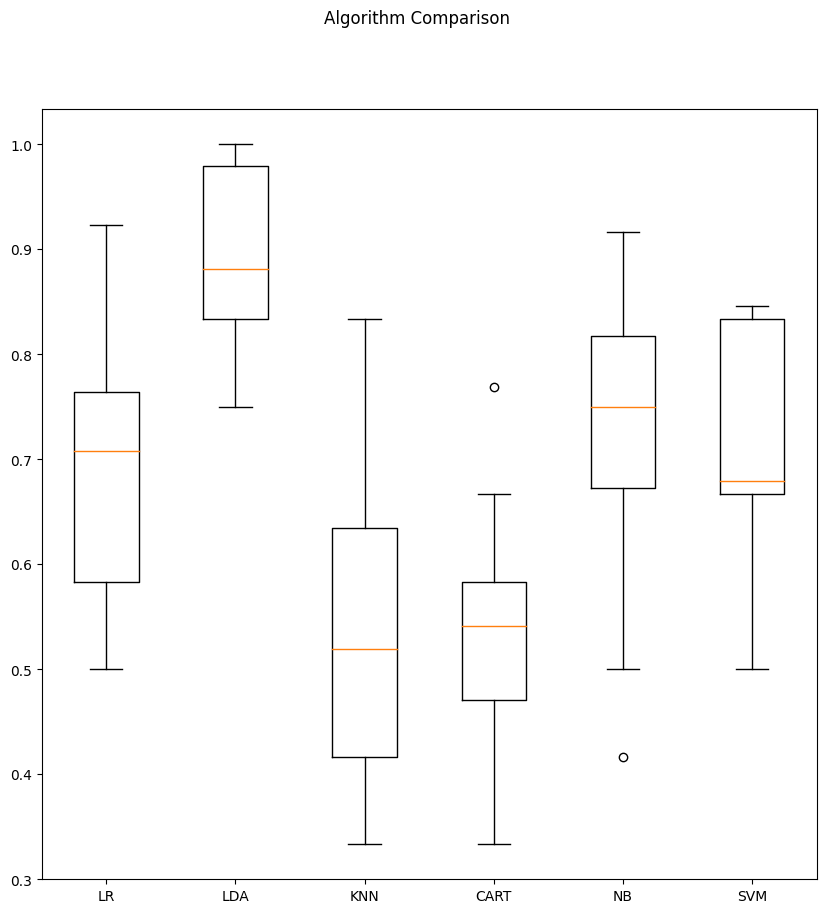

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
pipelines = []
pipelines.append(
    ("ScaledLR", Pipeline([("Scaler", StandardScaler()), ("LR", LogisticRegression())]))
)
pipelines.append(
    (
        "ScaledLDA",
        Pipeline([("Scaler", StandardScaler()), ("LDA", LinearDiscriminantAnalysis())]),
    )
)
pipelines.append(
    (
        "ScaledKNN",
        Pipeline([("Scaler", StandardScaler()), ("KNN", KNeighborsClassifier())]),
    )
)
pipelines.append(
    (
        "ScaledCART",
        Pipeline([("Scaler", StandardScaler()), ("CART", DecisionTreeClassifier())]),
    )
)
pipelines.append(
    ("ScaledNB", Pipeline([("Scaler", StandardScaler()), ("NB", GaussianNB())]))
)
pipelines.append(
    ("ScaledSVM", Pipeline([("Scaler", StandardScaler()), ("SVM", SVC())]))
)
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_fa, Y_train_fa, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.702564 (0.126729)
ScaledLDA: 0.884615 (0.092183)
ScaledKNN: 0.672436 (0.132878)
ScaledCART: 0.573077 (0.136832)
ScaledNB: 0.712821 (0.145636)
ScaledSVM: 0.759615 (0.152512)


**LDA - LR - SVM**


In [ ]:
ensembles = []
ensembles.append(("AB", AdaBoostClassifier()))
ensembles.append(("GBM", GradientBoostingClassifier()))
ensembles.append(("RF", RandomForestClassifier()))
ensembles.append(("ET", ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_fa, Y_train_fa, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.540385 (0.141927)
GBM: 0.580128 (0.173249)
RF: 0.686538 (0.153644)
ET: 0.735256 (0.149842)


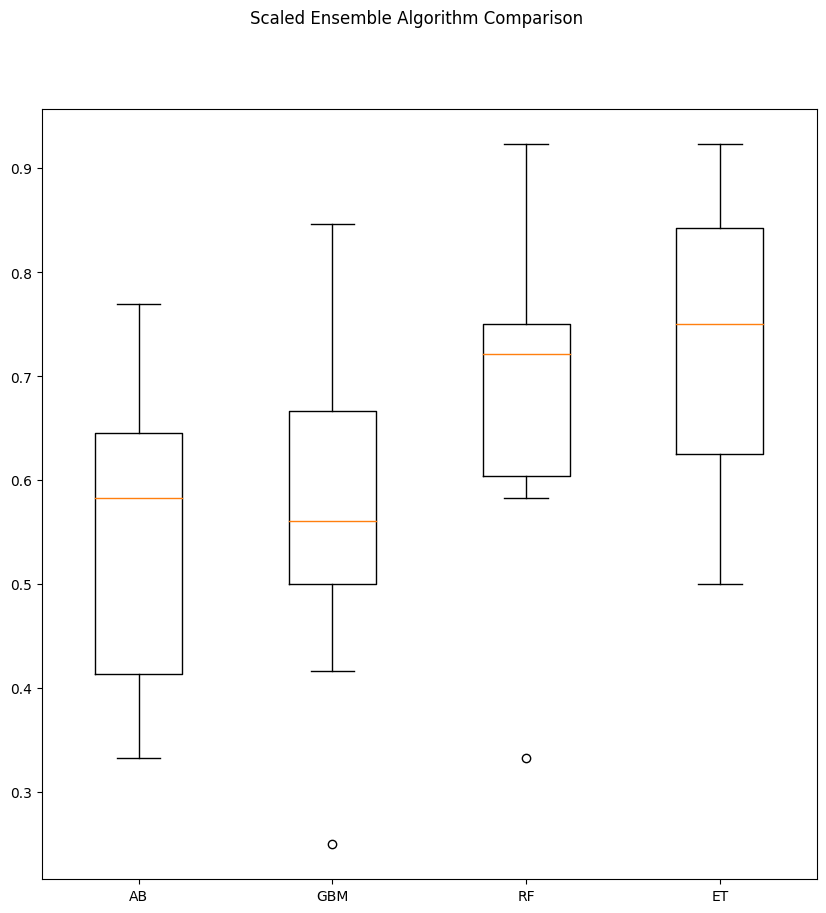

In [ ]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle("Scaled Ensemble Algorithm Comparison")
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

**RF - ET**


### Tuning


In [ ]:
scaler = StandardScaler().fit(X_train_fa)
rescaledX = scaler.transform(X_train_fa)

In [ ]:
# LDA
shrinkage_values = [
    0.1,
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    0.9,
    0.05,
    0.25,
    0.15,
    0.35,
    0.45,
    0.55,
    0.65,
    0.75,
    0.85,
    0.95,
    0.06,
    0.07,
    0.04,
    0.03,
    0.02,
    0.01,
    0.009,
    0.008,
    0.007,
    0.006,
    0.005,
    1,
    0.97,
    0.93,
]
solver_values = ["svd", "lsqr", "eigen"]
param_grid = dict(shrinkage=shrinkage_values, solver=solver_values)
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_fa)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.900641 using {'shrinkage': 0.1, 'solver': 'lsqr'}
nan (nan) with: {'shrinkage': 0.1, 'solver': 'svd'}
0.900641 (0.089892) with: {'shrinkage': 0.1, 'solver': 'lsqr'}
0.900641 (0.089892) with: {'shrinkage': 0.1, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.2, 'solver': 'svd'}
0.900641 (0.089892) with: {'shrinkage': 0.2, 'solver': 'lsqr'}
0.900641 (0.089892) with: {'shrinkage': 0.2, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.3, 'solver': 'svd'}
0.883974 (0.100232) with: {'shrinkage': 0.3, 'solver': 'lsqr'}
0.883974 (0.100232) with: {'shrinkage': 0.3, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.4, 'solver': 'svd'}
0.867308 (0.107036) with: {'shrinkage': 0.4, 'solver': 'lsqr'}
0.867308 (0.107036) with: {'shrinkage': 0.4, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.5, 'solver': 'svd'}
0.850641 (0.122838) with: {'shrinkage': 0.5, 'solver': 'lsqr'}
0.850641 (0.122838) with: {'shrinkage': 0.5, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.6, 'solver': 's

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
330 fits failed out of a total of 990.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
330 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 615, in fit
    raise NotImplementedError("shrinkage not supported with 'svd' solver.")
NotImplementedError: shrinkage not supported with 'svd' solver.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/l

In [ ]:
# SVM
param_grid = {
    "C": [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000],
    "gamma": [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001],
    "kernel": ["rbf"],
}
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_fa)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.852564 using {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
0.146795 (0.102221) with: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.278205 (0.147942) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.285256 (0.175066) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.188462 (0.144172) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.188462 (0.144172) with: {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.188462 (0.144172) with: {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.188462 (0.144172) with: {'C': 0.1, 'gamma': 1e-06, 'kernel': 'rbf'}
0.171154 (0.083974) with: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.760256 (0.161360) with: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.737179 (0.161533) with: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.319231 (0.148125) with: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.188462 (0.144172) with: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.188462 (0.144172) with: {'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.188462 (0.144172) with: {'C': 1, 'gamma': 1e-06

In [ ]:
# LR
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
penalty = ["none", "elasticnet", "l1", "l2"]
C = [
    0.000001,
    0.00001,
    0.0001,
    0.001,
    0.01,
    0.1,
    1,
    10,
    100,
    0.0000001,
    0.00000001,
    0.000000001,
]
param_grid = dict(solver=solver, penalty=penalty, C=C)
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_fa)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Best: 0.752564 using {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.743590 (0.110510) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'newton-cg'}
0.720513 (0.120342) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'lbfgs'}
nan (nan) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'liblinear'}
0.744231 (0.109668) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'sag'}
0.735897 (0.118088) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'saga'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'sag'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'saga'}
nan (nan) with: {'C': 1e-06, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (nan) with: {'C': 1e-06, 'penalty': 'l1', 'solver': 'lbfgs'}
0.081410 (0.073203) with: {'C': 1e-06, 'penalty': 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1080 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 71, in _check_solver
    raise ValueError("penalty='non

In [ ]:
# ET
param_grid = dict(
    n_estimators=np.array(
        [230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 220, 210, 200, 190]
    )
)
model = ExtraTreesClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_fa)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.731410 using {'n_estimators': 260}
0.723077 (0.157849) with: {'n_estimators': 230}
0.723077 (0.157849) with: {'n_estimators': 235}
0.723077 (0.157849) with: {'n_estimators': 240}
0.723077 (0.157849) with: {'n_estimators': 245}
0.723077 (0.157849) with: {'n_estimators': 250}
0.723077 (0.157849) with: {'n_estimators': 255}
0.731410 (0.156847) with: {'n_estimators': 260}
0.723077 (0.157849) with: {'n_estimators': 265}
0.723077 (0.157849) with: {'n_estimators': 270}
0.723077 (0.157849) with: {'n_estimators': 275}
0.723077 (0.157849) with: {'n_estimators': 280}
0.723077 (0.157849) with: {'n_estimators': 220}
0.723077 (0.157849) with: {'n_estimators': 210}
0.723077 (0.157849) with: {'n_estimators': 200}
0.714744 (0.149381) with: {'n_estimators': 190}


- **LDA: 'shrinkage': 0.1, 'solver': 'lsqr'**
- **SVM: 'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'**
- **LR: 'C': 10, 'penalty': 'l1', 'solver': 'saga'**
- **ET: 'n_estimators': 260**
- **RF: 'n_estimators': 45'**


In [ ]:
# RF
param_grid = dict(
    n_estimators=np.array([35, 40, 45, 55, 30, 25, 20, 50, 53, 58, 60, 63, 65, 48])
)
model = RandomForestClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_fa)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.728846 using {'n_estimators': 45}
0.663462 (0.151104) with: {'n_estimators': 35}
0.679487 (0.165826) with: {'n_estimators': 40}
0.728846 (0.112319) with: {'n_estimators': 45}
0.686538 (0.134354) with: {'n_estimators': 55}
0.664103 (0.172177) with: {'n_estimators': 30}
0.673718 (0.168906) with: {'n_estimators': 25}
0.656410 (0.129931) with: {'n_estimators': 20}
0.703205 (0.159512) with: {'n_estimators': 50}
0.694872 (0.145336) with: {'n_estimators': 53}
0.686538 (0.162433) with: {'n_estimators': 58}
0.686538 (0.139427) with: {'n_estimators': 60}
0.669872 (0.140800) with: {'n_estimators': 63}
0.669872 (0.140800) with: {'n_estimators': 65}
0.703846 (0.155329) with: {'n_estimators': 48}


### Fiting


In [ ]:
# LDA  'shrinkage': 0.5, 'solver': 'lsqr'
modelLDA = LinearDiscriminantAnalysis(shrinkage=0.1, solver="lsqr")
modelLDA.fit(X_train_fa, Y_train_fa)
predictions = modelLDA.predict(X_test_fa)

print(accuracy_score(Y_train_fa, modelLDA.predict(X_train_fa)))
print(accuracy_score(Y_test_fa, predictions))
print(confusion_matrix(Y_test_fa, predictions))
print(classification_report(Y_test_fa, predictions))

0.9426229508196722
0.8709677419354839
[[1 0 0 0 0]
 [0 4 3 0 0]
 [0 1 8 0 0]
 [0 0 0 6 0]
 [0 0 0 0 8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.80      0.57      0.67         7
           2       0.73      0.89      0.80         9
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         8

    accuracy                           0.87        31
   macro avg       0.91      0.89      0.89        31
weighted avg       0.88      0.87      0.87        31



In [ ]:
# SVM 'C': 10, 'gamma': 0.1, 'kernel': 'rbf'
modelSVM = SVC(C=1000, gamma=0.01, kernel="rbf")
modelSVM.fit(X_train_fa, Y_train_fa)
predictions = modelSVM.predict(X_test_fa)

print(accuracy_score(Y_train_fa, modelSVM.predict(X_train_fa)))
print(accuracy_score(Y_test_fa, predictions))
print(confusion_matrix(Y_test_fa, predictions))
print(classification_report(Y_test_fa, predictions))

1.0
0.8387096774193549
[[1 0 0 0 0]
 [0 5 2 0 0]
 [0 2 7 0 0]
 [0 0 1 5 0]
 [0 0 0 0 8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.71      0.71      0.71         7
           2       0.70      0.78      0.74         9
           3       1.00      0.83      0.91         6
           4       1.00      1.00      1.00         8

    accuracy                           0.84        31
   macro avg       0.88      0.87      0.87        31
weighted avg       0.85      0.84      0.84        31



In [ ]:
# LG 'C': 1, 'penalty': 'l1', 'solver': 'saga'
modelLG = LogisticRegression(C=10, penalty="l1", solver="saga")
modelLG.fit(X_train_fa, Y_train_fa)
predictions = modelLG.predict(X_test_fa)

print(accuracy_score(Y_train_fa, modelLG.predict(X_train_fa)))
print(accuracy_score(Y_test_fa, predictions))
print(confusion_matrix(Y_test_fa, predictions))
print(classification_report(Y_test_fa, predictions))

0.8442622950819673
0.5161290322580645
[[1 0 0 0 0]
 [0 2 5 0 0]
 [0 2 5 2 0]
 [0 0 2 1 3]
 [0 0 0 1 7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.50      0.29      0.36         7
           2       0.42      0.56      0.48         9
           3       0.25      0.17      0.20         6
           4       0.70      0.88      0.78         8

    accuracy                           0.52        31
   macro avg       0.57      0.58      0.56        31
weighted avg       0.50      0.52      0.49        31



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# ET 'n_estimators': 245
modelET = ExtraTreesClassifier(n_estimators=260)
modelET.fit(X_train_fa, Y_train_fa)
predictions = modelET.predict(X_test_fa)

print(accuracy_score(Y_train_fa, modelET.predict(X_train_fa)))
print(accuracy_score(Y_test_fa, predictions))
print(confusion_matrix(Y_test_fa, predictions))
print(classification_report(Y_test_fa, predictions))

1.0
0.7419354838709677
[[0 1 0 0 0]
 [0 4 3 0 0]
 [0 2 7 0 0]
 [0 0 0 4 2]
 [0 0 0 0 8]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.57      0.57      0.57         7
           2       0.70      0.78      0.74         9
           3       1.00      0.67      0.80         6
           4       0.80      1.00      0.89         8

    accuracy                           0.74        31
   macro avg       0.61      0.60      0.60        31
weighted avg       0.73      0.74      0.73        31



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# RF 'n_estimators': 25'
modelRF = RandomForestClassifier(n_estimators=45)
modelRF.fit(X_train_fa, Y_train_fa)
predictions = modelRF.predict(X_test_fa)

print(accuracy_score(Y_train_fa, modelRF.predict(X_train_fa)))
print(accuracy_score(Y_test_fa, predictions))
print(confusion_matrix(Y_test_fa, predictions))
print(classification_report(Y_test_fa, predictions))

1.0
0.8387096774193549
[[1 0 0 0 0]
 [0 4 3 0 0]
 [0 1 7 1 0]
 [0 0 0 6 0]
 [0 0 0 0 8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.80      0.57      0.67         7
           2       0.70      0.78      0.74         9
           3       0.86      1.00      0.92         6
           4       1.00      1.00      1.00         8

    accuracy                           0.84        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.84      0.84      0.83        31



### Apply


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

"""
X_fa_test = fa_test[['Job', 'b7','b15', 'b2','b13', 'b14', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']]
Y_fa_test = fa_test['Level']"""

"\nX_fa_test = fa_test[['Job', 'b7','b15', 'b2','b13', 'b14', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']]\nY_fa_test = fa_test['Level']"

1.0
[[2 0 0 0 0]
 [0 2 0 0 0]
 [0 0 8 0 0]
 [0 0 0 2 0]
 [0 0 0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



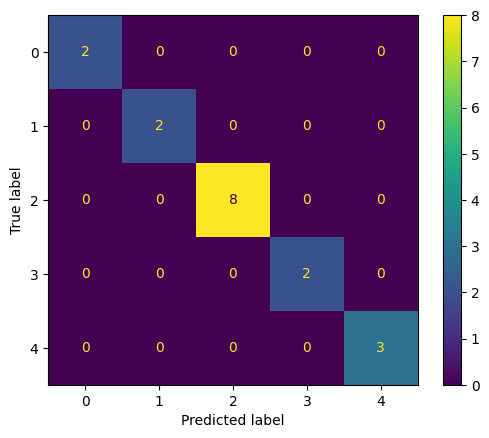

In [ ]:
# LDA  'shrinkage': 0.2, 'solver': 'lsqr'
modelLDA = LinearDiscriminantAnalysis(shrinkage=0.1, solver="lsqr")
modelLDA.fit(X_train_fa, Y_train_fa)
predictions = modelLDA.predict(X_fa_test)
# cv_results = cross_val_score(model, X_train_se, Y_train_se, cv=kfold, scoring=scoring)

print(accuracy_score(Y_fa_test, predictions))
print(confusion_matrix(Y_fa_test, predictions))
print(classification_report(Y_fa_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_fa_test, predictions),
    display_labels=modelLDA.classes_,
)
t = disp.plot()
plt.show()

1.0
[[2 0 0 0 0]
 [0 2 0 0 0]
 [0 0 8 0 0]
 [0 0 0 2 0]
 [0 0 0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



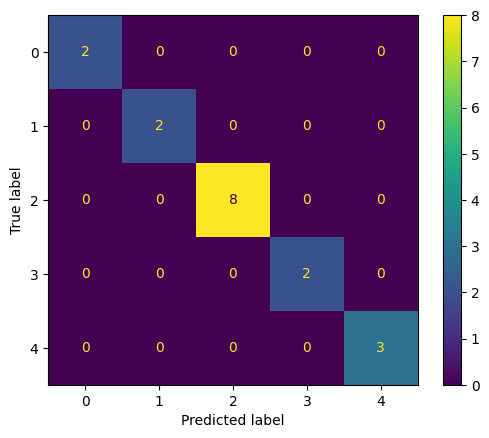

In [ ]:
# SVM 'C': 10, 'gamma': 0.1, 'kernel': 'rbf'
modelSVM = SVC(C=1000, gamma=0.01, kernel="rbf")
modelSVM.fit(X_train_fa, Y_train_fa)
predictions = modelSVM.predict(X_fa_test)

print(accuracy_score(Y_fa_test, predictions))
print(confusion_matrix(Y_fa_test, predictions))
print(classification_report(Y_fa_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_fa_test, predictions),
    display_labels=modelSVM.classes_,
)
t = disp.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.6470588235294118
[[1 1 0 0 0]
 [0 2 0 0 0]
 [0 0 6 1 1]
 [0 0 1 0 1]
 [0 0 0 1 2]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2
           2       0.86      0.75      0.80         8
           3       0.00      0.00      0.00         2
           4       0.50      0.67      0.57         3

    accuracy                           0.65        17
   macro avg       0.60      0.58      0.57        17
weighted avg       0.69      0.65      0.65        17



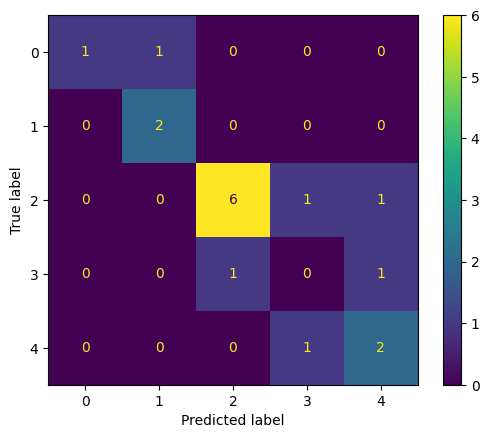

In [ ]:
# LG 'C': 1, 'penalty': 'l1', 'solver': 'saga'
modelLG = LogisticRegression(C=10, penalty="l1", solver="saga")
modelLG.fit(X_train_fa, Y_train_fa)
predictions = modelLG.predict(X_fa_test)

print(accuracy_score(Y_fa_test, predictions))
print(confusion_matrix(Y_fa_test, predictions))
print(classification_report(Y_fa_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_fa_test, predictions),
    display_labels=modelLG.classes_,
)
t = disp.plot()
plt.show()

0.7058823529411765
[[1 1 0 0 0]
 [0 2 0 0 0]
 [0 2 5 1 0]
 [0 0 0 1 1]
 [0 0 0 0 3]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.40      1.00      0.57         2
           2       1.00      0.62      0.77         8
           3       0.50      0.50      0.50         2
           4       0.75      1.00      0.86         3

    accuracy                           0.71        17
   macro avg       0.73      0.72      0.67        17
weighted avg       0.83      0.71      0.72        17



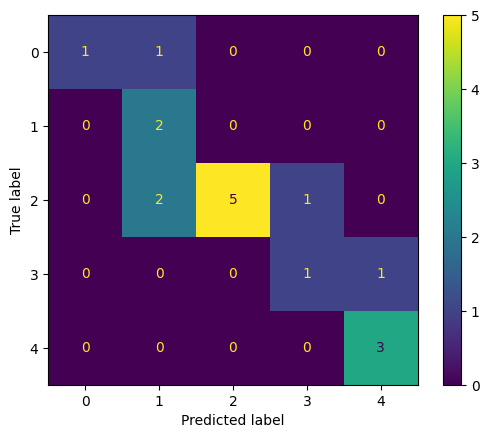

In [ ]:
# ET 'n_estimators': 235
modelET = ExtraTreesClassifier(n_estimators=260)
modelET.fit(X_train_fa, Y_train_fa)
predictions = modelET.predict(X_fa_test)

print(accuracy_score(Y_fa_test, predictions))
print(confusion_matrix(Y_fa_test, predictions))
print(classification_report(Y_fa_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_fa_test, predictions),
    display_labels=modelET.classes_,
)
t = disp.plot()
plt.show()

0.7058823529411765
[[1 1 0 0 0]
 [0 2 0 0 0]
 [0 1 6 1 0]
 [0 0 0 1 1]
 [0 0 1 0 2]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         2
           2       0.86      0.75      0.80         8
           3       0.50      0.50      0.50         2
           4       0.67      0.67      0.67         3

    accuracy                           0.71        17
   macro avg       0.70      0.68      0.66        17
weighted avg       0.76      0.71      0.71        17



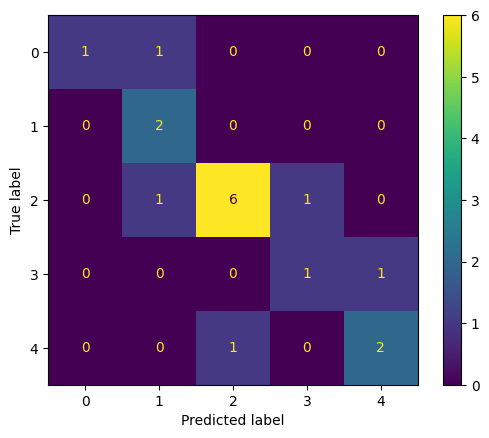

In [ ]:
# RF 'n_estimators': 37
modelRF = RandomForestClassifier(n_estimators=45)
modelRF.fit(X_train_fa, Y_train_fa)
predictions = modelRF.predict(X_fa_test)

print(accuracy_score(Y_fa_test, predictions))
print(confusion_matrix(Y_fa_test, predictions))
print(classification_report(Y_fa_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_fa_test, predictions),
    display_labels=modelRF.classes_,
)
t = disp.plot()
plt.show()

## Love


In [ ]:
# Love
lo = pd.read_excel("/content/lo.xlsx")

In [ ]:
from sklearn.utils import shuffle

lo = shuffle(lo)
lo.head()

Job  Sex  LGBT   a1   a2   a3   a4   a5   a6  a7  ...  c1  c2  c3  c4  \
127    5    1   0.0  2.0  1.0  1.0  1.0  0.5  0.5   3  ...   1   3   3   2   
111    4    0   0.0  2.0  0.0  0.5  0.5  0.0  0.5   3  ...   1   3   3   1   
91     4    1   0.0  1.5  0.0  0.0  0.0  1.0  0.0   1  ...   2   1   1   0   
126    4    0   1.0  2.0  0.5  0.5  0.0  1.0  0.5   3  ...   2   1   3   3   
3      7    1   0.0  2.0  1.0  1.0  1.0  0.5  0.0   5  ...   3   3   3   3   

     c5  c6  c7  c8  c9  Level  
127   3   3   2   2   2      4  
111   1   0   0   1   1      2  
91    2   0   0   0   0      1  
126   2   1   0   1   2      3  
3     3   3   3   3   3      4  

[5 rows x 35 columns]

In [ ]:
lo.to_excel("lo.xlsx")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_lo = lo[
    [
        "c1",
        "c2",
        "c3",
        "c4",
        "c5",
        "c6",
        "c7",
        "c8",
        "c9",
        "b1",
        "b5",
        "b6",
        "b7",
        "b8",
        "b9",
    ]
]
Y_lo = lo["Level"]

X_training_lo, X_lo_test, Y_training_lo, Y_lo_test = train_test_split(
    X_lo, Y_lo, test_size=0.2, random_state=42
)
X_train_lo, X_test_lo, Y_train_lo, Y_test_lo = train_test_split(
    X_training_lo, Y_training_lo, test_size=0.2, random_state=42
)
X_training_lo.shape, X_lo_test.shape, X_train_lo.shape, X_test_lo.shape

((110, 15), (28, 15), (88, 15), (22, 15))

### Model


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

num_folds = 10
seed = 7
scoring = "accuracy"

models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))

In [ ]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_lo, Y_train_lo, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.688889 (0.162617)
LDA: 0.897778 (0.092135)
KNN: 0.657778 (0.088443)
CART: 0.556667 (0.146856)
NB: 0.678889 (0.164688)
SVM: 0.667778 (0.086987)


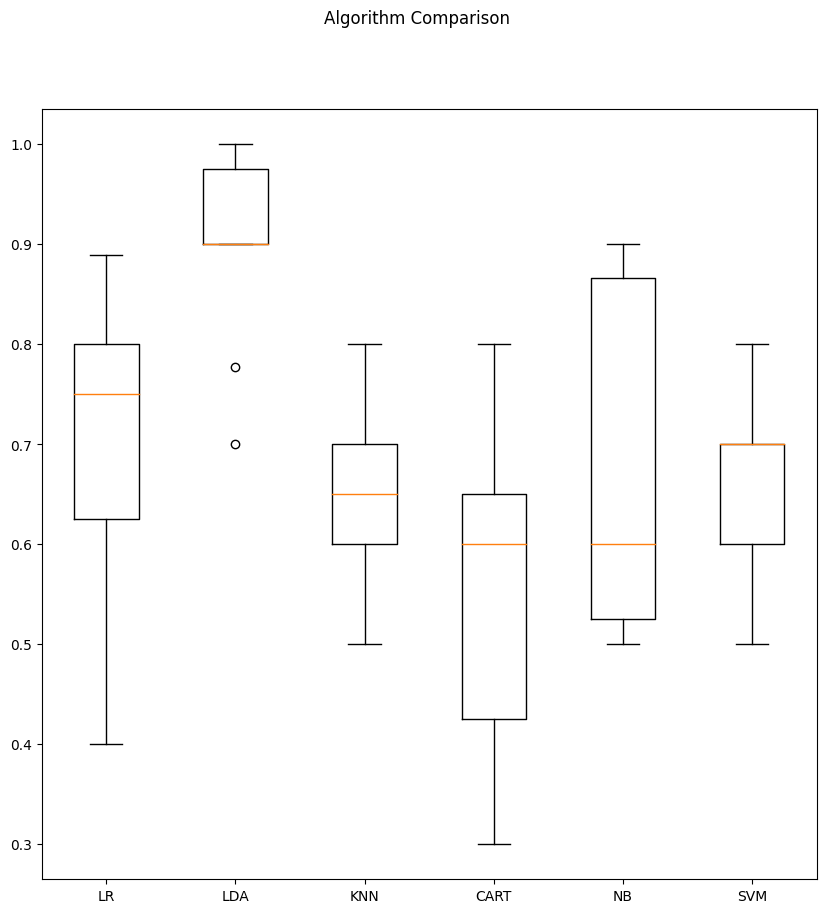

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
pipelines = []
pipelines.append(
    ("ScaledLR", Pipeline([("Scaler", StandardScaler()), ("LR", LogisticRegression())]))
)
pipelines.append(
    (
        "ScaledLDA",
        Pipeline([("Scaler", StandardScaler()), ("LDA", LinearDiscriminantAnalysis())]),
    )
)
pipelines.append(
    (
        "ScaledKNN",
        Pipeline([("Scaler", StandardScaler()), ("KNN", KNeighborsClassifier())]),
    )
)
pipelines.append(
    (
        "ScaledCART",
        Pipeline([("Scaler", StandardScaler()), ("CART", DecisionTreeClassifier())]),
    )
)
pipelines.append(
    ("ScaledNB", Pipeline([("Scaler", StandardScaler()), ("NB", GaussianNB())]))
)
pipelines.append(
    ("ScaledSVM", Pipeline([("Scaler", StandardScaler()), ("SVM", SVC())]))
)
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_lo, Y_train_lo, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.707778 (0.102686)
ScaledLDA: 0.897778 (0.092135)
ScaledKNN: 0.678889 (0.095510)
ScaledCART: 0.585556 (0.158079)
ScaledNB: 0.678889 (0.164688)
ScaledSVM: 0.770000 (0.161555)


**LDA - LR - SVM**


In [ ]:
ensembles = []
ensembles.append(("AB", AdaBoostClassifier()))
ensembles.append(("GBM", GradientBoostingClassifier()))
ensembles.append(("RF", RandomForestClassifier()))
ensembles.append(("ET", ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=None)
    cv_results = cross_val_score(
        model, X_train_lo, Y_train_lo, cv=kfold, scoring=scoring
    )
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.426667 (0.168523)
GBM: 0.506667 (0.160416)
RF: 0.688889 (0.135810)
ET: 0.678889 (0.152060)


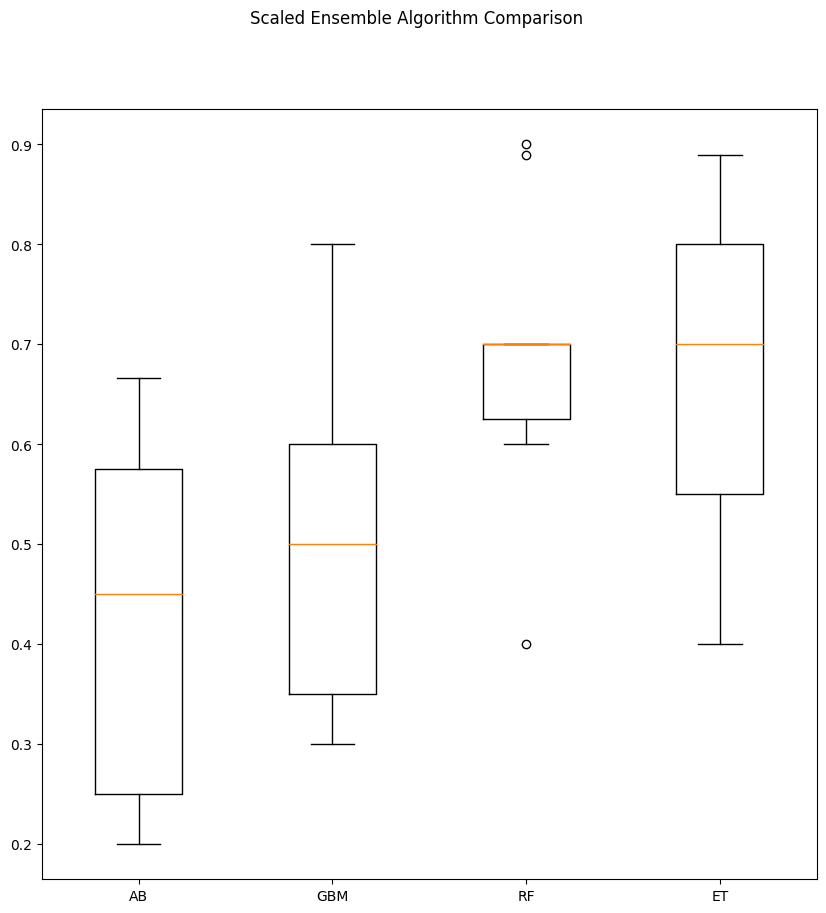

In [ ]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle("Scaled Ensemble Algorithm Comparison")
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

**RF - ET**


### Tuning


In [ ]:
scaler = StandardScaler().fit(X_train_lo)
rescaledX = scaler.transform(X_train_lo)

In [ ]:
# LDA
shrinkage_values = [
    0.1,
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    0.9,
    0.05,
    0.25,
    0.15,
    0.35,
    0.45,
    0.55,
    0.65,
    0.75,
    0.85,
    0.95,
    0.06,
    0.07,
    0.04,
    0.03,
    0.02,
    0.01,
    0.009,
    0.008,
    0.007,
    0.006,
    0.005,
    1,
    0.97,
    0.93,
]
solver_values = ["svd", "lsqr", "eigen"]
param_grid = dict(shrinkage=shrinkage_values, solver=solver_values)
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_lo)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.897778 using {'shrinkage': 0.02, 'solver': 'lsqr'}
nan (nan) with: {'shrinkage': 0.1, 'solver': 'svd'}
0.877778 (0.100000) with: {'shrinkage': 0.1, 'solver': 'lsqr'}
0.877778 (0.100000) with: {'shrinkage': 0.1, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.2, 'solver': 'svd'}
0.867778 (0.091954) with: {'shrinkage': 0.2, 'solver': 'lsqr'}
0.867778 (0.091954) with: {'shrinkage': 0.2, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.3, 'solver': 'svd'}
0.857778 (0.093333) with: {'shrinkage': 0.3, 'solver': 'lsqr'}
0.857778 (0.093333) with: {'shrinkage': 0.3, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.4, 'solver': 'svd'}
0.858889 (0.091226) with: {'shrinkage': 0.4, 'solver': 'lsqr'}
0.858889 (0.091226) with: {'shrinkage': 0.4, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.5, 'solver': 'svd'}
0.828889 (0.089194) with: {'shrinkage': 0.5, 'solver': 'lsqr'}
0.828889 (0.089194) with: {'shrinkage': 0.5, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.6, 'solver': '

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
330 fits failed out of a total of 990.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
330 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 615, in fit
    raise NotImplementedError("shrinkage not supported with 'svd' solver.")
NotImplementedError: shrinkage not supported with 'svd' solver.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/l

In [ ]:
# SVM
param_grid = {
    "C": [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000],
    "gamma": [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001],
    "kernel": ["rbf"],
}
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_lo)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.867778 using {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.180000 (0.124900) with: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.200000 (0.134164) with: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.180000 (0.124900) with: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.180000 (0.124900) with: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.180000 (0.124900) with: {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.180000 (0.124900) with: {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.180000 (0.124900) with: {'C': 0.1, 'gamma': 1e-06, 'kernel': 'rbf'}
0.210000 (0.175784) with: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.730000 (0.161555) with: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.667778 (0.107548) with: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.180000 (0.124900) with: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.180000 (0.124900) with: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.180000 (0.124900) with: {'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.180000 (0.124900) with: {'C': 1, 'gamma': 1e-0

In [ ]:
# LR
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
penalty = ["none", "elasticnet", "l1", "l2"]
C = [
    0.000001,
    0.00001,
    0.0001,
    0.001,
    0.01,
    0.1,
    1,
    10,
    100,
    0.0000001,
    0.00000001,
    0.000000001,
]
param_grid = dict(solver=solver, penalty=penalty, C=C)
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_lo)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

Best: 0.808889 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.747778 (0.111006) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'newton-cg'}
0.686667 (0.094516) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'lbfgs'}
nan (nan) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'liblinear'}
0.757778 (0.090921) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'sag'}
0.757778 (0.079162) with: {'C': 1e-06, 'penalty': 'none', 'solver': 'saga'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'sag'}
nan (nan) with: {'C': 1e-06, 'penalty': 'elasticnet', 'solver': 'saga'}
nan (nan) with: {'C': 1e-06, 'penalty': 'l1', 'solver': 'newton-cg'}
nan (nan) with: {'C': 1e-06, 'penalty': 'l1', 'solver': 'lbfgs'}
0.201111 (0.098939) with: {'C': 1e-06, 'pena

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1080 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 71, in _check_solver
    raise ValueError("penalty='non

In [ ]:
# ET
param_grid = dict(
    n_estimators=np.array(
        [230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 220, 210, 200, 190]
    )
)
model = ExtraTreesClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_lo)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.757778 using {'n_estimators': 210}
0.747778 (0.101598) with: {'n_estimators': 230}
0.736667 (0.103763) with: {'n_estimators': 235}
0.747778 (0.101598) with: {'n_estimators': 240}
0.736667 (0.103763) with: {'n_estimators': 245}
0.737778 (0.090431) with: {'n_estimators': 250}
0.737778 (0.090431) with: {'n_estimators': 255}
0.737778 (0.090431) with: {'n_estimators': 260}
0.737778 (0.090431) with: {'n_estimators': 265}
0.748889 (0.100885) with: {'n_estimators': 270}
0.738889 (0.100277) with: {'n_estimators': 275}
0.738889 (0.100277) with: {'n_estimators': 280}
0.747778 (0.101598) with: {'n_estimators': 220}
0.757778 (0.090921) with: {'n_estimators': 210}
0.746667 (0.094516) with: {'n_estimators': 200}
0.736667 (0.093630) with: {'n_estimators': 190}


- **LDA: 'shrinkage': 0.02, 'solver': 'lsqr'**
- **SVM: 'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'**
- **LR: 'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'**
- **ET: 'n_estimators': 210**
- **RF: 'n_estimators': 53'**


In [ ]:
# RF
param_grid = dict(
    n_estimators=np.array(
        [
            35,
            40,
            45,
            55,
            30,
            25,
            20,
            50,
            53,
            58,
            60,
            63,
            65,
            48,
            19,
            18,
            17,
            16,
            15,
            14,
            13,
            12,
            11,
            10,
        ]
    )
)
model = RandomForestClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=None)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train_lo)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.718889 using {'n_estimators': 53}
0.677778 (0.130809) with: {'n_estimators': 35}
0.700000 (0.141421) with: {'n_estimators': 40}
0.688889 (0.135810) with: {'n_estimators': 45}
0.688889 (0.135810) with: {'n_estimators': 55}
0.708889 (0.128409) with: {'n_estimators': 30}
0.666667 (0.109545) with: {'n_estimators': 25}
0.636667 (0.110000) with: {'n_estimators': 20}
0.708889 (0.111754) with: {'n_estimators': 50}
0.718889 (0.105883) with: {'n_estimators': 53}
0.668889 (0.140000) with: {'n_estimators': 58}
0.678889 (0.138283) with: {'n_estimators': 60}
0.668889 (0.124900) with: {'n_estimators': 63}
0.668889 (0.140000) with: {'n_estimators': 65}
0.698889 (0.124766) with: {'n_estimators': 48}
0.626667 (0.133167) with: {'n_estimators': 19}
0.646667 (0.149220) with: {'n_estimators': 18}
0.596667 (0.153080) with: {'n_estimators': 17}
0.636667 (0.161555) with: {'n_estimators': 16}
0.586667 (0.127541) with: {'n_estimators': 15}
0.606667 (0.149666) with: {'n_estimators': 14}
0.576667 (0.113578

### Fiting


In [ ]:
# LDA  'shrinkage': 0.5, 'solver': 'lsqr'
modelLDA = LinearDiscriminantAnalysis(shrinkage=0.02, solver="lsqr")
modelLDA.fit(X_train_lo, Y_train_lo)
predictions = modelLDA.predict(X_test_lo)

print(accuracy_score(Y_train_lo, modelLDA.predict(X_train_lo)))
print(accuracy_score(Y_test_lo, predictions))
print(confusion_matrix(Y_test_lo, predictions))
print(classification_report(Y_test_lo, predictions))

0.9797979797979798
0.92
[[4 0 0 0 0]
 [0 6 0 0 0]
 [0 0 6 0 0]
 [0 0 1 3 0]
 [0 0 0 1 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       0.86      1.00      0.92         6
           3       0.75      0.75      0.75         4
           4       1.00      0.80      0.89         5

    accuracy                           0.92        25
   macro avg       0.92      0.91      0.91        25
weighted avg       0.93      0.92      0.92        25



In [ ]:
# SVM 'C': 10, 'gamma': 0.1, 'kernel': 'rbf'
modelSVM = SVC(C=1000, gamma=0.001, kernel="rbf")
modelSVM.fit(X_train_lo, Y_train_lo)
predictions = modelSVM.predict(X_test_lo)

print(accuracy_score(Y_train_lo, modelSVM.predict(X_train_lo)))
print(accuracy_score(Y_test_lo, predictions))
print(confusion_matrix(Y_test_lo, predictions))
print(classification_report(Y_test_lo, predictions))

1.0
0.84
[[4 0 0 0 0]
 [0 6 0 0 0]
 [0 1 5 0 0]
 [0 0 1 3 0]
 [0 0 0 2 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.86      1.00      0.92         6
           2       0.83      0.83      0.83         6
           3       0.60      0.75      0.67         4
           4       1.00      0.60      0.75         5

    accuracy                           0.84        25
   macro avg       0.86      0.84      0.83        25
weighted avg       0.86      0.84      0.84        25



In [ ]:
# LG 'C': 1, 'penalty': 'l1', 'solver': 'saga'
modelLG = LogisticRegression(C=100, penalty="l2", solver="newton-cg")
modelLG.fit(X_train_lo, Y_train_lo)
predictions = modelLG.predict(X_test_lo)

print(accuracy_score(Y_train_lo, modelLG.predict(X_train_lo)))
print(accuracy_score(Y_test_lo, predictions))
print(confusion_matrix(Y_test_lo, predictions))
print(classification_report(Y_test_lo, predictions))

1.0
0.76
[[4 0 0 0 0]
 [0 6 0 0 0]
 [0 1 4 1 0]
 [0 0 1 3 0]
 [0 0 0 3 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.86      1.00      0.92         6
           2       0.80      0.67      0.73         6
           3       0.43      0.75      0.55         4
           4       1.00      0.40      0.57         5

    accuracy                           0.76        25
   macro avg       0.82      0.76      0.75        25
weighted avg       0.83      0.76      0.76        25



In [ ]:
# ET 'n_estimators': 245
modelET = ExtraTreesClassifier(n_estimators=210)
modelET.fit(X_train_lo, Y_train_lo)
predictions = modelET.predict(X_test_lo)

print(accuracy_score(Y_train_lo, modelET.predict(X_train_lo)))
print(accuracy_score(Y_test_lo, predictions))
print(confusion_matrix(Y_test_lo, predictions))
print(classification_report(Y_test_lo, predictions))

1.0
0.76
[[3 1 0 0 0]
 [0 6 0 0 0]
 [0 1 5 0 0]
 [0 0 1 3 0]
 [0 0 0 3 2]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.75      1.00      0.86         6
           2       0.83      0.83      0.83         6
           3       0.50      0.75      0.60         4
           4       1.00      0.40      0.57         5

    accuracy                           0.76        25
   macro avg       0.82      0.75      0.74        25
weighted avg       0.82      0.76      0.75        25



In [ ]:
# RF 'n_estimators': 25'
modelRF = RandomForestClassifier(n_estimators=53)
modelRF.fit(X_train_lo, Y_train_lo)
predictions = modelRF.predict(X_test_lo)

print(accuracy_score(Y_train_lo, modelLDA.predict(X_train_lo)))
print(accuracy_score(Y_test_lo, predictions))
print(confusion_matrix(Y_test_lo, predictions))
print(classification_report(Y_test_lo, predictions))

0.9797979797979798
0.68
[[2 2 0 0 0]
 [0 5 1 0 0]
 [0 1 5 0 0]
 [0 0 1 3 0]
 [0 0 0 3 2]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.62      0.83      0.71         6
           2       0.71      0.83      0.77         6
           3       0.50      0.75      0.60         4
           4       1.00      0.40      0.57         5

    accuracy                           0.68        25
   macro avg       0.77      0.66      0.66        25
weighted avg       0.76      0.68      0.67        25



### Apply 10% test


- **LDA: 'shrinkage': 0.02, 'solver': 'lsqr'**
- **SVM: 'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'**
- **LR: 'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'**
- **ET: 'n_estimators': 210**
- **RF: 'n_estimators': 53'**


0.7857142857142857
[[2 0 0 0 0]
 [1 2 0 0 0]
 [0 1 4 1 0]
 [0 0 0 2 0]
 [0 0 0 0 1]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.67      0.67      0.67         3
           2       1.00      0.67      0.80         6
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         1

    accuracy                           0.79        14
   macro avg       0.80      0.87      0.81        14
weighted avg       0.83      0.79      0.79        14



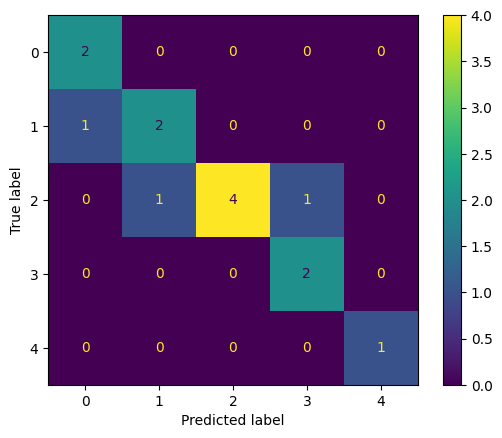

In [ ]:
# LDA  'shrinkage': 0.2, 'solver': 'lsqr'
modelLDA = LinearDiscriminantAnalysis(shrinkage=0.02, solver="lsqr")
modelLDA.fit(X_train_lo, Y_train_lo)
predictions = modelLDA.predict(X_lo_test)

print(accuracy_score(Y_lo_test, predictions))
print(confusion_matrix(Y_lo_test, predictions))
print(classification_report(Y_lo_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_lo_test, predictions),
    display_labels=modelLDA.classes_,
)
t = disp.plot()
plt.show()

0.8571428571428571
[[2 0 0 0 0]
 [0 3 0 0 0]
 [0 0 5 1 0]
 [0 0 0 1 1]
 [0 0 0 0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      0.83      0.91         6
           3       0.50      0.50      0.50         2
           4       0.50      1.00      0.67         1

    accuracy                           0.86        14
   macro avg       0.80      0.87      0.82        14
weighted avg       0.89      0.86      0.87        14



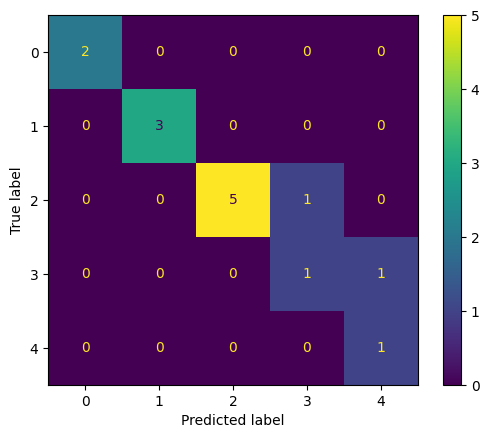

In [ ]:
# SVM 'C': 10, 'gamma': 0.1, 'kernel': 'rbf'
modelSVM = SVC(C=1000, gamma=0.001, kernel="rbf")
modelSVM.fit(X_train_lo, Y_train_lo)
predictions = modelSVM.predict(X_lo_test)

print(accuracy_score(Y_lo_test, predictions))
print(confusion_matrix(Y_lo_test, predictions))
print(classification_report(Y_lo_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_lo_test, predictions),
    display_labels=modelSVM.classes_,
)
t = disp.plot()
plt.show()

0.6428571428571429
[[2 0 0 0 0]
 [0 3 0 0 0]
 [0 1 2 3 0]
 [0 0 0 1 1]
 [0 0 0 0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.75      1.00      0.86         3
           2       1.00      0.33      0.50         6
           3       0.25      0.50      0.33         2
           4       0.50      1.00      0.67         1

    accuracy                           0.64        14
   macro avg       0.70      0.77      0.67        14
weighted avg       0.80      0.64      0.64        14



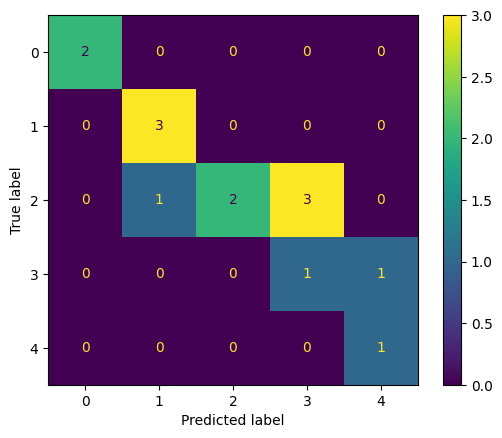

In [ ]:
# LG 'C': 1, 'penalty': 'l1', 'solver': 'saga'
modelLG = LogisticRegression(C=100, penalty="l2", solver="newton-cg")
modelLG.fit(X_train_lo, Y_train_lo)
predictions = modelLG.predict(X_lo_test)

print(accuracy_score(Y_lo_test, predictions))
print(confusion_matrix(Y_lo_test, predictions))
print(classification_report(Y_lo_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_lo_test, predictions),
    display_labels=modelLG.classes_,
)
t = disp.plot()
plt.show()

0.6428571428571429
[[2 0 0 0 0]
 [1 2 0 0 0]
 [0 2 3 1 0]
 [0 0 0 1 1]
 [0 0 0 0 1]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.50      0.67      0.57         3
           2       1.00      0.50      0.67         6
           3       0.50      0.50      0.50         2
           4       0.50      1.00      0.67         1

    accuracy                           0.64        14
   macro avg       0.63      0.73      0.64        14
weighted avg       0.74      0.64      0.64        14



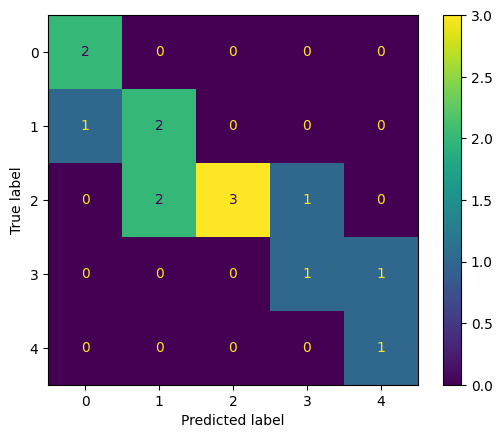

In [ ]:
# ET 'n_estimators': 235
modelET = ExtraTreesClassifier(n_estimators=210)
modelET.fit(X_train_lo, Y_train_lo)
predictions = modelET.predict(X_lo_test)

print(accuracy_score(Y_lo_test, predictions))
print(confusion_matrix(Y_lo_test, predictions))
print(classification_report(Y_lo_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_lo_test, predictions),
    display_labels=modelET.classes_,
)
t = disp.plot()
plt.show()

0.5
[[2 0 0 0 0]
 [1 1 1 0 0]
 [0 3 2 1 0]
 [0 0 0 1 1]
 [0 0 0 0 1]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.25      0.33      0.29         3
           2       0.67      0.33      0.44         6
           3       0.50      0.50      0.50         2
           4       0.50      1.00      0.67         1

    accuracy                           0.50        14
   macro avg       0.52      0.63      0.54        14
weighted avg       0.54      0.50      0.49        14



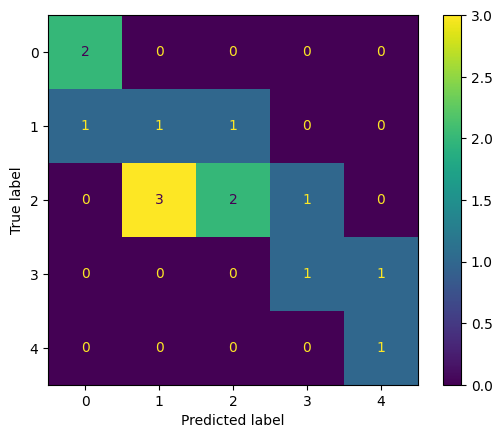

In [ ]:
# RF 'n_estimators': 37
modelRF = RandomForestClassifier(n_estimators=53)
modelRF.fit(X_train_lo, Y_train_lo)
predictions = modelRF.predict(X_lo_test)

print(accuracy_score(Y_lo_test, predictions))
print(confusion_matrix(Y_lo_test, predictions))
print(classification_report(Y_lo_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_lo_test, predictions),
    display_labels=modelRF.classes_,
)
t = disp.plot()
plt.show()

### Apply 20% test


0.8928571428571429
[[5 0 0 0 0]
 [1 6 0 0 0]
 [0 1 6 0 0]
 [0 0 0 4 0]
 [0 0 0 1 4]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.86      0.86      0.86         7
           2       1.00      0.86      0.92         7
           3       0.80      1.00      0.89         4
           4       1.00      0.80      0.89         5

    accuracy                           0.89        28
   macro avg       0.90      0.90      0.89        28
weighted avg       0.91      0.89      0.89        28



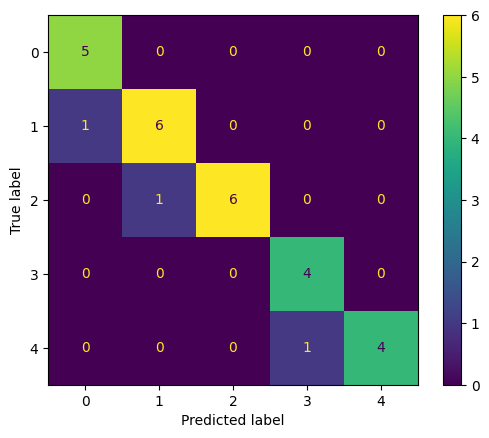

In [ ]:
# LDA  'shrinkage': 0.2, 'solver': 'lsqr'
modelLDA = LinearDiscriminantAnalysis(shrinkage=0.05, solver="lsqr")
modelLDA.fit(X_train_lo, Y_train_lo)
predictions = modelLDA.predict(X_lo_test)

print(accuracy_score(Y_lo_test, predictions))
print(confusion_matrix(Y_lo_test, predictions))
print(classification_report(Y_lo_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_lo_test, predictions),
    display_labels=modelLDA.classes_,
)
t = disp.plot()
plt.show()

0.8571428571428571
[[5 0 0 0 0]
 [2 5 0 0 0]
 [0 0 6 1 0]
 [0 0 0 4 0]
 [0 0 0 1 4]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.71      0.83         7
           2       1.00      0.86      0.92         7
           3       0.67      1.00      0.80         4
           4       1.00      0.80      0.89         5

    accuracy                           0.86        28
   macro avg       0.88      0.87      0.86        28
weighted avg       0.90      0.86      0.86        28



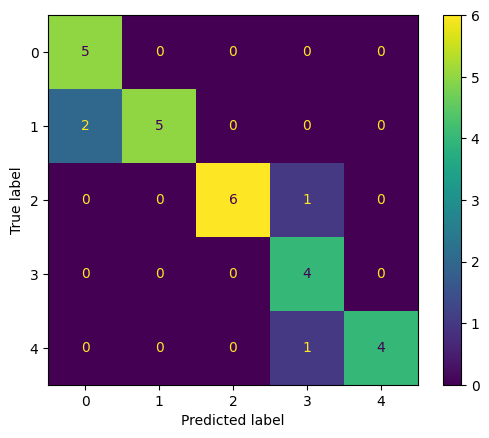

In [ ]:
# SVM 'C': 10, 'gamma': 0.1, 'kernel': 'rbf'
modelSVM = SVC(C=1000, gamma=0.0001, kernel="rbf")
modelSVM.fit(X_train_lo, Y_train_lo)
predictions = modelSVM.predict(X_lo_test)

print(accuracy_score(Y_lo_test, predictions))
print(confusion_matrix(Y_lo_test, predictions))
print(classification_report(Y_lo_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_lo_test, predictions),
    display_labels=modelSVM.classes_,
)
t = disp.plot()
plt.show()

0.7857142857142857
[[5 0 0 0 0]
 [2 5 0 0 0]
 [0 1 4 2 0]
 [0 0 0 4 0]
 [0 0 0 1 4]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.83      0.71      0.77         7
           2       1.00      0.57      0.73         7
           3       0.57      1.00      0.73         4
           4       1.00      0.80      0.89         5

    accuracy                           0.79        28
   macro avg       0.82      0.82      0.79        28
weighted avg       0.85      0.79      0.79        28



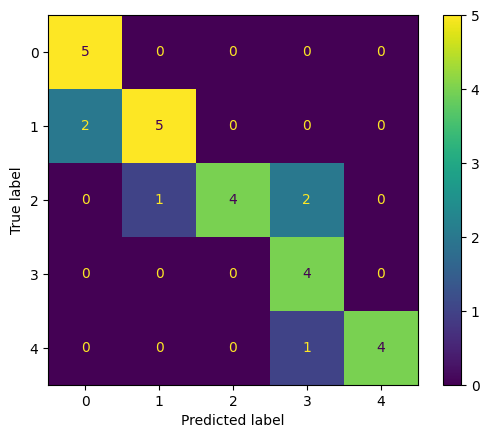

In [ ]:
# LG 'C': 1, 'penalty': 'l1', 'solver': 'saga'
modelLG = LogisticRegression(C=10, penalty="l2", solver="newton-cg")
modelLG.fit(X_train_lo, Y_train_lo)
predictions = modelLG.predict(X_lo_test)

print(accuracy_score(Y_lo_test, predictions))
print(confusion_matrix(Y_lo_test, predictions))
print(classification_report(Y_lo_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_lo_test, predictions),
    display_labels=modelLG.classes_,
)
t = disp.plot()
plt.show()

0.75
[[5 0 0 0 0]
 [2 5 0 0 0]
 [0 2 4 1 0]
 [0 0 0 3 1]
 [0 0 1 0 4]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.71      0.71      0.71         7
           2       0.80      0.57      0.67         7
           3       0.75      0.75      0.75         4
           4       0.80      0.80      0.80         5

    accuracy                           0.75        28
   macro avg       0.76      0.77      0.75        28
weighted avg       0.76      0.75      0.74        28



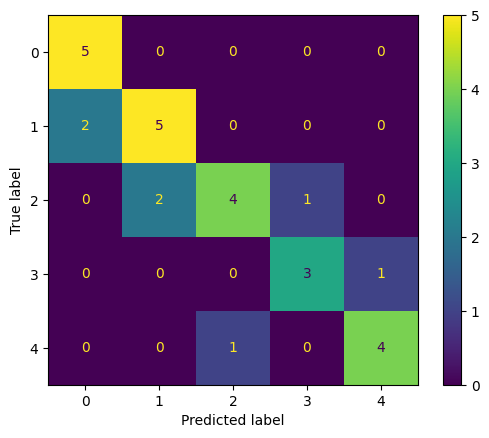

In [ ]:
# ET 'n_estimators': 235
modelET = ExtraTreesClassifier(n_estimators=255)
modelET.fit(X_train_lo, Y_train_lo)
predictions = modelET.predict(X_lo_test)

print(accuracy_score(Y_lo_test, predictions))
print(confusion_matrix(Y_lo_test, predictions))
print(classification_report(Y_lo_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_lo_test, predictions),
    display_labels=modelET.classes_,
)
t = disp.plot()
plt.show()

0.5714285714285714
[[5 0 0 0 0]
 [1 4 2 0 0]
 [0 3 3 1 0]
 [0 0 4 0 0]
 [0 0 1 0 4]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.57      0.57      0.57         7
           2       0.30      0.43      0.35         7
           3       0.00      0.00      0.00         4
           4       1.00      0.80      0.89         5

    accuracy                           0.57        28
   macro avg       0.54      0.56      0.54        28
weighted avg       0.55      0.57      0.55        28



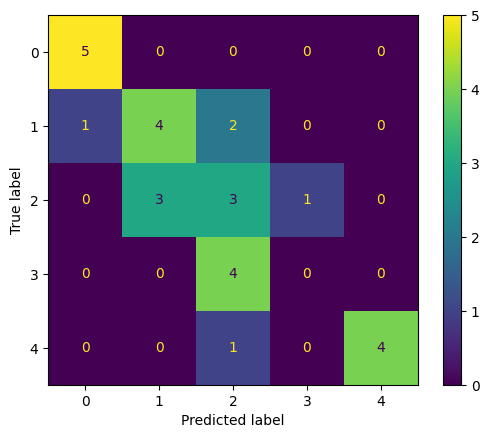

In [ ]:
# RF 'n_estimators': 37
modelRF = RandomForestClassifier(n_estimators=53)
modelRF.fit(X_train_lo, Y_train_lo)
predictions = modelRF.predict(X_lo_test)

print(accuracy_score(Y_lo_test, predictions))
print(confusion_matrix(Y_lo_test, predictions))
print(classification_report(Y_lo_test, predictions))

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(Y_lo_test, predictions),
    display_labels=modelRF.classes_,
)
t = disp.plot()
plt.show()